# Hotel Booking Demand

## Inhaltsverzeichnis

1. [Einleitung in die Thematik](#introduction)<br>
    1.1 [Kontext der Datenanalyse](#introduction1) <br>
    1.2 [Aufbau und Ablauf der Datenanalyse](#introduction2)<br>
    1.3 [Ziel Key Performance Indikatoren](#introduction3)<br>
    1.4 [Requirements](#introduction4)<br>
2. [Datenverständnis und explorative Datenanalyse](#Collection)<br>
    2.1 [Eräuterung des Datensets und Hintergrundinformationen](#Collection1)<br>
    2.2 [Erstsichtung des Datensets](#Collection2")<br>
    2.3 [Korrelationen sichten](#Collection3")<br>
    2.4 [Weitere Untersuchungen](#Collection4")<br>
    2.5 [Ausreißer untersuchen](#Collection5")<br>
    2.6 [Zusammenfassung der Ergebnisse aus der Datensichtung](#Collection6")<br>
3. [Datenbereinigung und Vorbereitung](#Cleaning)<br>
    3.1 [Umgang mit Duplikaten](#Cleaning1)<br>
    3.2 [Ersetzen der NULL-Werte](#Cleaning2)<br>
    3.3 [Umgang mit unplausiblen Daten](#Cleaning3)<br>
    3.4 [Umwandlung von Monat Text zu Zahl](#Cleaning4)<br>
    3.5 [Weitere neue Spalten](#Cleaning5)<br>
    3.6 [Konventierung von Datentypen](#Cleaning6)<br>
    3.7 [Umgang mit Ausreißern](#Cleaning7)<br>
    3.8 [Zwischencheck Feature Selektion](#Cleaning8)<br>
    3.9 [Encoding von (notwendigen) kategorialen Spalten](#Cleaning9)<br>
    3.10 [Transformation von Spalten](#Cleaning10)<br>
    3.11 [Löschung nicht benötigter Spalten](#Cleaning11)<br>
    3.12 [Speicherung der Datenbereinigung und Anmerkungen](#Cleaning12)<br>
4. [Modelling](#Modelling)<br>
    4.1 [Model Bulding](#Modelling1)<br>
    4.2 [Moptimierung der drei Modelle](#Modelling2)<br>
    4.1 [Vergleich der Modelle](#Modelling3)<br>
5. [Ergebnispräsentation](#Present)<br>
6. [Abschlussbericht und Optimierungsempfehlungen](#Recommendation)<br>
    6.1 [Abschlussbericht](#Recommendation1)<br>
    6.2 [Optimierungspotenziale](#Recommendation2)<br>

[Anhang/Experiment: ADR-Vorhersage mit Prophet](#Anhang)

## 1. Einleitung in die Thematik <a name="introduction"></a>

## 1.1 Kontext der Datenanalyse <a name="introduction1"></a>
Ziel dieser Arbeit ist es, ein Modell für die Hotellerie zu entwickeln, welches für gegebene Inputdaten vorhersagt, ob eine Buchung storniert wird.

Modelle des maschinellen Lernens können Hoteliers dabei helfen, Stornierungsmuster besser zu verstehen und die Stornierungsrichtlinien und Überbuchungstaktiken eines Hotels entsprechend den Merkmalen der Buchungen anzupassen. Zudem könnten Hotelmanager, wenn sie von der Stornierungswahrscheinlichkeit einer Buchung wüssten, darauf reagieren und damit etwaigen Umsatzverlusten entgegenwirken. Zudem könnte diese Information bei der Planung des Personaleinsatzes ebenso zum Einsatz kommen.

Für die Modellentwicklung wird ein Datensatz über zwei **[Hotels aus Protugal](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)** verwendet welches Buchungsinformationen für **ein Stadthotel in Lissabon** und **ein Resorthotel aus der Urlaubsregion Algave** enthält. Diese umfassen u.a. Informationen wie den Zeitpunkt der Buchung, die Aufenthaltsdauer, die Anzahl der Erwachsenen, Kinder und/oder Babys sowie die Anzahl der verfügbaren Parkplätze.

Da es sich um echte Hoteldaten handelt, wurden alle Datenelemente, die das Hotel oder die Kundenidentifikation betreffen, gelöscht. Einen Rückschluss auf einzelne Kunden (bspsw. Ermittlung der Wiederbuchungsrate) oder bevorzugte Zimmertypen ist damit nicht oder nur sehr eingeschränkt möglich.

Bei dem Datensatz handelt es sich um eine bereinigte und überarbeitete Version, die von Nuno Antonio, Ana Almeida und Luis Nunes für Data in Brief, Band 22, Februar 2019 unter dem Titel ["Hotel booking demand datasets"](https://www.sciencedirect.com/science/article/pii/S2352340918315191) veröffentlicht wurde.

---
## 1.2 Aufbau und Ablauf der Datenanalyse  <a name="introduction2"></a>
Entsprechend des CRISP-DM (Cross Industry Standard Process for Data Mining) werde ich zuerst die Daten sichten und diese auf fehlende Werte, Duplikate und Ausreißer hin untersuchen. 
In relevanten Analysen und Grafiken sollen die Verbindungen zwischen den Daten dargestellt werden.
Nach der notwendigen Datenbereinigung sollen die Daten für die gewählten Machine Learning Modelle transformiert und optimiert werden.
Im Anschluss werden die Ergebnisse zusammengefasst. Zudem möchte ich auf Limitationen hinweisen und einen Ausblick auf Optimierungsmöglichkeiten geben.

---
## 1.3 Gewählte Modelle und Ziel Key Performance Indikatoren <a name="introduction3"></a>
Für ein Hotel ist es wichtig, die Buchungen zu identifizieren, die vermutlich storniert werden.
Da beide Hotels nicht so viele wiederkehrende Besucher haben, treffe ich die Annahme, dass die Gefahr durch die Stornierung eines Zimmers seitens des Hotels aufgrund von Überbuchungen (= False positives) wirtschaftlich nicht so gravierend ist, wie frei bleibende Zimmer (= False negatives). Als Gefahr sind hier negative Bewertungen und/oder eine geringere Wiederbesuchsquote zu sehen.

Für die Vorhersage von Stornierungen, bei der das Ziel ist, die Anzahl der False Negatives möglichst gering zu halten, eignet sich eine Methode, die hohe Sensitivität (auch als Recall oder True Positive Rate bezeichnet) aufweist. Das bedeutet, dass die Methode dazu neigt, wahre Stornierungen richtig zu erkennen, selbst wenn es bedeutet, einige falsch positive Vorhersagen zu machen.

Folgende Methoden können bei dieser Aufgabe gut abschneiden und sollen miteinander verglichen werden:

- **Logistische Regression**: Dies ist eine einfache Methode, die sich gut für binäre Klassifikationsaufgaben eignet.
- **Random Forest Classifier**: Random Forest ist ein Ensemble-Algorithmus, der auf Decision Trees basiert. Er ist bekannt für seine gute Leistung bei der Vorhersage und kann die Sensitivität gut steuern, indem er die Anzahl der Bäume und andere Hyperparameter anpasst.
- **Gradient Boosting Classifier**: Dieser Algorithmus ist ebenfalls leistungsstark und kann gut auf die Maximierung der Sensitivität ausgerichtet werden.

Die **Accuray** gibt zwar an, wie viele Vorhersagen richtig waren, jedoch reicht diese Information nicht aus. Bei der Klassifizierung von Buchungen nach den Klassen "storniert" und "nicht-storniert" ist es für das Hotel wichtig, dass die False Negatives, also vorhergesagt "nicht-storniert" und tatsächlich "storniert", möglichst gering ist. Daher wird der Fokus auf die Methode **Recall** in Kombination mit dem **F1 Score** gelegt.

**[Recall](https://en.wikipedia.org/wiki/Precision_and_recall)** sagt, wie hoch der prozentuale Anteil der richtig positiven Ergebnisse an allen positiven Ergebnissen ist. Die Formel setzt sich wie folgt zusammen:
> $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

**[F1 Score](https://en.wikipedia.org/wiki/F-score)** ist das harmonische Mittel aus Precision und Recall. Precision ist definiert als die Anzahl der richtig positiven Ergebnisse geteilt durch die Anzahl aller positiven Ergebnisse. Als Formel lautet diese wie folgt:
> $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

> $$\text{F1 Score} = \frac{\text{2 * Precision * Recall}}{\text{Precisision + Recall}}$$

---
## 1.4 Requirements<a name="introduction4"></a>

Zur Datenanalyse verwenden eine Reihe von Python-Bibliotheken und Paketen verwendet, um die Analyse zu erleichtern. Im Folgenden werden die verwendeten Pakete, ihren Versionsnummern und eine kurze Beschreibung ihrer Verwendung aufgezählt:

| Package  | Versionsnummer | Zweck |
|:--|:-:|:--|
|[Pandas](https://pandas.pydata.org/docs/) | 1.5.3 | Pandas ist eine leistungsstarke Bibliothek zur Datenmanipulation und Datenanalyse. Sie wird verwendet, um Daten in DataFrames zu laden, zu filtern, zu transformieren und zu analysieren.|
|[NumPy](https://numpy.org/) | 1.23.5 | NumPy ist eine Bibliothek für numerische Berechnungen in Python. Sie wird für mathematische Operationen und die Arbeit mit mehrdimensionalen Arrays genutzt.|
|[Matplotlib](https://matplotlib.org/) | 3.6.2 | Matplotlib ist eine Plotting-Bibliothek zur Erstellung von Diagrammen und Visualisierungen.|
|[Seaborn](https://seaborn.pydata.org/) | 0.12.2 | Seaborn ist eine auf Matplotlib aufbauende Bibliothek, die eine einfachere und ästhetischere Visualisierung von statistischen Daten ermöglicht. Sie wird für ansprechendere statistische Plots verwendet.|
|[Sklearn](https://scikit-learn.org/stable/) | 1.2.2 | Scikit-Learn ist eine umfangreiche Bibliothek für maschinelles Lernen. Hier wird sie für Modellierung, Evaluation und Vorhersagen genutzt.|
|[Dython](http://shakedzy.xyz/dython) | 0.7.4 | Dython bietet eine Sammlung von Tools und Funktionen zur Visualisierung und Analyse von Machine Learning-Modellen und Daten, um deren Leistung und Verhalten besser zu verstehen. Hier wird es für die Darstellung des Zusammenhangs nominaler und numerische Variablen verwendet.|
|[Prophet](https://facebook.github.io/prophet/) | 1.1.4 | Prophet ist ein Forcasting-Framework was es ermöglicht, zukünftige Zeitreihen-Datenpunkte auf einfache Weise zu prognostizieren und Unsicherheiten zu quantifizieren.|
|[ydata_profiling](https://pypi.org/project/ydata-profiling/) | 4.5.1 | Diese Paket bietet eine benutzerfreundliche Methode zur automatischen Analyse und Generierung von Datenprofilen, um Einblicke in die Struktur und Qualität von Datensätzen zu gewinnen.|
|[itertools](https://docs.python.org/3/library/itertools.html) | | Itertools stellt eine Sammlung von effizienten Werkzeugen zur Verfügung, um Iterationen, Permutationen und Kombinationen von Datenstrukturen wie Listen und Iteratoren zu erstellen und zu verwalten.|
|[pycountry](https://pypi.org/project/pycountry/) | 22.3.5 | Pycountry bietet eine Schnittstelle zur Arbeit mit Ländercodes, -namen und -informationen. Es werden sich darüber die Ländernamen geholt.|

In [1]:
import importlib

def check_packages(packages):
    missing_packages = []

    for package in packages:
        try:
            imported_package = importlib.import_module(package)
            package_version = getattr(imported_package, '__version__', None)
            if package_version is not None:
                print(f"{package} ist installiert (Version {package_version}).")
            else:
                print(f"{package} ist installiert, aber die Version ist nicht verfügbar.")
        except ImportError:
            missing_packages.append(package)

    if missing_packages:
        for package in missing_packages:
            print(f"{package} ist nicht installiert. Bitte führen Sie den folgenden Befehl aus, um es zu installieren:")
            print(f"pip install {package}")
    else:
        print("Alle Pakete sind installiert.")

# Liste der zu überprüfenden Pakete
packages_to_check = ['pandas', 'seaborn', 'numpy', 'matplotlib', 'sklearn', 'ydata_profiling', 'pycountry', 'itertools', 'dython', 'prophet']

# Funktion aufrufen
check_packages(packages_to_check)

pandas ist installiert (Version 1.5.3).
seaborn ist installiert (Version 0.12.2).
numpy ist installiert (Version 1.23.5).
matplotlib ist installiert (Version 3.6.2).
sklearn ist installiert (Version 1.2.2).
ydata_profiling ist installiert (Version 0.0.dev0).
pycountry ist installiert (Version 22.3.5).
itertools ist installiert, aber die Version ist nicht verfügbar.
dython ist installiert (Version 0.7.4).
prophet ist installiert (Version 1.1.4).
Alle Pakete sind installiert.


In [2]:
# Importiere benötigte Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ydata_profiling as pp

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pycountry as pc
import itertools

from dython.nominal import correlation_ratio
from prophet import Prophet

# Lade eigene Funktionen
import src.hotel_utils as utils

%matplotlib inline

---
## 2. Datenverständnis und explorative Datenanalyse <a name="Collection"></a>

### 2.1. Erläuterung des Datensets und Hintergrundinformationen<a name="Collection1"></a>
Für die Datenanalyse und das Training der Modelle wird ein Datenset genutzt. Dieses liegt im `csv` Format vor und ist im Ordner `./src/` zu finden.

Bevor die Daten gesichtet werden, werfen wir einen Blick auf die Bedeutung der verschiedenen Spalten.

#### Variablen und ihre Bedeutung
Die Erläuterungen stammen von kaggle und wurde, sofern es nötig war, um Informationen von den ursprünglichen Autoren Anonio/Almeida/Nunes ergänzt.

<table>
<tr>
<th>Variablenname</th>
<th>Beschreibung</th>
</tr>
<tr><td><b>hotel</b></td><td> Hotel (H1 = Resort Hotel or H2 = City Hotel)</td></tr>
<tr><td><b>is_canceled</b></td><td> Wert, der angibt, ob die Buchung storniert wurde (1) oder nicht (0)</td></tr>
<tr><td><b>lead_time</b></td><td> Anzahl der Tage, die zwischen dem Datum der Eingabe der Buchung in das PMS und dem Ankunftsdatum verstrichen sind</td></tr>
<tr><td><b>arrival_date_year</b></td><td> Jahr des Anreisedatums</td></tr>
<tr><td><b>arrival_date_month</b></td><td> Monat des des Anreisedatums</td></tr>
<tr><td><b>arrival_date_week_number</b></td><td> Wochennummer des Jahres für das Anreisedatum</td></tr>
<tr><td><b>arrival_date_day_of_month</b></td><td> Tag Monat des Anreisedatums</td></tr>
<tr><td><b>stays_in_weekend_nights</b></td><td> Anzahl der Wochenendnächte (Samstag oder Sonntag), an denen der Gast im Hotel übernachtet oder einen Aufenthalt gebucht hat</td></tr>
<tr><td><b>stays_in_week_nights</b></td><td> Anzahl der Übernachtungen in der Woche (Montag bis Freitag), die der Gast im Hotel verbracht oder gebucht hat</td></tr>
<tr><td><b>adults</b></td><td> Anzahl Erwachsene</td></tr>
<tr><td><b>children</b></td><td> Anzahl Kinder</td></tr>
<tr><td><b>babies</b></td><td> Anzahl Babies</td></tr>
<tr><td><b>meal</b></td><td> Art der gebuchten Mahlzeit. Die Kategorien werden in den Standard-Mahlzeitenpaketen der Gastfreundschaft dargestellt. 
    Undefiniert/SC - kein Verpflegungspaket; 
    BB - Übernachtung mit Frühstück; 
    HB - Halbpension (Frühstück und eine weitere Mahlzeit - in der Regel Abendessen); 
    FB - Vollpension (Frühstück, Mittagessen und Abendessen)</td></tr>
<tr><td><b>country</b></td><td> Herkunftsland. Die Kategorien werden im Format ISO 3155-3:2013 dargestellt.</td></tr>
<tr><td><b>market_segment</b></td><td> Bezeichnung des Marktsegments. In den Kategorien steht der Begriff "TA" für "Reisebüros" und "TO" für "Reiseveranstalter". Das Marktsegment bezieht sich auf die Art des Gastes, der die Buchung vornimmt, wobei der Schwerpunkt eher auf dem Verhalten und den Eigenschaften des Gastes als auf dem Buchungsmedium liegt. Wenn jemand zum Beispiel geschäftlich reist, ordnen wir ihn dem "Corporate"-Segment zu. Dieser Gast könnte über die Website, über einen Dienstleister oder telefonisch im Hotel gebucht haben.</td></tr>
<tr><td><b>distribution_channel</b></td><td> Buchungs-Vertriebskanal. Der Begriff "TA" bedeutet "Reisebüros" und "TO" bedeutet "Reiseveranstalter". Der Kanal bezieht sich auf das Medium, über das die Buchung vorgenommen wurde, z. B. ob der Gast über die Website, einen OTA oder telefonisch im Hotel gebucht hat.</td></tr>
<tr><td><b>is_repeated_guest</b></td><td> Wert, der angibt, ob der Buchungsname von einem wiederholten Gast stammt (1) oder nicht (0)</td></tr>
<tr><td><b>previous_cancellations</b></td><td> Lt. der ursprünglichen Quelle (Anonio/Almeida/Nunes) beinhaltet das Feld den Wert 0, sofern kein Kundenprofil bekannt ist, ansonsten wird die Anzahl der früheren Buchungen, die der Kunde vor der aktuellen Buchung storniert hat, angegeben. </td></tr>
<tr><td><b>previous_bookings_not_canceled</b></td><td> Lt. der ursprünglichen Quelle (Anonio/Almeida/Nunes) beinhaltet das Feld den Wert 0, sofern kein Kundenprofil bekannt ist, ansonsten wird die Anzahl der früheren Buchungen, die der Kunde vor der aktuellen Buchung nicht storniert hat, angegeben. </td></tr>
<tr><td><b>reserved_room_type</b></td><td> Code des reservierten Zimmertyps. Aus Gründen der Anonymität wird der Code anstelle der Bezeichnung angegeben.</td></tr>
<tr><td><b>assigned_room_type</b></td><td> Code für den Zimmertyp, der der Buchung zugewiesen wurde. Manchmal weicht der zugewiesene Zimmertyp aus Gründen des Hotelbetriebs (z. B. Überbuchung) oder auf Kundenwunsch vom reservierten Zimmertyp ab. Aus Gründen der Anonymität wird der Code anstelle der Bezeichnung angegeben.</td></tr>
<tr><td><b>booking_changes</b></td><td> Anzahl der an der Buchung vorgenommenen Änderungen/Änderungen ab dem Zeitpunkt der Eingabe der Buchung in das PMS bis zum Zeitpunkt des Check-in oder der Stornierung</td></tr>
<tr><td><b>deposit_type</b></td><td> Angabe, ob der Kunde eine Anzahlung geleistet hat, um die Buchung zu garantieren. Diese Variable kann drei Kategorien annehmen.  No Deposit - es wurde keine Anzahlung geleistet; No Refund - es wurde eine Anzahlung in Höhe der Gesamtkosten des Aufenthalts geleistet; Refundable - es wurde eine Anzahlung geleistet, deren Wert unter den Gesamtkosten des Aufenthalts liegt.</td></tr>
<tr><td><b>agent</b></td><td> ID des Reisebüros, das die Buchung vorgenommen hat</td></tr>
<tr><td><b>company</b></td><td> ID des Unternehmens/der Einrichtung, das/die die Buchung vorgenommen hat oder für die Zahlung der Buchung verantwortlich ist. Die ID wird aus Gründen der Anonymität anstelle der Bezeichnung angegeben</td></tr>
<tr><td><b>days_in_waiting_list</b></td><td> Anzahl der Tage, die die Buchung auf der Warteliste stand, bevor sie dem Kunden bestätigt wurde</td></tr>
<tr><td><b>customer_type</b></td><td> Art der Buchung, wobei eine von vier Kategorien angenommen wird.  Contract - wenn die Buchung mit einer Zuteilung oder einer anderen Art von Vertrag verbunden ist; Group - wenn die Buchung mit einer Gruppe verbunden ist; Transient - wenn die Buchung nicht Teil einer Gruppe oder eines Vertrags ist und nicht mit einer anderen vorübergehenden Buchung verbunden ist; Transient-party- wenn die Buchung vorübergehend ist, aber mit mindestens einer anderen vorübergehenden Buchung verbunden ist.</td></tr>
<tr><td><b>adr</b></td><td> Durchschnittliche Tagesrate. Berechnet sich wie folgt: Gesamtumsatz der Buchungen / Anzahl der verkauften Zimmer.</td></tr>
<tr><td><b>required_car_parking_spaces</b></td><td> Anzahl der vom Kunden benötigten Parkplätze</td></tr>
<tr><td><b>total_of_special_requests</b></td><td> Anzahl der vom Kunden geäußerten Sonderwünsche (z. B. (twin bed) Doppelbett oder (high floor) Hochparterre)</td></tr>
<tr><td><b>reservation_status</b></td><td> Letzter Status der Reservierung, wobei eine von drei Kategorien angenommen wird.  Canceled- die Buchung wurde vom Kunden storniert; Check-Out - der Kunde hat eingecheckt, ist aber bereits abgereist; No-Show - der Kunde hat nicht eingecheckt und das Hotel über den Grund dafür informiert.</td></tr>
<tr><td><b>reservation_status_date</b></td><td> Datum, an dem der letzte Status gesetzt wurde. Diese Variable kann in Verbindung mit dem reservation_status verwendet werden, um zu verstehen, wann die Buchung storniert wurde oder wann der Kunde aus dem Hotel ausgecheckt hat</td></tr>
</table>

#### Wichtige Business Informationen

Lt. Anonio/Almeida/Nunes haben die Betreuer des Property Management System (PMS) versichert, dass in den Datenbanktabellen keine fehlenden Daten vorhanden sind. Bei einigen kategorialen Variablen wie z. B. Agent oder Unternehmen wird "NULL" als eine der Kategorien angegeben. Dies sollte nicht als ein
fehlender Wert, sondern eher als "nicht zutreffend" gewertet werden. Wenn zum Beispiel eine Buchung "Agent" als "NULL" definiert ist, bedeutet dies, dass die Buchung nicht von einem Reisebüro vorgenommen wurde. Sollte es NULL Werte geben, so ist bei dem Umgang mit diesen diese Information zu berücksichtigen.

Zudem geben die Autoren an, dass es in der Hotellerie durchaus üblich sei, dass Gäste Details zu ihren Buchungen wie die Anzahl der Personen, die Aufenthaltsdauer oder den gewünschten Zimmertyp, entweder zum Zeitpunkt des Check-ins oder während des Aufenthalts ändern. Außerdem sei es ebenso üblich, dass Hotels die korrekte Nationalität des Kunden bis zum Zeitpunkt des Check-in nicht kennen. Daher sei es verständlich, dass sich die Verteilung einiger Variablen zwischen nicht stornierten und stornierten Buchungen unterscheiden. Sollte eine Untersuchung dieser Variablen erfolgen, sollte dieser Punkt berücksichtigt werden.

Der ADR ist einer der wichtigsten Kennzahlen in der Hotellerie. Diese berechnet sich wie folgt:
$$ ADR = \frac{\text{Gesamtumsatz der Buchungen}}{\text{Anzahl verkaufte Zimmer}} $$


Dabei beinhaltet der ADR nur die Summe der Zimmerpreise und die Anzahl der belegten Zimmer. Zusatzleistungen oder Speisen und Getränke fließen nicht in die Berechnung mit ein.
Der ADR wird zur Beobachtung der Preisentwicklung herangezogen und auch zum Vergleich mit anderen Hotels.

---
### 2.2. Erstsichtung des Datensets <a name="Collection2"></a>
Als ersten Schritt wird das Datenset geladen und eine Übersicht über den Aufbau des Datensets geschaffen.

In [3]:
# Datei in das Jupyter Notebook laden
hotel_df = pd.read_csv('./src/hotel_bookings.csv')

# Erhalte Überblick über Zeilen und Spalten
print ('Der Datensatz hat {0} Einträge und {1} Spalten'.format(hotel_df.shape[0],hotel_df.shape[1]))

print('\n--- Informationen über die Spalten des Datensets ----')
print(hotel_df.columns)

# Gebe für einen ersten Überblick, die ersten 5 Zeilen aus
print('\n--- Blick auf die ersten 5 Zeilen des Datensatzes ----')
hotel_df.head(5)

Der Datensatz hat 119390 Einträge und 32 Spalten

--- Informationen über die Spalten des Datensets ----
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

--- Blick auf die ersten 5 Zeilen des Datensatzes ----


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

Nach der ersten Sichtung sehen wir, dass viele Spalten kategorial Variablen zu sein scheinen. Auf diese gehe ich später genauer ein.

Nun werden die Daten mittels der Funktionen `.info`, `.describe` und `.nunique` gesichtet.

In [4]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In dem Datenset haben 20 Variablen einen numerischen Datentyp (`float64` oder `int64`). Bei 12 Variablen sind die Werte als String (`object`) hinterlegt.
Es scheint als könnten einige Datentypen transformiert werden:
- `children` in int64
- `arrival_date_month` transformieren in die Zahlen 1-12 mit dem Typ int64 (analog zu Jahr + Tag)
- `reservation_status_date` zu date
- ggf. die Datumsspalten `arrival_Date_year`, `arrival_date_month` und `arrival_date_day` zusammenfassen zu einem Datumsfeld `arrival_date`

Es gibt zudem Variablen, die fehlende Werte aufweisen. Diese sollen nun näher betrachtet werden:

In [5]:
# Aufruf der Funktion mit dem gewünschten DataFrame
utils.analyze_null_values(hotel_df)

---- Variable und Anzahl NULL-Werte mit Anteil an Total ----
children : 4 ( 0.0 % )
country : 488 ( 0.41 % )
agent : 16340 ( 13.69 % )
company : 112593 ( 94.31 % )


Es gibt fehlende Werte in 4 Variablen, die mit Berücksichtigung der Business Informationen in einem späteren Schritt bereinigt bzw. ersetzt werden müssen.

Es wird geprüft, ob es im Datensatz Duplikate gibt:

In [6]:
hotel_df.duplicated().sum()

31994

Es gibt 31.994 doppelte Datensätze, die später entfernt werden müssen.

Es werden nun die Anzahl der verschiedenen Ausprägungen der einzelnen Variablen betrachtet:

In [7]:
print("---- Einzigartigkeit ---- \n", hotel_df.nunique())

---- Einzigartigkeit ---- 
 hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            3

Beobachtungen bei der Ausgabe der `unique Values` im Datenset:
- Es gibt keinen Unique Identifier (wie eine Buchungsnummer o.ä.), dies entspricht den Informationen, dass die Daten anonymisiert wurden
- Die Anzahl der unique Values bei `hotel`, `is_canceled`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_moth`, `is_repeated_guest` entsprechen den Erwartungen bzgl. der Anzahl Ausprägungen.
- Bei den (vermutlich) numerischen Variablen `adults`, `children`, `babies`, `booking_changes`, `required_car_parking_spaces` und `total_of_special_request` gibt es nicht viele verschiedene Ausprägungen.
- 926 unique Einträge bei `reservation_status_date` lässt den Rückschluss zu, dass das Datenset Buchungen von mindestens 2,5 Jahren beinhaltet.

In [8]:
hotel_df.describe().T

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

Folgende Punkte fallen bei der Funktion `describe` auf:

- Es liegen Buchungsdaten von 2015 bis 2017 vor.
- Es gibt Buchungen, bei denen `adults` = 0 sind. Hier sollte später geprüft werden, ob es Datensätze gibt, bei denen Babies ohne Erwachsene reisen bzw. gar keine Menschen in dem Zimmer gebucht wurden. Sollte es solche Fälle geben, wäre hier zu werten, ob es sich um Fehler handeln könnte oder ob es ggf. Kombinationen gibt, bei denen eine Raumbuchung ohne Erwachsene bzw. ohne Menschen realistisch sein können. Die Range bei `adults` ist mit 0 bis 55 recht groß. Hier müsste geprüft werden, ob es sich bei den hohen Werten um Gruppenbuchungen handelt.
- Es gibt einen Datensatz mit `adr` < 0. Diese sollten später entfernt werden, da es sich hier um Ausreißer/Fehler handeln muss. Der Average daily rate (durchschnittlicher Tagessatz) wird berechnet, indem die Gesamteinnahmen des Hotels durch die Anzahl der belegten Zimmer geteilt werden. Theoretisch kann diese Zahl also nicht negativ sein, da die Mindesteinnahmen 0 sind und die Ausgaben und Kosten nicht in diese Berechnung einfließen.
- `agent` und `company` wurden lt. Business Informationen anonymisiert und sind daher als kategoriale Variable zu werten. Bis auf die Anzahl der Ausprägungen sind die anderen Kennzahlen daher zu ignorieren.
Ein hoher Unterschied zwischen **75%** und **max** deutet auf Ausreißer hin. Dies betrifft insbesondere folgende Variablen: `lead_time`, `days_in_waiting_list`, `adr`.

Um einen ersten visuellen Eindruck und weitere Informationen die Variablen zu erhalten, lässt sich die Pandas-Funktion `ProfileReport` nutzen.

In [9]:
pp.ProfileReport(hotel_df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aus dem Ergebnis der Funktion kann man die Verteilung der einzelnen Variablen durchaus ablesen und erste Erkenntnisse gewinnen:
- 66% der erfassten Buchungen stammen aus dem City Hotel
- 37% der Buchungen wurden storniert
- `lead_time` ist rechtsschief
- Es gibt in 2015 weniger Buchungen als in den folge Jahren, hier sollte ein Datumsfeld für das `arrival_date` angelegt werden um den korrekten Zeitraum der Daten zu ermitteln
- Die Sommermonate weisen die meisten Monate auf, wobei in den Wintermonaten nicht so viele Buchungen stattfanden, dies sieht man ebenso bei der `arrival_date_week_number`. Hier sollten auf Basis eines Datumsfeldes untersucht werden, ob es Saisonalitäten gibt.
- `stays_in_week_nights` und `stays_in_weekend_nights` könnten zusammengefasst werden um die Anzahl der Übernachtungen zu ermitteln
- Meist sind pro Datensatz durchschnittlich 2 Erwachsene (1,86) und 0 Kinder (0,1) gebucht
- 77% haben lediglich Frühstück (=BB) gebucht. Hier ist zu beachten, dass es pro Hotel ggf. unterschiedliche Arrangements gibt.
- 47% der Buchungen werden dem Marktsegment "Online TA" zugeordnet
- 82 % der Buchungen finden über Reisebüros und/oder Reiseveranstalter statt
- 97 % der Buchungen ist von Gästen die vorher dem Hotel nicht bekannt waren
- Für 5% der Buchungen ist das Kundenprofil bekannt und diese haben bis zu 26 vorhergehende Stornierungen gehabt
- 3 % der Buchungen kamen von bereits bekannten Kundenprofilen mit bis zu 72 vorherigen Buchungen
- Der am meisten gebuchte und zugewiesene Raumtyp ist "A". Wobei auch hier Hotels unterschiedliche Zimmer im Angebot haben könnten. Zudem gibt es auch weniger Raumtypen die reserviert werden konnten (10) also die, die zugewiesen wurden (12).
- In 15 % der Fälle gab es Änderungen an der Buchung. Diese können bis zu 21 Änderungen umfassen.
- 88 % der Buchungen waren ohne Anzahlung
- `agent` sowie `company` wurden anonymisiert. Daher müssen diese als kategorische Variablen behandelt werden. Für nur 6 % der Buchung ist eine Firma bekannt.
- 97 % der Buchungen werden am selben Tag bestätigt
- 75 % der Buchungen sind eigenständig und weder zugehörig zu einer anderen Buchung noch zu oder einer Gruppe
- 1,6 % der Buchungen haben eine Tagesrate (ADR) von 0 €, das arithmetische Mittel für beide Hotel beträgt jedoch 101,83 €. Hier könnte untersucht werden ob die Einträge realistisch sind.
- 6 % der Buchungen benötigten auch mindestens einen Parkplatz
- 41 % der Buchungen hatten min. 1 Sonderwunsch
- 63 % der Buchungen fanden statt

Folgende Variablen sortiere ich fachlich als kategorische Variable ein (auch wenn diese aus verschiedenen Gründen den Datentyp `int` statt `object` haben):

`hotel`, `is_canceled`, `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`, `meal`, `is_repeated_guest`, `country`,
                    `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `agent`, `company`, `customer_type`, `reservation_status`,
                    `reservation_status_date`

Um einen besseren Einblick in die Daten zu bekommen, werden einzelne Aspekte noch mal extra betrachtet:

#### Wie hoch ist die Stornierungsrate?

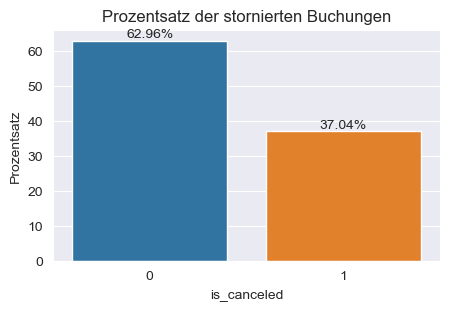

In [10]:
# Verwende die Funktion get_count und plot, um die Anzahl der stornierten Buchungen zu erhalten und anzuzeigen
x, y = utils.get_count(hotel_df['is_canceled'])
# Verwende die Funktion plot, um ein Balkendiagramm zu erstellen
utils.plot_values(
    x=x
    , y=y
    , x_label='is_canceled'
    , y_label='Prozentsatz'
    , title='Prozentsatz der stornierten Buchungen'
    , plot_type='bar'
    , figsize=(5,3)
)

37% der (unbereinigten) Buchungen werden storniert.

#### Welche sind die am stärksten nachgefragten Monate?

Text(0, 0.5, 'Anzahl der Buchungen')

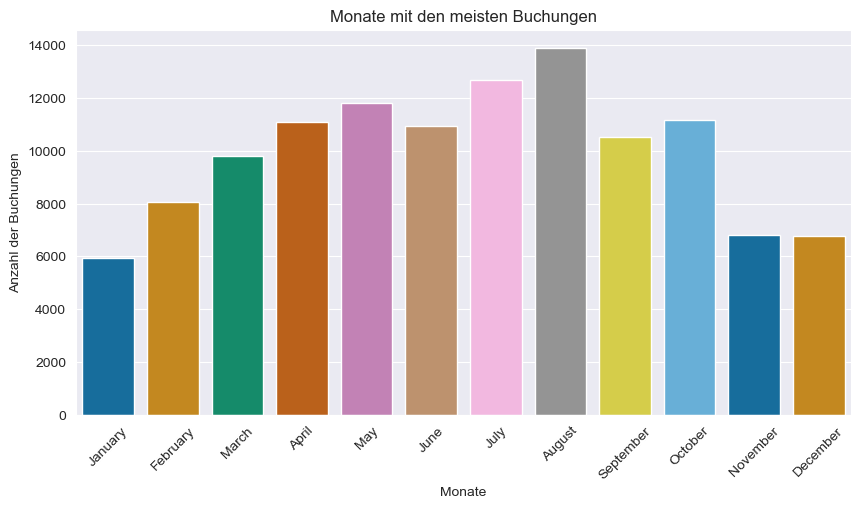

In [11]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'], categories=ordered_months, ordered=True)
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
#sns.countplot(x='arrival_date_month', data = ordered_months,palette= 'viridis')
sns.countplot(x=hotel_df['arrival_date_month'], palette='colorblind')
plt.title('Monate mit den meisten Buchungen')
plt.xlabel('Monate')
plt.xticks(rotation=45)
plt.ylabel('Anzahl der Buchungen')

Im Januar wird am wenigsten eine Buchung vorgenommen, wobei die meisten Buchungen im August stattfinden.

#### Anteil der Buchungen anhand der Herkuntsländer der Gäste

Um den Ländercodes die Namen zuzuordnen, kann man das Package [pycountry](https://pypi.org/project/pycountry/) nutzen.


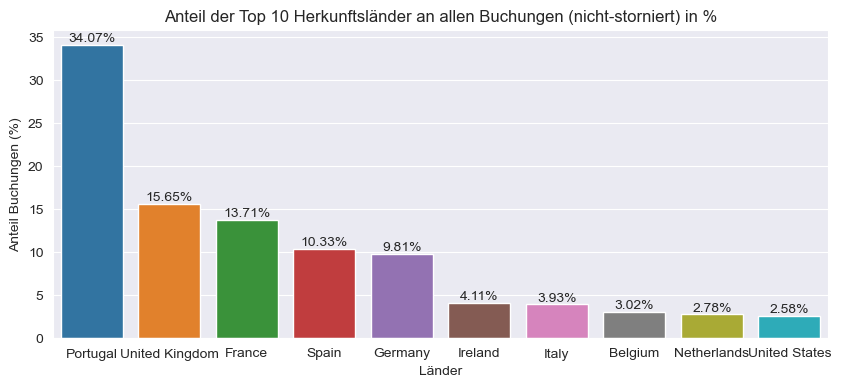

In [12]:
#Filtere den Datensatz auf nicht-stornierte Buchungen
df_not_canceled = hotel_df[hotel_df['is_canceled'] == 0]

x,y = utils.get_count(df_not_canceled['country'], limit=10)

# Mappe für jeden Ländercode den entsprechenden Namen
country_name = [pc.countries.get(alpha_3=name).name for name in x]

utils.plot_values(country_name,y, x_label='Länder', y_label='Anteil Buchungen (%)', title='Anteil der Top 10 Herkunftsländer an allen Buchungen (nicht-storniert) in %'
    , figsize=(10,4))

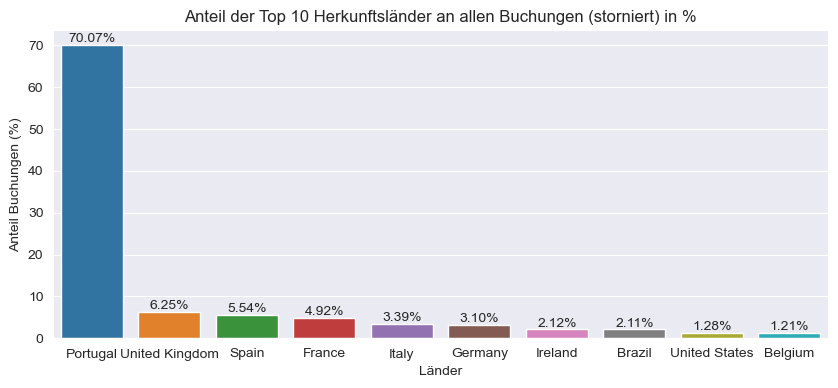

In [13]:
#Filtere den Datensatz auf stornierte Buchungen
df_canceled = hotel_df[hotel_df['is_canceled'] == 1]

x,y = utils.get_count(df_canceled['country'], limit=10)

# Mappe für jeden Ländercode den entsprechenden Namen
country_name = [pc.countries.get(alpha_3=name).name for name in x]

utils.plot_values(country_name, y, x_label='Länder', y_label='Anteil Buchungen (%)', title='Anteil der Top 10 Herkunftsländer an allen Buchungen (storniert) in %'
    , figsize=(10,4))

#### Gibt es vermehrt Stornierungen bei den Datensätzen ohne Land?

Wie die Autoren des Datensatzes schildern, gibt es (angeblich) keine echten fehlenden Werte. Wenn Informationen fehlen, dann liegt es daran, dass diese dem Hotel (noch) nicht vorliegen. Da das Land oft erst beim Check-In bekannt wird, soll ein kurzer Blick auf die Datensätze geworfen werden, die keinen Eintrag in der Spalte `country` haben.

Anzahl der Datensätze ohne Länderangabe:  488


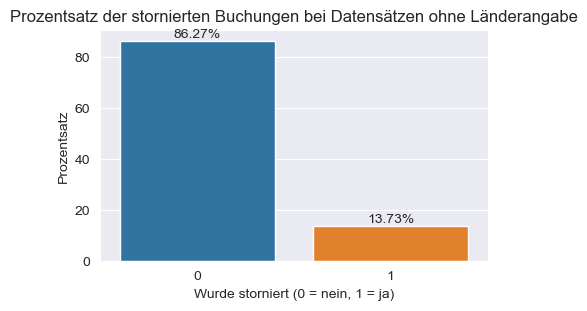

In [14]:
df_country_null = hotel_df[hotel_df['country'].isna()]

print('Anzahl der Datensätze ohne Länderangabe: ', len(df_country_null))

x, y = utils.get_count(df_country_null['is_canceled'])

# Verwende die Funktion plot, um ein Balkendiagramm zu erstellen
utils.plot_values(x=x, y=y, x_label='Wurde storniert (0 = nein, 1 = ja)', y_label='Prozentsatz', title='Prozentsatz der stornierten Buchungen bei Datensätzen ohne Länderangabe'
    , plot_type='bar', figsize=(5,3))

Nur 14% der Buchungen ohne Länderangaben wurden storniert.

#### Gibt es Unterschiede im Angebot der Hotels?
Die beiden Hotels werden sich nicht nur aufgrund ihrer Lage unterscheiden, sondern auch aufgrund ihres Angebots. Es sollt daher kurz betrachtet werden, ob die Hotels sich bzgl. der Mahlzeiten-Arrangements und Zimmertypen unterscheiden:

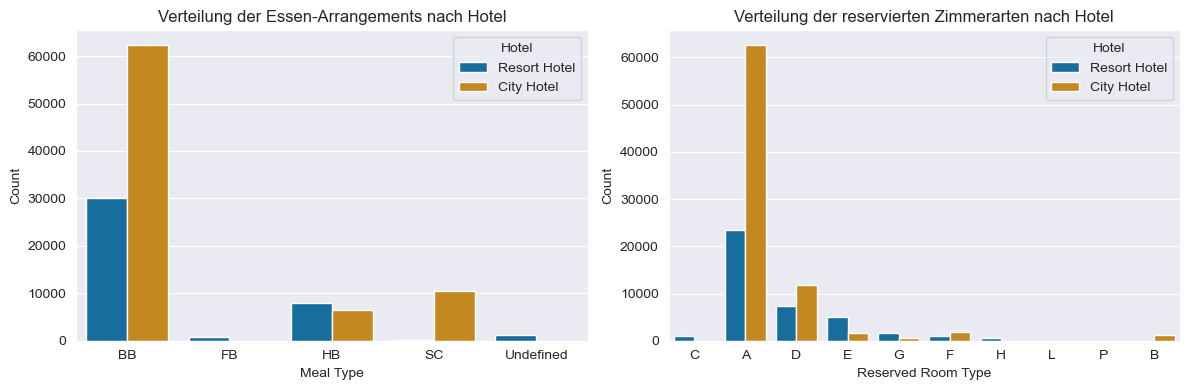

In [15]:
plt.figure(figsize=(12, 4))

# Plot 1: Verteilung von "meal" mit "hotel" als Hue
plt.subplot(1, 2, 1)
sns.countplot(data=hotel_df, x='meal', hue='hotel', palette='colorblind')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title('Verteilung der Essen-Arrangements nach Hotel')
plt.legend(title='Hotel', loc='upper right')

# Plot 2: Verteilung von "reserved_room_type" mit "hotel" als Hue
plt.subplot(1, 2, 2)
sns.countplot(data=hotel_df, x='reserved_room_type', hue='hotel', palette='colorblind')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.title('Verteilung der reservierten Zimmerarten nach Hotel')
plt.legend(title='Hotel', loc='upper right')

# Plots anzeigen
plt.tight_layout()

Es wird deutlich, dass nicht jedes Hotel das gleiche Angebot hat.

#### Gibt es gebuchte Zimmer ohne Gäste?

In [16]:
# Plausibilität-Check: Es sollte immer min. 1 Mensch pro Zimmer gebucht sein
filter_children = (hotel_df['adults'] == 0) & (hotel_df['children'] > 0) & (hotel_df['babies'] == 0)
filter_babies = (hotel_df['adults'] == 0) & (hotel_df['children'] == 0) & (hotel_df['babies'] > 0)
filter_non_adults = (hotel_df['adults'] == 0) & (hotel_df['children'] > 0) & (hotel_df['babies'] > 0)
filter_all = (hotel_df['adults'] == 0) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0)

# Anzahl der Einträge für jede Variante ausgeben
print(f"Anzahl der Einträge mit adults==0, children>0, babies==0: {filter_children.sum()}")
print(f"Anzahl der Einträge mit adults==0, children==0, babies>0: {filter_babies.sum()}")
print(f"Anzahl der Einträge mit adults==0, children>0, babies>0: {filter_non_adults.sum()}")
print(f"Anzahl der Einträge mit adults==0, children==0, babies==0: {filter_all.sum()}")

Anzahl der Einträge mit adults==0, children>0, babies==0: 220
Anzahl der Einträge mit adults==0, children==0, babies>0: 0
Anzahl der Einträge mit adults==0, children>0, babies>0: 3
Anzahl der Einträge mit adults==0, children==0, babies==0: 180


Es gibt 180 Einträge, bei denen keine Menschen in der Buchung berücksichtigt werden.

In [17]:
#Prüfen ob es bestimmte Auffälligkeiten für diese Datensätze gibt
filtered_df = hotel_df[filter_all]

pp.ProfileReport(filtered_df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aus dem erzeugten Profile Report gehen folgende Informationen hervor:
- 93 % der Fälle betraf das City Hotel.
- 86 % der Buchungen fanden auch tatsächlich statt
- 56%  Buchungen hatten keine Verpflegung
- 59% der Buchenden kommt aus Portugal.
- 66,7% der Buchungen erfolgten über den Buchungs-Vertriebskanal TA/TO (also Reisebüro/Reiseveranstalter)
- 100% haben keine Anzahlung ("No Deposit") getätigt
- In 83% der Fälle lag der ADR bei 0 €.
- 76% der Buchungen gehören zum `costumer_type` Transient. D.h. Buchung ist nicht Teil einer Gruppe oder eines Vertrags und nicht mit einer anderen vorübergehenden Buchung verbunden.
- 86% der Datensätze hatten den `reservation_status` "Checked-Out", d.h. der Besuch in dem Hotel fand auch statt.
- Auffällig ist, dass die meisten ursprünglichen Buchungen `reserved_room_type` = A hatten jedoch K zugewiesen wurde (`assigned_room_type`). Diesen Aspekt wird noch mal mit dem ungefilterten Datensatz verglichen:

In [18]:
# Berechne die Verteilung der 'assigned_room_type' im ungefilterten Datensatz
room_type_distribution = hotel_df['assigned_room_type'].value_counts(normalize=True)

# Berechne die Verteilung der 'assigned_room_type' im gefilterten Datensatz
filtered_room_type_distribution = filtered_df['assigned_room_type'].value_counts(normalize=True)

# Anteil von "K" in beiden Verteilungen
percentage_in_hotel_df = room_type_distribution.get('K', 0)
percentage_in_filtered_df = filtered_room_type_distribution.get('K', 0)

# Vergleiche die Anteile
print(f"Anteil von Raumtyp 'K' bei allen Buchungen: {percentage_in_hotel_df:.2%}")
print(f"Anteil von Raumtyp 'K' bei Buchungen, ohne Menschen: {percentage_in_filtered_df:.2%}")


Anteil von Raumtyp 'K' bei allen Buchungen: 0.23%
Anteil von Raumtyp 'K' bei Buchungen, ohne Menschen: 51.11%


Bei der Betrachtung der verschiedenen Daten gehe ich davon aus, dass es sich vermutlich um korrekte Buchungen handelt, nur eben um z.B. eines Konferenzraums oder ähnlichen. Eine Bereinigung wird nur vorgenommen, wenn sich beim Testen ergibt, dass dies zu einer Verbesserung des Modells beiträgt.

---
### 2.3 Korrelationen sichten <a name="Collection3"></a>
Um einen ersten Eindruck über Zusammenhänge der Variablen der Rohdaten zu erhalten, werfen wir einen Blick auf die Korrelation. 
Um einen schnellen Einblick in mögliche Zusammenhänge zu bekommen, wird der [**Pearson-Korrelation Koeffizient**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ermittelt. Da auch kategorische Variablen berücksichtigt werden, wird auf diese die Pandas Funktion `pd.factorize` angewendet. Diese wandelt die Werte der kategorialen Variablen (alle als object definierten Spalten) in numerische Werte um.

Diese Pearson-Korrelation wird nach folgender Formel berechnet:

> $$ r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} $$

wobei,....
- n die Anzahl der Beobachtungen,
- \\(y_{ij}\\)
- \\(x_{i}\\) und \\(y_{i}\\) die jeweiligen Beobachtungswerte sind,
- \\(\overline{x}\\) und \\(\overline{y}\\) sind die jeweiligen arithmetischen Mittel sind.

Es gibt mehrere Schreibweisen der Formel. Diese ist nur eine der möglichen Varianten.


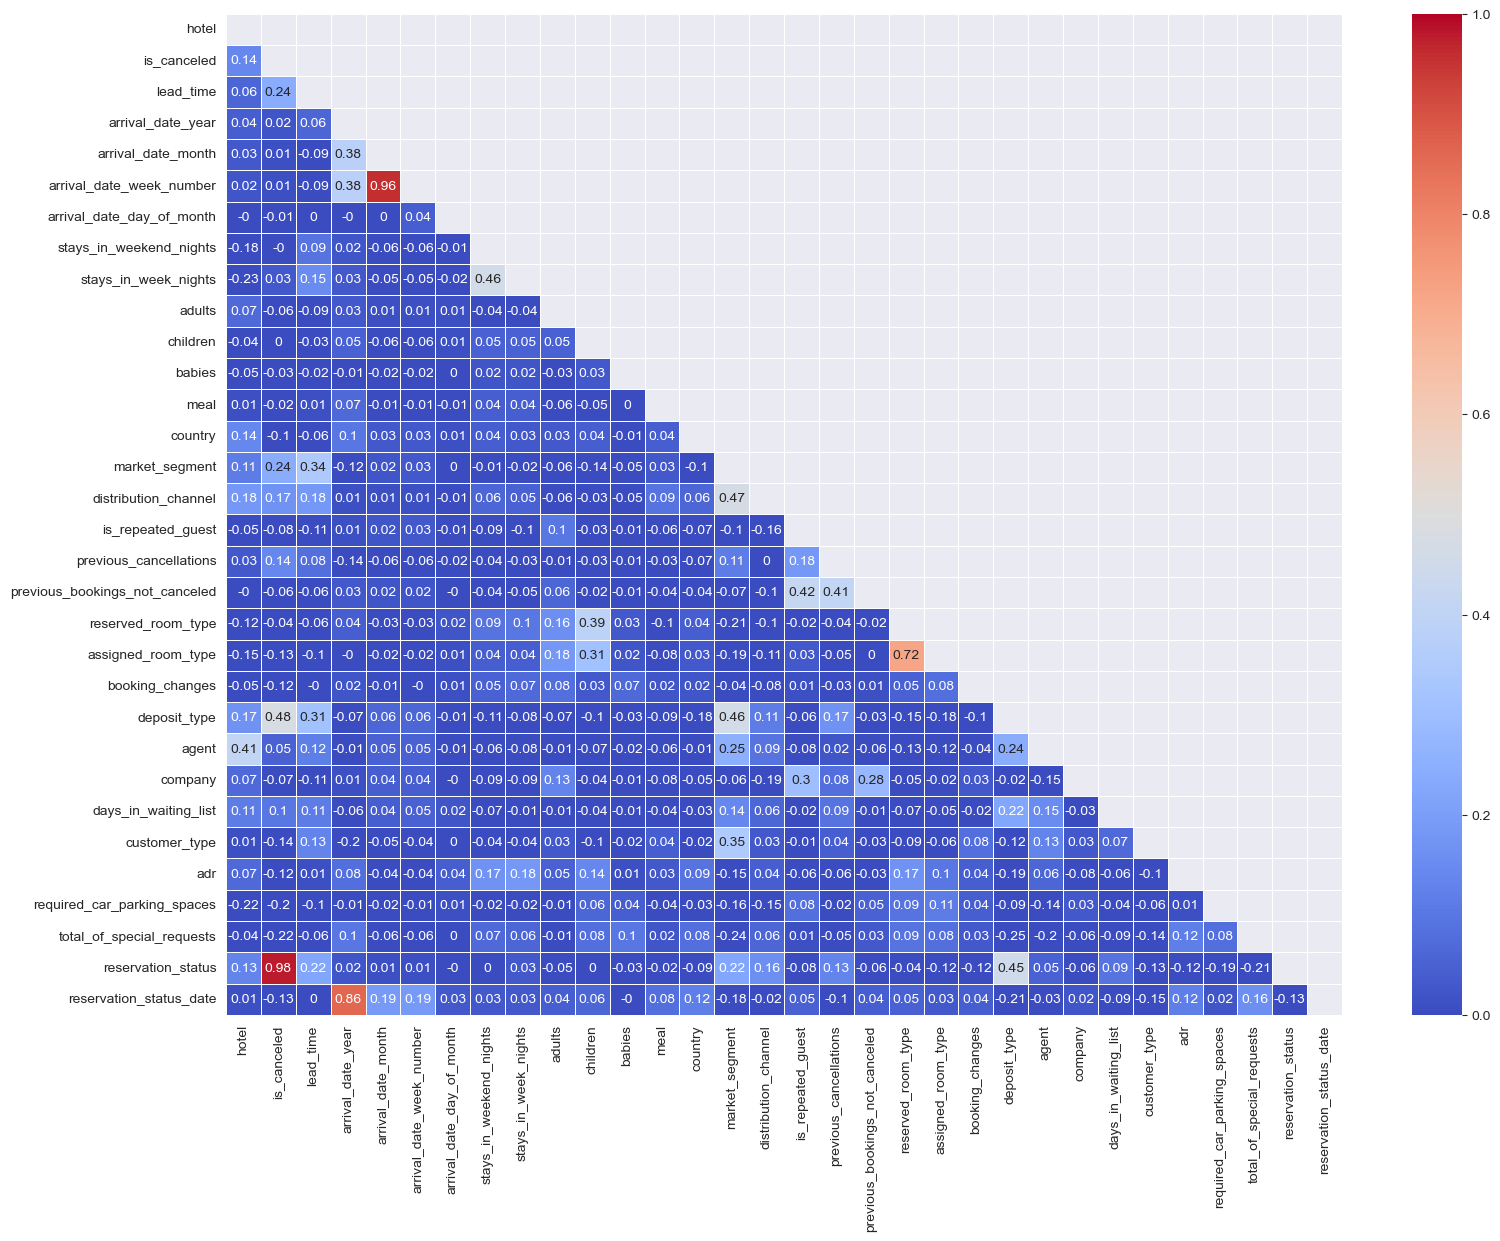

In [19]:
corr = hotel_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson').round(decimals=2)

# Erstelle eine Matrix mit False Werten
mask = np.zeros_like(corr, dtype=bool)

# Gibt die Indizes wieder für das "upper-triangle" des Arrays und setzt diese Werte auf "True"
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 13))
ax = sns.heatmap(data = corr,
                annot = True,
                vmin=0, vmax=1,
                linewidths = .5,
                cmap = 'coolwarm',
                # Masked alle Werte des oberen "upper Triangles" in der Darstellung
                mask = mask)

Es ist bis auf einige Ausnahmen keine sonderliche Korrelation zwischen den einzelnen Variablen zu erkennen.
- Der Zusammenhang zwischen `stays_in_week_nights` und `stays_in_weekend_nights` ist nicht verwunderlich. Zudem scheint es keinen großen Zusammenhang zwischen `adr` und `stays_in_weekend_nights` sowie `adr` und `stays_in_week_nights` zu geben. Diese Variablen sollten ggf. in einer neuen Spalte `stays_in_nights` zusammengefasst werden.
- Die Korrelation`is _repeated_guest` und `previous_bookings_not_canceled` ist auch nicht weiter verwunderlich, schließlich bedingen sich diese beiden Parameter. In einem Modell könnte daher nur eine Variable berücksichtigt werden. Da die Kunden nicht bekannt sind, kann es sein, dass dieselbe Person mehrfach bucht und damit die Zahlen der Variablen `previous_bookings_not_canceled` beeinflusst. Um zu beurteilen, ob es Unterschiede zwischen den Gästetypen geben könnte, reicht vermutlich die Information `is_repeated_guest`.
- Die Datumswerte korrelieren miteinander. Für eine nähere Betrachtung wären es hilfreich ein neues Feld mit dem `arrival_date` einzuführen (`arrival_date_year`, `arrival_date_month` und `arrival_date_date` zu einem Datumsfeld) und die Variablen `arrival_date_year` und `arrival_date_week_number` zu einer neuen Variablen `arrival_week_of_year` zu kombinieren.
- Die starke Korrelation zwischen `reserved_room_type` und `assigned_room_type` ist ebenfalls nicht verwunderlich, da die Zimmerzuweisung in der Regel auf der Reservierung basiert.
- Da die Information `is_canceled` aus dem `reservation_status` abgeleitet werden kann, ist eine Korrelation von 1 nicht verwunderlich. Diese Variable kann ausgeschlossen werden.
- Die Anzahl der Gäste scheint einen leichten Zusammenhang mit dem ADR zu haben. Hier würde es sich ggf. anbieten die Anzahl der Personen pro Buchung in einer neuen Variablen `no_guests` zusammenzufassen.

Um deutlicher zu sehen, welche Variablen für das spätere Modell infrage kommen, werden die Variablen zur Zielvariablen `is_canceled` anhand der Korrelationskoeffizienten absteigend sortiert aufgeführt:

In [20]:
is_canceled_corr = corr['is_canceled']

sorted_corr = is_canceled_corr.sort_values(ascending=False)

# Zeigen Sie die sortierten Korrelationswerte an
print('Korrelationswerte absteigend sortiert für is_canceled:\n')
print(sorted_corr)

Korrelationswerte absteigend sortiert für is_canceled:

is_canceled                       1.00
reservation_status                0.98
deposit_type                      0.48
lead_time                         0.24
market_segment                    0.24
distribution_channel              0.17
previous_cancellations            0.14
hotel                             0.14
days_in_waiting_list              0.10
agent                             0.05
stays_in_week_nights              0.03
arrival_date_year                 0.02
arrival_date_week_number          0.01
arrival_date_month                0.01
children                          0.00
stays_in_weekend_nights          -0.00
arrival_date_day_of_month        -0.01
meal                             -0.02
babies                           -0.03
reserved_room_type               -0.04
adults                           -0.06
previous_bookings_not_canceled   -0.06
company                          -0.07
is_repeated_guest                -0.08
country 

**Anmerkungen zu möglichen Zusammenhängen mit is_canceled**
- Der mögliche Zusammenhang mit der Variablen `lead_time` legt die Vermutung nahe, dass je spontaner gebucht wird, desto geringer die Stornierungswahrscheinlichkeit sein könnte.
- Die Assoziation von `is_canceled` und `total_of_special_requests` ist vermutlich vorhanden, da bei einer Vielzahl von Sonderwünschen es sich vermutlich eher um einen verbindlichen Buchungswunsch handelt.
- Die Korrelation zwischen `is_canceled` und `deposit_type` legt die fachliche Vermutung nahe, dass eine Buchung eher nicht storniert wird, wenn diese nicht rückerstattungsfähig ist.

#### Auswahl der Variablen für das Modell

Für das Modell werden nicht alle Variablen genutzt. Es werden die Variablen mit >0,15 oder <-0,15 in Betracht gezogen. 
Zudem soll die Variable `hotel` berücksichtigt werden, da aus fachlicher Sicht davon auszugehen ist, dass diese Variable eine Rolle spielen kann. Daher kommen folgende Variablen in Betracht:

`deposit_type`, `lead_time`, `market_segment`, `required_car_parking_spaces` und `total_of_special_requests`. 

Die Variable `distribution_channel` korreliert mit `market_segment` (so buchen Agenturen nun mal über Buchungstools), weshalb diese Variable nicht berücksichtigt wird.

#### Differenziertere Betrachtung

Um zu überprüfen, ob ich die von mir identifizierten Variablen auch bei einer differenzierteren Betrachtung gewählt hätte, werden numerische und kategorische Variablen getrennt betrachtet.
Eine Vielzahl der Variablen sind trotz numerischen Datentyps als kategorisch einzustufen wie `agent` oder `company` die lediglich zur Anonymisierung numerische Werte bekommen haben. Zudem kann bei den kategorischen Variablen lediglich bei `meal` noch von einer ordinalen Skalierung ausgegangen werden.

Ohne vorher den Datentyp von numerisch erkannten Variablen zu ändern, ist die automatische Definition von numerischen und kategorischen Parametern nicht möglich. Daher werden diese anhand der fachlichen Einordnung definiert, wobei die Variablen mit Ausprägungen 0 und 1 ebenso als kategorische Variable eingestuft wurden, da der Inhalt den Werten Falsch oder Wahr entspricht:

In [21]:
# Definition von numerischen und kategorischen Spalten
numeric_columns = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled',
                   'booking_changes','days_in_waiting_list','adr','total_of_special_requests']
category_columns = ['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal','is_repeated_guest','country',
                    'market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status',
                    'reservation_status_date']

Für die numerischen Variablen wird analog zu oben der **Pearson-Korrelation-Koeffizient** bestimmt:

Text(0.5, 1.0, 'Korrelationsmatrix der numerischen Parameter (Pearson)')

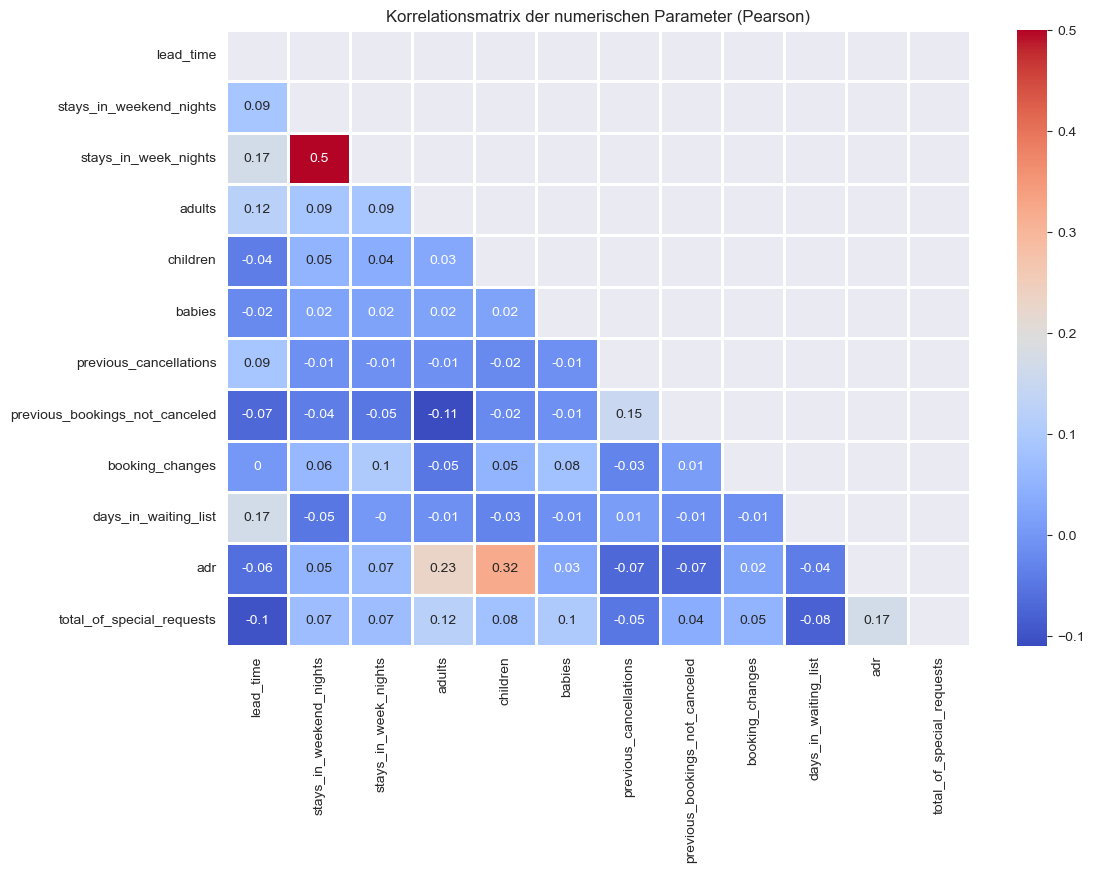

In [22]:
# Korrelationen numerischer Parameter inkl. boolschen Variablen
corr = hotel_df[numeric_columns].corr(method='pearson').round(decimals=2)

# Erstelle eine Matrix mit False Werten
mask = np.zeros_like(corr, dtype=bool)

# Gibt die Indizes wieder für das "upper-triangle" des Arrays und setzt diese Werte auf "True"
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12, 8))
sns.heatmap(
    corr
    , annot = True
    , linewidths = 1
    , cmap = 'coolwarm'
    # Masked alle Werte des oberen "upper Triangles" in der Darstellung
    , mask = mask
)
plt.title('Korrelationsmatrix der numerischen Parameter (Pearson)')

Nun werden die kategorischen Parameter betrachtet. **[Cramers V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)** ermöglicht es, die Assoziation zwischen zwei kategorialen Variablen quantitativ zu bewerten und ist hilfreich, um herauszufinden, wie stark sie miteinander zusammenhängen. Cramers V basiert auf einer nominalen Variante des Chi-Quadrat-Tests von Pearson und ist wie folgt definiert:

> $$ \chi^2 = \sum \frac{(beobachteter - erwarteter Wert)^2}{erwarteter Wert} $$

> $$ V = \sqrt{\frac{\chi^2}{n \cdot \min(k - 1, r - 1)}} $$

wobei,....
- n die Anzahl der Beobachtungen,
- k die Anzahl der Spalten, 
- r die Anzahl der Zeilen ist.

Text(0.5, 1.0, 'Korrelationsmatrix der kategorialen Variablen')

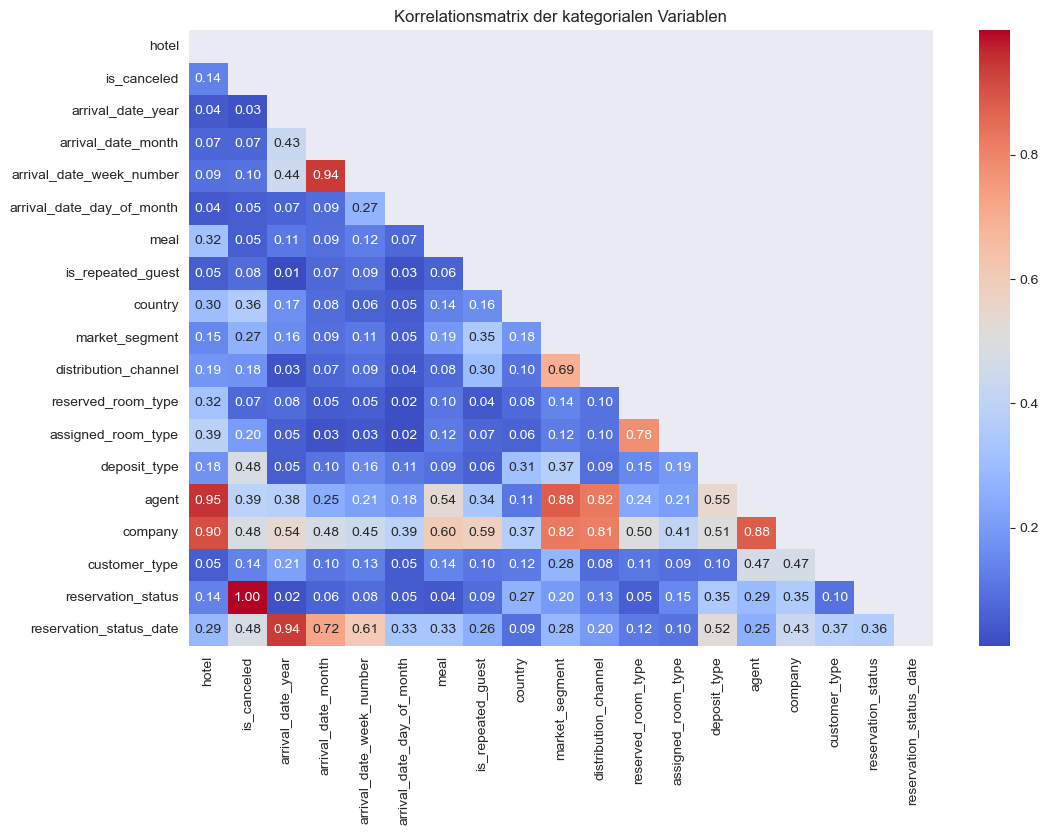

In [23]:
# Erstellt eine leere Korrelationsmatrix
numerical_correlation_matrix = pd.DataFrame(index=category_columns, columns=category_columns)

# Durchlaufe alle Kombinationen von Spaltenpaaren
for col1, col2 in itertools.combinations(category_columns, 2):
    # Wendet die cramers_v-Funktion auf das Spaltenpaar an
    correlation = utils.cramers_v(hotel_df[col1], hotel_df[col2])
    # Füllt die Korrelationsmatrix mit den Ergebnissen
    numerical_correlation_matrix.at[col1, col2] = correlation
    numerical_correlation_matrix.at[col2, col1] = correlation  # Die Matrix ist symmetrisch
    
# Konvertiert die Werte in der numerischen Korrelationsmatrix in float
numerical_correlation_matrix = numerical_correlation_matrix.astype(float)

# Erstellt eine Matrix mit False Werten
mask = np.zeros_like(numerical_correlation_matrix, dtype=bool)

# Gibt die Indizes wieder für das "upper-triangle" des Arrays und setzt diese Werte auf "True"
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 8))
sns.heatmap(
    data=numerical_correlation_matrix
    , annot=True
    , cmap='coolwarm'
    , fmt=".2f"
    # Masked alle Werte des oberen "upper Triangles" in der Darstellung
    , mask = mask
)
plt.title('Korrelationsmatrix der kategorialen Variablen')

- Es gibt eine leichte Assoziation zwischen `country`, `market_segment`, `deposit_type`, `agent` und der Variablen `is_canceled`
- `market_segment` und `distribution_channel` haben eine starke Korrelation, was auch durch die fachliche Definition begründet werden kann. So werden beispielsweise Buchungen über das Reisebüro (`distribution_channel` = "TO") dem Marktsegment "TO" zugeordnet. 
- `agent` und `company` haben jeweils starke Assoziationen mit `hotel`, `meal`, `market_segment`, `distribution_channel`, `depostit_type` sowie miteinander
- `company` korreliert mit allen anderen kategorialen Variablen. Buchungen von Unternehmen (`company`) kommen fast nie vor (94.3% der Werte sind NULL) was daher zu der Korrelation mit allen Variablen führt.

Um einen möglichen Zusammenhang zwischen einer kategorialen Variablen und numerischen Variablen zu ermitteln kann das Korrelationsverhältnis **eta** genutzt werden.

Mathematisch ist es definiert als die gewichtete Varianz des Mittelwerts jeder Kategorie geteilt durch die Varianz aller Stichprobe. Es beantwortet die Frage, wie gut man bei einer kontinuierlichen Zahl wissen kann, zu welcher Kategorie sie gehört. Der Wertebereich der Ausgabe liegt zwischen 0 und 1.

Text(0.5, 1.0, 'Korrelationskoeffizient eta der kategorialen Variablen mit der numerischen Variablen lead_time')

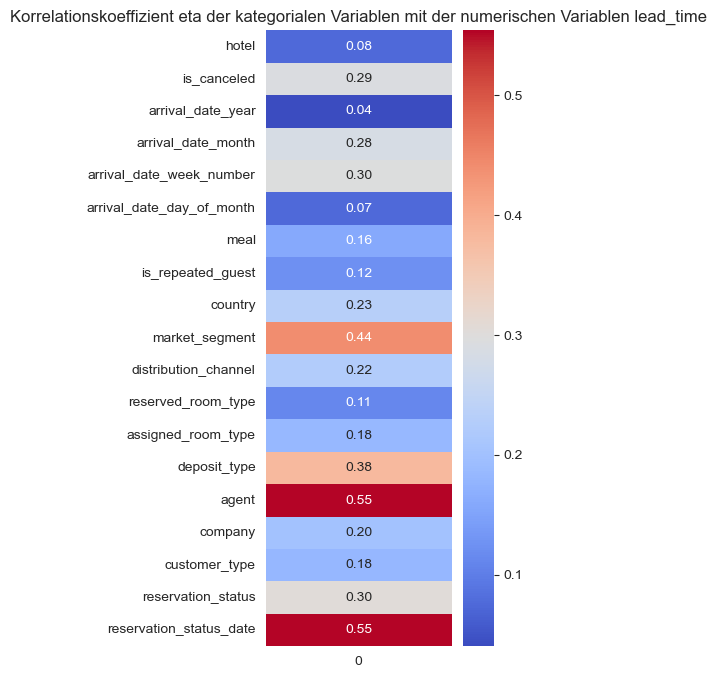

In [24]:
result={} # Initial leer
# iteriert über jede der kategorischen Spalten und gibt den correlation_ratio aus und speichert ihn in result
for col in category_columns:
    coef = correlation_ratio(hotel_df[col], hotel_df['lead_time'])
    result.setdefault(col,[]).append(coef)
# show correlation ratio as heatmap
plt.figure(figsize=(3, 8))
sns.heatmap(
    data=pd.DataFrame.from_dict(result, orient='index')
    , annot=True
    , cmap='coolwarm'
    , fmt=".2f"
)
plt.title('Korrelationskoeffizient eta der kategorialen Variablen mit der numerischen Variablen lead_time')

**Ergebnis der differenzierteren Betrachtung**

Zu den oben ausgewählten Variablen hätte ich noch folgende ausgewählt:

`country`, `is_agent` und `company`

Diese Variablen fließen erst mal nicht mit ins Modell, können aber ggf. für weitere Optimierungen herangezogen werden.

**Ergänzung: Ermittlung der Correlation Ration von ADR**

Text(0.5, 1.0, 'Korrelationskoeffizient eta der kategorialen Variablen mit der numerischen Variablen adr')

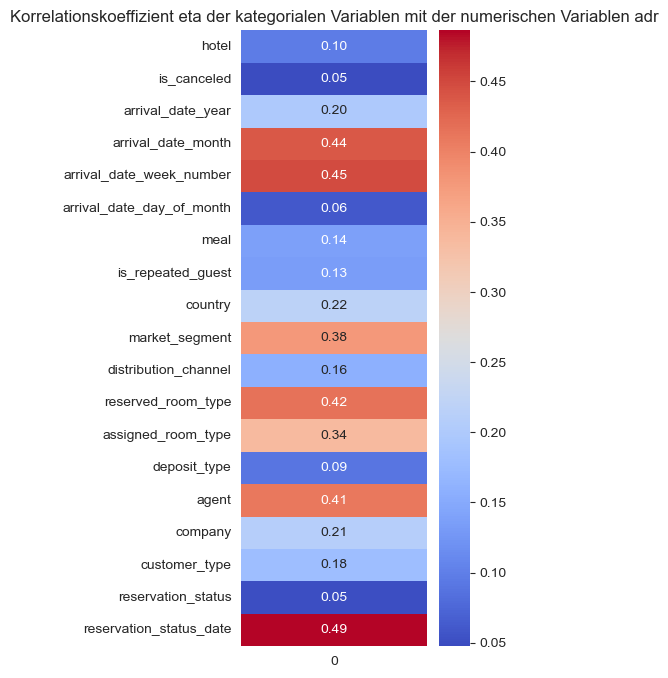

In [25]:
# Ermittelt die Correlation Ratio zwischen ADR und kategorischen Variablen
result={} # Initial leer
# iteriert über jede der kategorischen Spalten und gibt den correlation_ratio aus und speichert ihn in result
for col in category_columns:
    coef = correlation_ratio(hotel_df[col], hotel_df['adr'])
    result.setdefault(col,[]).append(coef)
# show correlation ratio as heatmap
plt.figure(figsize=(3, 8))
sns.heatmap(
    data=pd.DataFrame.from_dict(result, orient='index')
    , annot=True
    , cmap='coolwarm'
    , fmt=".2f"
)
plt.title('Korrelationskoeffizient eta der kategorialen Variablen mit der numerischen Variablen adr')

Folgende Variablen fallen bei dieser Betrachtung in Zusammenhang mit dem `adr` auf:
- Die Art des Hotels hat keine unmittelbare Association mit dem ADR.
- Der Buchungsstatus (`is_canceled` und `reservation_staus`), der Anreisetag (`arrival_date_day_of_month`) sowie die Anzahlungsart (`deposit_type`) scheinen auch keinen Zusammenhang mit dem ADR zu haben.
- Laut diesen Daten gibt es nur einen geringen Zusammenhang zwischen `is_repeated_guest` sowie `distribution_channel`. Dies überrascht etwas, da ich die Annahme hatte, dass Bestandskunden nicht so preissensitiv sind bzw. die Art der Buchung (über die eigene Website = Listenpreis, über booking.com = rabattierte Angebote...) einen Einfluss auf die Tagesrate hätte.
- Da lt. Definition die Kosten für Service, Essen und Getränke nicht in den ADR einfließen, ist es auch nicht weiter verwunderlich, dass es nur eine ganz leichte Assoziation mit `meal` gibt.
- `arrival_date_month` und/oder `arrival_date_week_number` beide Variablen decken sich etwas in der Aussage, ggf. ist die Wochennummer detaillierter zudem hat sie einen höheren Wert als `arrival_date_month`
- `market_Segment`
- `reserved_room_type` und/oder `assigned_room_type` fachlich hat vermutlich das reservierte Zimmer eher einen Einfluss, da bei einem Upgrade, da z.B. kein Einzelzimmer mehr frei ist man ein Doppelzimmer bekommt, dennoch der Preis eines Einzelzimmers in Rechnung gestellt wird und damit in den ADR fließt
- `agent`
- `reservation_status_date` hat noch eine höhere Assoziation als Ankunftsmonat und -woche, wird aus fachlicher Sicht jedoch nicht weiter betrachtet, da dies das letzte Datum ist, an dem Änderungen an der Buchung vorgenommen wurden. Da sollte der Buchungspreis bereits vorher feststehen.

---
### 2.4 Weitere Untersuchungen <a name="Collection4"></a>
Um Entwicklungen im Zeitverlauf zu erstellen und später weitere Untersuchungen zu machen, werden neue Spalten erzeugt:

In [26]:
# Um die Rohdaten nicht zu verändern, wird eine Kopie des Dataframes erstellt
hotel_check = hotel_df.copy()
# Neue Spalte Anreisedatum
map_month = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May': 5, 'June' : 6, 'July' : 7, 'August' : 8,
                 'September' : 9, 'October' : 10, 'November': 11, 'December': 12}

hotel_check['arrival_date_month_int'] = hotel_check['arrival_date_month'].map(map_month)
hotel_check['arrival_date'] = pd.to_datetime(hotel_check['arrival_date_year'].astype(str) + '-' + hotel_check['arrival_date_month_int'].astype(str) + '-' + hotel_check['arrival_date_day_of_month'].astype(str), format='%Y-%m-%d')
# Neue Spalte Kalenderwoche
hotel_check['arrival_week_of_year'] = hotel_check['arrival_date_year'].astype(str) + hotel_check['arrival_date_week_number'].astype(str).str.zfill(2) # zfill fügt führende Nullen hinzu
# Neue Spalte Summe der Gäste
hotel_check['no_guests'] = hotel_check['adults'] + hotel_check['children'] + hotel_check['babies']

# Anzahl der Übernachtungen
hotel_check['stays_in_nights'] = hotel_check['stays_in_weekend_nights'] + hotel_check['stays_in_week_nights']

# Ist die Buchung von einer Agentur
hotel_check['is_agent'] = np.where(hotel_check['agent'].isnull(), 0, 1)

In [27]:
# Konvertiere die Spalte "reservation_status_date" in den Datumsdatentyp
hotel_check['reservation_status_date'] = pd.to_datetime(hotel_check['reservation_status_date'])

In [28]:
min_date = hotel_check['arrival_date'].min()
max_date = hotel_check['arrival_date'].max()

print("Minimales Datum:", min_date)
print("Maximales Datum:", max_date)

Minimales Datum: 2015-07-01 00:00:00
Maximales Datum: 2017-08-31 00:00:00


Anfangs wurde festgestellt, dass 2015 weniger Buchungen umfasst als die Folgejahre. Das ist nicht weiter verwunderlich, wenn lediglich Daten im Zeitraum vom 01.07.2015 - 31.08.2017 vorliegen.

#### Zeitreihen Sichtungen
Um die Hotels besser untersuchen zu können, wird das Datenset gesplittet:

In [29]:
# Split des Datensets zur detaillierteren Sichtung
city_hotel = hotel_check[hotel_check['hotel'] == 'City Hotel']
resort_hotel = hotel_check[hotel_check['hotel'] == 'Resort Hotel']

**Entwicklung des ADR**

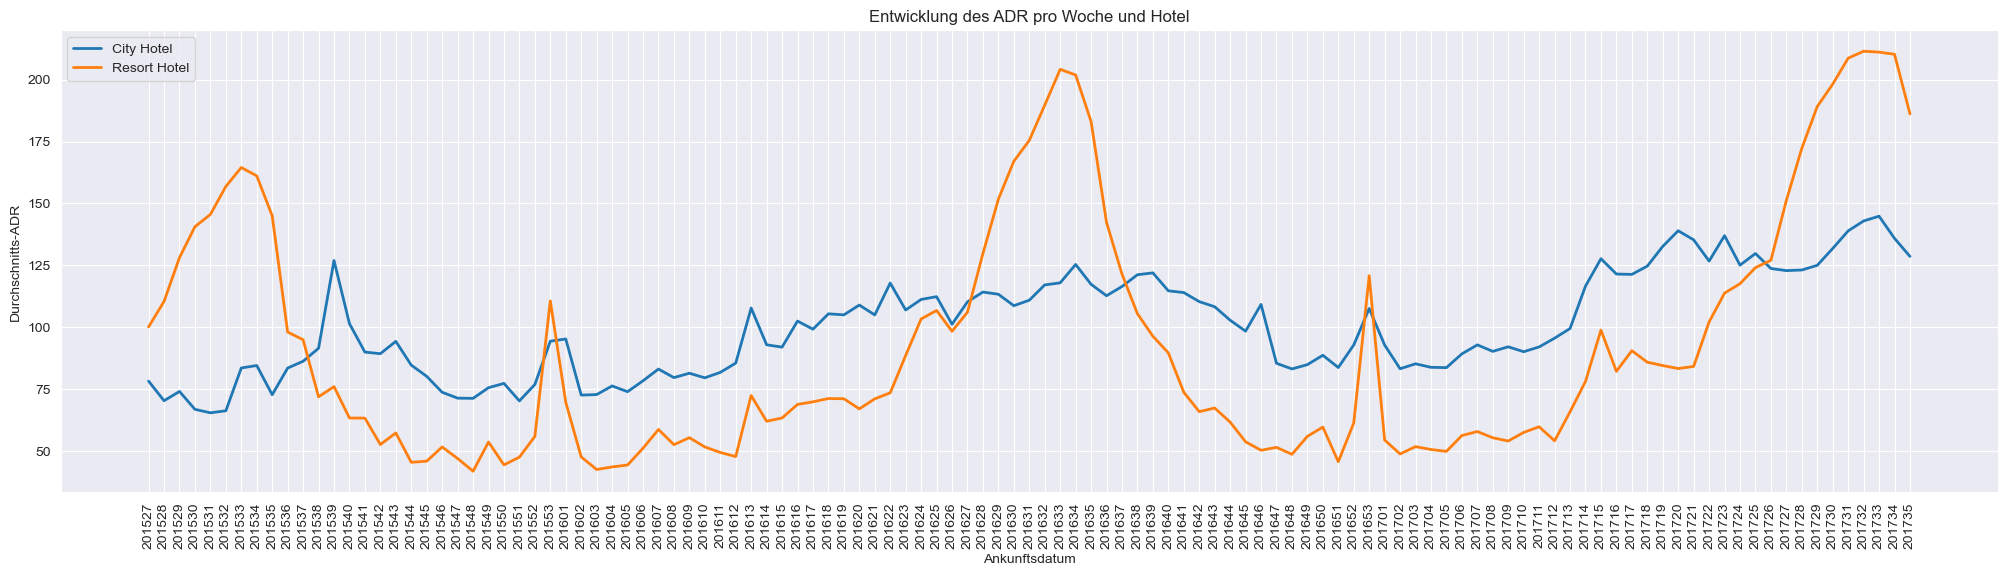

In [30]:
city_hotel_daily_weeklyadr = city_hotel.groupby('arrival_week_of_year')['adr'].mean()
resort_hotel_daily_weeklyadr = resort_hotel.groupby('arrival_week_of_year')['adr'].mean()

plt.figure(figsize=(25, 6))  # Größe des Diagramms festlegen
sns.lineplot(x=city_hotel_daily_weeklyadr.index, y=city_hotel_daily_weeklyadr.values, label='City Hotel', linewidth=2)
sns.lineplot(x=resort_hotel_daily_weeklyadr.index, y=resort_hotel_daily_weeklyadr.values, label='Resort Hotel', linewidth=2)

plt.title('Entwicklung des ADR pro Woche und Hotel')
plt.xlabel('Ankunftsdatum')
plt.ylabel('Durchschnitts-ADR')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)

Man sieht deutlich die Schwankungen der durchschnittlichen Tagessätze und die Unterschiede zwischen den beiden Hotels. Das Resort Hotel hat - wenig überraschend - höhere saisonale Ausschläge als das City Hotel. Um die Tagesschwankungen etwas zu glätten werden die durchschnittlichen Tagessätze pro Woche ermittelt:

Neben dem ADR wird auch die **Anzahl der Buchungen** je Hotel und Woche betrachtet:

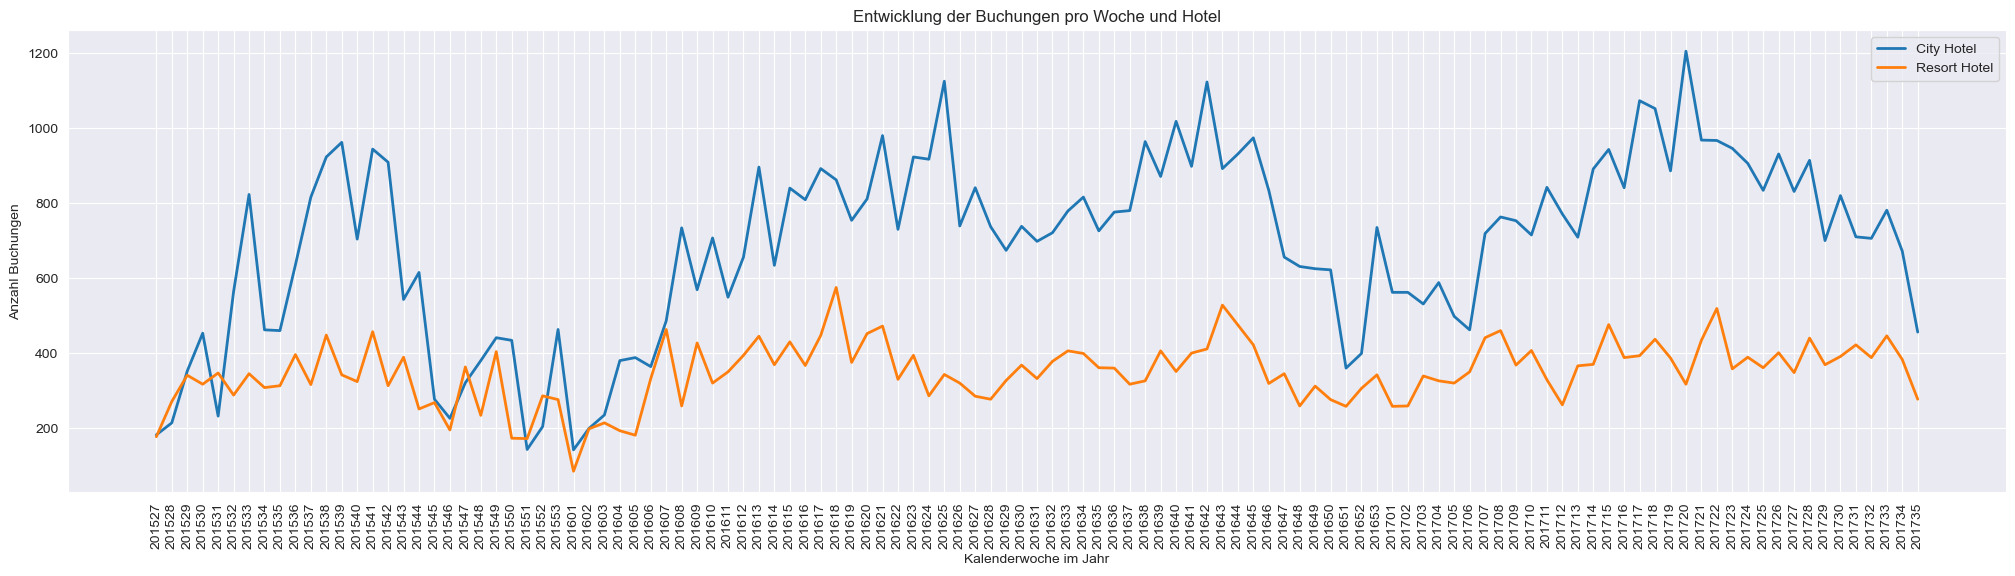

In [31]:
city_hotel_daily_weeklyadr = city_hotel.groupby('arrival_week_of_year')['adr'].count()
resort_hotel_daily_weeklyadr = resort_hotel.groupby('arrival_week_of_year')['adr'].count()


plt.figure(figsize=(25, 6))  # Größe des Diagramms festlegen
sns.lineplot(x=city_hotel_daily_weeklyadr.index, y=city_hotel_daily_weeklyadr.values, label='City Hotel', linewidth=2)
sns.lineplot(x=resort_hotel_daily_weeklyadr.index, y=resort_hotel_daily_weeklyadr.values, label='Resort Hotel', linewidth=2)

plt.title('Entwicklung der Buchungen pro Woche und Hotel')
plt.xlabel('Kalenderwoche im Jahr')
plt.ylabel('Anzahl Buchungen')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

Das Resort Hotel hat deutlich höhere Ranges in den Preisen je nach Saison. Das müsste bei einer Preisvorhersage berücksichtigt werden. 
Für ein Modell mit Preisvorhersagen, sollte nach der Bereinigung des Datensatzes dieser gesplittet werden, sodass das City Hotel und das Resort Hotel separat betrachtet werden.

**Betrachtung der Stornierungen im Zeitverlauf**  
Um zu ermitteln ob es auch saisonale Schwankungen in den Stornierungen gibt, werden diese visualisiert:

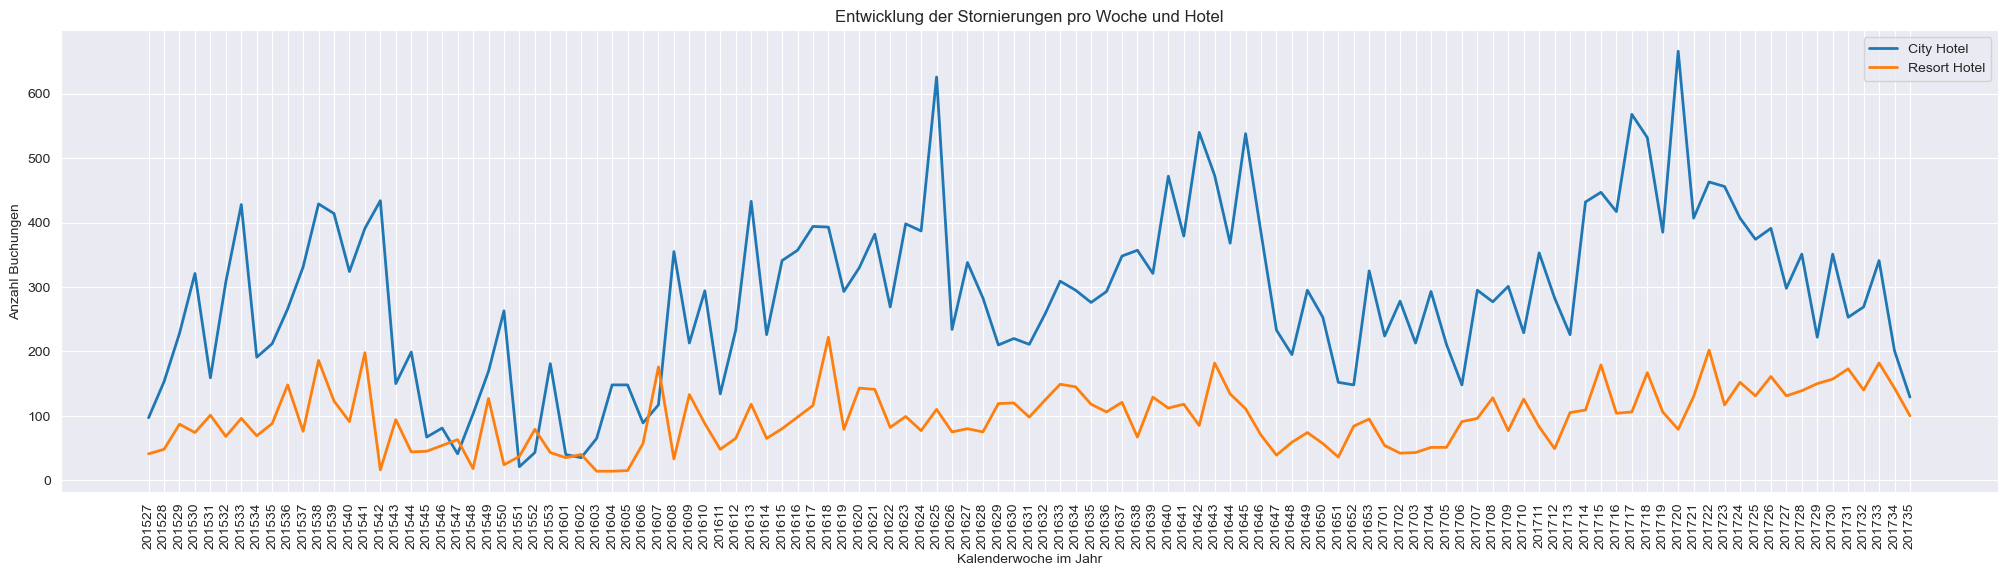

In [32]:
df_city_anzahl_stornierungen = city_hotel.groupby('arrival_week_of_year')['is_canceled'].sum()
df_resort_anzahl_stornierungen = resort_hotel.groupby('arrival_week_of_year')['is_canceled'].sum()

plt.figure(figsize=(25, 6))  # Größe des Diagramms festlegen
sns.lineplot(x=df_city_anzahl_stornierungen.index, y=df_city_anzahl_stornierungen.values, label='City Hotel', linewidth=2)
sns.lineplot(x=df_resort_anzahl_stornierungen.index, y=df_resort_anzahl_stornierungen.values, label='Resort Hotel', linewidth=2)

plt.title('Entwicklung der Stornierungen pro Woche und Hotel')
plt.xlabel('Kalenderwoche im Jahr')
plt.ylabel('Anzahl Buchungen')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

Bei einer durchschnittlichen Stornierungsrate von 37% nehmen auch die Stornierungen bei steigenden Buchungen zu. Um zu erkennen ob es besondere Ereignisse gibt, werden daher die Stornierungsquoten ermittelt:

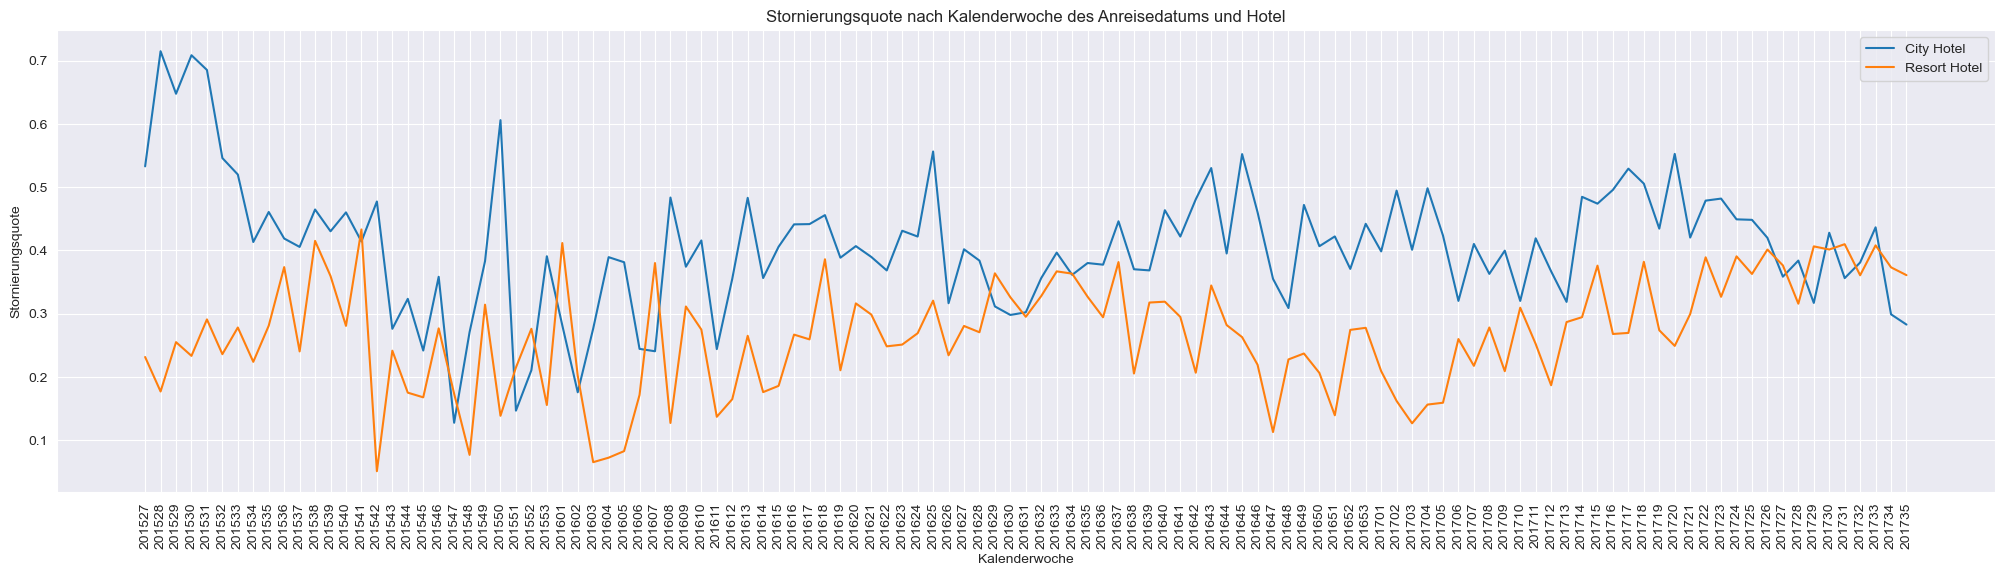

In [33]:
# Gruppieren Sie den DataFrame nach 'arrival_week_date' und 'hotel' und aggregieren Sie die Daten
result_df = hotel_check.groupby(['arrival_week_of_year', 'hotel']).agg({
    'is_canceled': ['count', 'sum']
}).reset_index()

# Ändern Sie die Spaltennamen für bessere Lesbarkeit
result_df.columns = ['arrival_week_of_year', 'hotel', 'anz_buchungen', 'anz_stornierungen']

result_df['stornierungsquote'] = result_df['anz_stornierungen'] / result_df['anz_buchungen']

# Sortieren Sie den DataFrame nach 'arrival_week_of_year', um sicherzustellen, dass die Daten in der richtigen Reihenfolge sind
result_df.sort_values(by='arrival_week_of_year', inplace=True)

# Erstellen Sie separate DataFrames für das City Hotel und das Resort Hotel
city_df = result_df[result_df['hotel'] == 'City Hotel']
resort_df = result_df[result_df['hotel'] == 'Resort Hotel']

# Erstellen Sie den Plot für das City Hotel
plt.figure(figsize=(25, 6))
plt.plot(city_df['arrival_week_of_year'], city_df['stornierungsquote'], label='City Hotel')

# Erstellen Sie den Plot für das Resort Hotel
plt.plot(resort_df['arrival_week_of_year'], resort_df['stornierungsquote'], label='Resort Hotel')

# Legende hinzufügen
plt.legend()

# Achsenbeschriftungen
plt.xlabel('Kalenderwoche')
plt.ylabel('Stornierungsquote')
plt.xticks(rotation=90)

# Titel hinzufügen
plt.title('Stornierungsquote nach Kalenderwoche des Anreisedatums und Hotel')

# Raster hinzufügen
plt.grid(True)

Es wird deutlich, dass die Stornierungsquote beim City Hotel höher ist als beim Resort Hotel.

Zudem gibt es beim City Hotel einzelne hohe Stornierungsquoten in KW 28-31 im Jahr 2015 sowie KW 50 im selben Jahr. Saisonale Schwankungen wie beim ADR sind jedoch nicht zu erkennen. Zieht man noch die Anzahl der Buchungen und die Anzahl der Gäste hinzu, dann zeigt sich, dass im 2. Halbjahr etwas geschehen sein muss, was dazu führte, dass a) Buchungen ab KW 28 2015 storniert wurden und b) auch die Anzahl der Gäste ab KW 28 2015 deutlich zurückging und auch ab KW 44 2015 für einen Zeitraum von ca. 15 Wochen deutlich weniger Buchungen im City Hotel eingingen.
Woran könnte das gelegen haben? Bei meinen Recherchen bin ich auf folgende Ereignisse gestoßen:
- Am 14.09.2015 wurde bei einem Portugiesen das [West Nil Virus diagnostiziert](https://www.who.int/emergencies/disease-outbreak-news/item/17-september-2015-wnv-en), was zu einer Reisewarnung für Portugal geführt haben könnte.
- Am 13.11.2015 kam es zu einer Reihe von [Terroranschlägen in Paris](https://de.wikipedia.org/wiki/Terroranschl%C3%A4ge_am_13._November_2015_in_Paris), was ebenso die Lust auf Städtereisen getrübt haben könnte.  

Da eine genaue Rekonstruktion der Ereignisse nicht möglich (und nicht Teil dieser Arbeit) ist und auch ein Zusammenhang mit mehreren Variablen die hier nicht betrachtet wurden möglich sein kann, wird dieser Aspekt nicht weiter verfolgt und die betroffenen Datensätze verbleiben im Datenset.

#### Betrachtung von Market Segment, Deposit Type und Is Agent

Es sollen die in Kapitel 2.3 ermittelten Variablen in Bezug auf `is_canceled` näher betrachtet werden.

In [34]:
hotel_check['is_agent'] = np.where(hotel_check['agent'].isnull(), 0, 1)

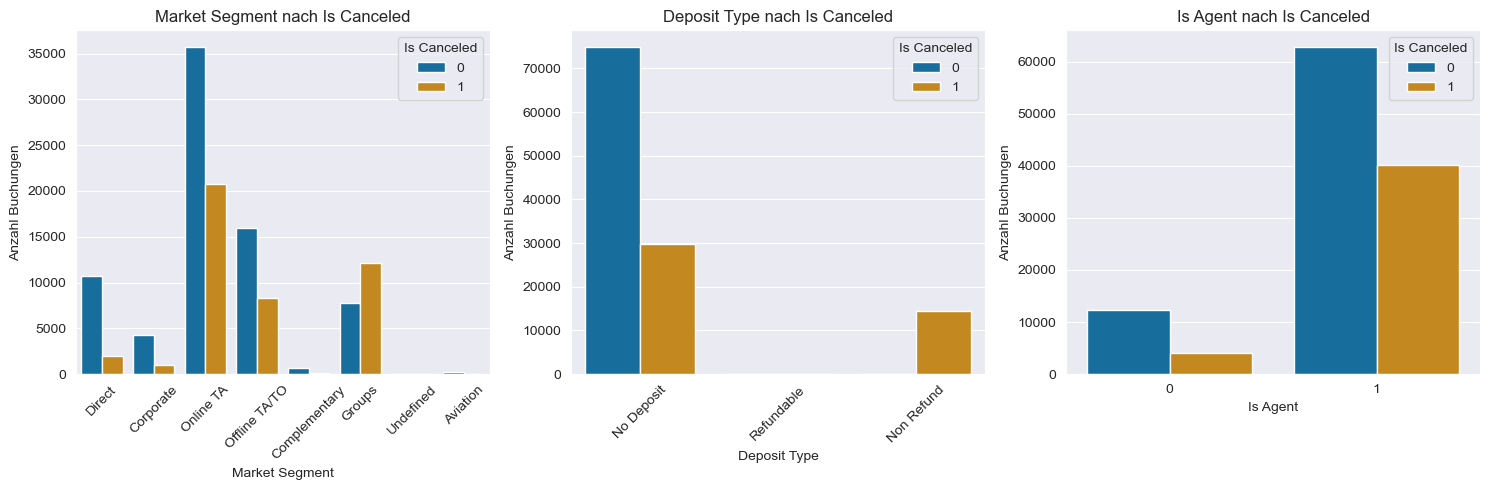

In [35]:
# Erstelle mehrere Barplots
plt.figure(figsize=(15, 5))

# Plot 1: Market Segment
plt.subplot(1, 3, 1)
sns.countplot(data=hotel_check, x='market_segment', hue='is_canceled', palette='colorblind')
plt.xlabel('Market Segment')
plt.ylabel('Anzahl Buchungen')
plt.title('Market Segment nach Is Canceled')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', loc='upper right')

# Plot 2: Deposit Type
plt.subplot(1, 3, 2)
sns.countplot(data=hotel_check, x='deposit_type', hue='is_canceled', palette='colorblind')
plt.xlabel('Deposit Type')
plt.ylabel('Anzahl Buchungen')
plt.title('Deposit Type nach Is Canceled')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', loc='upper right')

# Plot 3: Is Agent
plt.subplot(1, 3, 3)
sns.countplot(data=hotel_check, x='is_agent', hue='is_canceled', palette='colorblind')
plt.xlabel('Is Agent')
plt.ylabel('Anzahl Buchungen')
plt.title('Is Agent nach Is Canceled')
plt.legend(title='Is Canceled', loc='upper right')

# Plots anzeigen
plt.tight_layout()

Es fällt auf, dass mehr als die Hälfte der Buchungen die dem Marktsegment "Groups" angehören, storniert werden. Zudem dominieren die Stornierungen beim `deposit_type` mit der Ausprägung "Non Refund". Diese sollen sich noch einmal gesondert angeguckt werden:

Text(0.5, 1.0, 'Anzahl Buchungen ohne Rückerstattung und Is Canceled')

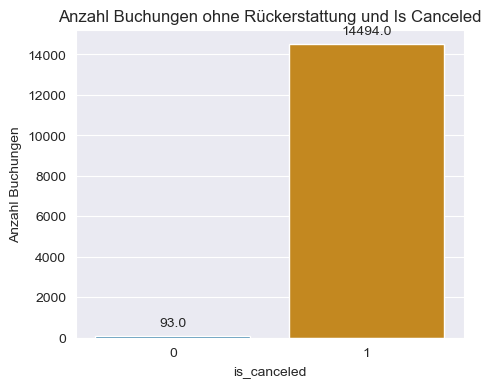

In [36]:
no_refund_df = hotel_check[hotel_check['deposit_type'] == 'Non Refund']

plt.figure(figsize=(5, 4))
sns.set_style('darkgrid')

# Erstellen Sie das Countplot.
ax = sns.countplot(data=no_refund_df, x='is_canceled', palette='colorblind')

# Beschriftung der Balken mit den Count-Werten.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',  xytext=(0, 5), textcoords='offset points')

plt.xlabel('is_canceled')
plt.ylabel('Anzahl Buchungen')
plt.title('Anzahl Buchungen ohne Rückerstattung und Is Canceled')

Fast alle der Buchungen ohne die Möglichkeit der Rückerstattung wurden storniert. Das ist aus Sicht der Reisenden wenig plausibel. Laut den Autoren könne es sich dabei um Fake-Buchungen handeln, die für eine Visa-Beantragung benötigt werden. (vgl. Nuno Antonio, Ana de Almeida and Luis Nunes: [Big Data in Hotel Revenue Management: Exploring Cancellation Drivers to Gain Insights Into Booking Cancellation Behavior](https://journals.sagepub.com/doi/pdf/10.1177/1938965519851466)).
Da diese Fälle aber auch in Zukunft auftreten können, werden sie nicht aus dem Datenset entfernt.

#### Betrachtung von required_car_parking_spaces und total_of_special_requests

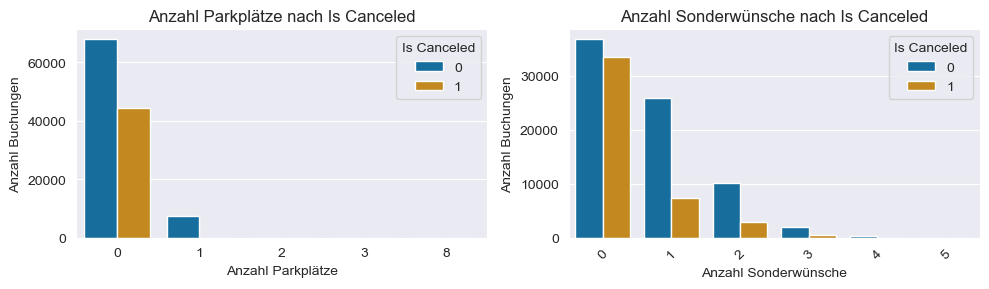

In [37]:
# Erstelle mehrere Barplots
plt.figure(figsize=(10, 3))

# Plot 1: Parkplätze
plt.subplot(1, 2, 1)
sns.countplot(data=hotel_check, x='required_car_parking_spaces', hue='is_canceled', palette='colorblind')
plt.xlabel('Anzahl Parkplätze')
plt.ylabel('Anzahl Buchungen')
plt.title('Anzahl Parkplätze nach Is Canceled')
plt.legend(title='Is Canceled', loc='upper right')

# Plot 2: Sonderwünsche
plt.subplot(1, 2, 2)
sns.countplot(data=hotel_check, x='total_of_special_requests', hue='is_canceled', palette='colorblind')
plt.xlabel('Anzahl Sonderwünsche')
plt.ylabel('Anzahl Buchungen')
plt.title('Anzahl Sonderwünsche nach Is Canceled')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', loc='upper right')

# Plots anzeigen
plt.tight_layout()

#### Plausicheck: Stimmen die Angaben zwischen stays in nights, reservation date, arrivaldate etc

In [38]:
# Tage zwischen letzten Reservierungsdatum und Anreisedatum
hotel_check['days_between_reservation_and_arrival'] = (hotel_check['reservation_status_date'] - hotel_check['arrival_date']).dt.days

selected_columns = ['arrival_date', 'reservation_status_date', 'is_canceled', 'stays_in_nights', 'days_between_reservation_and_arrival',]

# Verwenden Sie die loc-Methode, um die ausgewählten Spalten anzuzeigen
selected_data = hotel_check.loc[:, selected_columns]

selected_data = hotel_check.loc[(hotel_check['is_canceled'] == 0) & (hotel_check['stays_in_nights'] != hotel_check['days_between_reservation_and_arrival']), selected_columns]

# Zeigen Sie die ausgewählten Daten an
print('Anzahl der Einträge, bei denen die Daten unplausibel sind:',selected_data.shape[0])
# Der Status ist Checked Out, d.h. fachlich könnten die Menschen zwar die vielen Übernachtungen gebucht haben, mussten ihre Reise jedoch vorzeitig abbrechen.

Anzahl der Einträge, bei denen die Daten unplausibel sind: 27


In den Rohdaten befinden sich auch Buchungen, bei denen die reale Aufenthaltsdauer kleiner als die gebuchte war. Aus fachlicher Sicht kann dies durch eine ungeplante vorzeitige Abreise erfolgen. Die Anzahl die Fälle sind niedrig zudem entsprechen sie der Realität und werden daher nicht weiter bereinigt.

---
### 2.5 Ausreißer untersuchen <a name="Collection5"></a>
Wie bereits beschrieben, gibt es einige Variablen, bei denen die Daten in der Übersicht auf Ausreißer hinweisen. Diese sollen nun betrachtet werden.

In [39]:
hotel_outliner = hotel_check.copy()

In [40]:
# split data into two dataframes for each hotel
city_hotel = hotel_outliner[hotel_outliner['hotel'] == 'City Hotel']
resort_hotel = hotel_outliner[hotel_outliner['hotel'] == 'Resort Hotel']

#### Untersuchung von 'lead_time'
Wie anfangs beschrieben ist `lead_time` die Anzahl der Tage, die zwischen dem Datum der Eingabe der Buchung in das Buchungssystem und dem Ankunftsdatum verstrichen sind.

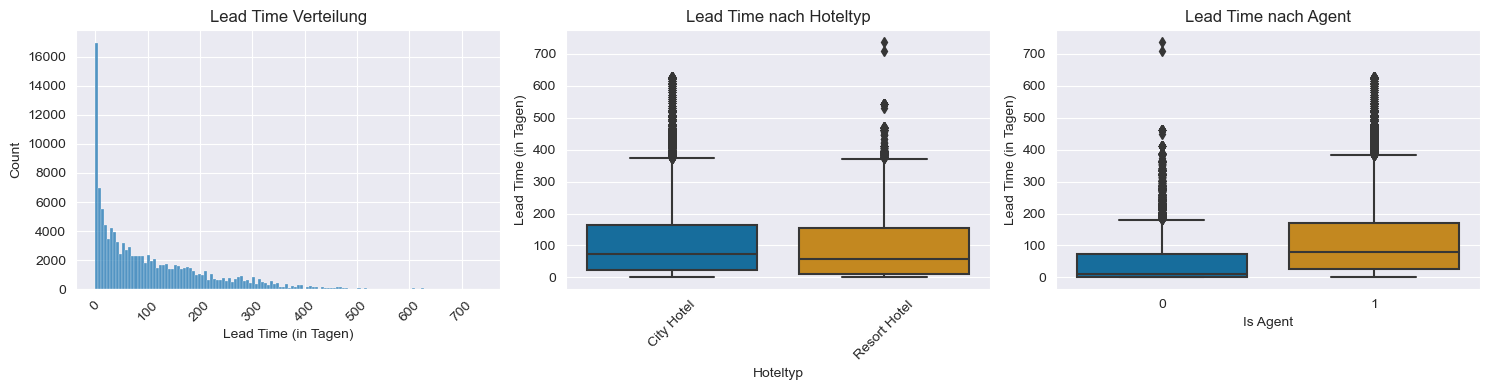

In [41]:
sorted_hotels = hotel_outliner['hotel'].sort_values().unique()

# Erstelle mehrere Barplots
plt.figure(figsize=(15, 4))

# Plot 1: Market Segment
plt.subplot(1, 3, 1)
sns.histplot(data=hotel_check, x='lead_time')
plt.xlabel('Lead Time (in Tagen)')
plt.ylabel('Count')
plt.title('Lead Time Verteilung')
plt.xticks(rotation=45)

# Plot 2: Deposit Type
plt.subplot(1, 3, 2)
sns.boxplot(data=hotel_outliner, x='hotel', y='lead_time', order=sorted_hotels, palette='colorblind')
plt.xlabel('Hoteltyp')
plt.ylabel('Lead Time (in Tagen)')
plt.title('Lead Time nach Hoteltyp')
plt.xticks(rotation=45)

# Plot 3: Is Agent
plt.subplot(1, 3, 3)
sns.boxplot(data=hotel_outliner, x='is_agent', y='lead_time', palette='colorblind')
plt.xlabel('Is Agent')
plt.ylabel('Lead Time (in Tagen)')
plt.title('Lead Time nach Agent')

# Plots anzeigen
plt.tight_layout()

In [42]:
# Ausreißer mit der IQR-Methode für beide Hotels ermitteln
utils.iqr_outlier(hotel_outliner, 'lead_time')

Unteres Quantil: 18.0 , Median:  69.0 , Oberes Quantil: 160.0 , IQR:  142.0
IQR Untere Grenze:  -195.0 , IQR Obere Grenze:  373.0
Anzahl der Ausreißer:  3005 , Anteil der Ausreißer:  2.52 %
Minimum: 0 , Maximum: 737


`lead_time` hat offensichtlich einige Ausreißer (3.005), die teils doppelt so hoch sind wie das 3. Quantil. Zudem ist die Variable sehr rechtsschief.

Sowohl bei dem City Hotel (Stichwort Messen) als auch dem Resort Hotel (Stichwort Frühbucherrabatte) sind ein früher Buchungszeitpunkt fachlich nicht unüblich. Es wird auch deutlich, dass Buchungen über Agenturen (is_agent = 1) tendenziell früher getätigt werden.

Die Ausreißer mit einer `lead_time`> 373 Tage werden noch einmal gesondert betrachtet:

In [43]:
lead_time_out = hotel_outliner[hotel_outliner['lead_time'] > 373]

Text(0.5, 1.0, 'Anzahl Buchungen mit Lead_Time > 373 Tage\n nach Is Canceled')

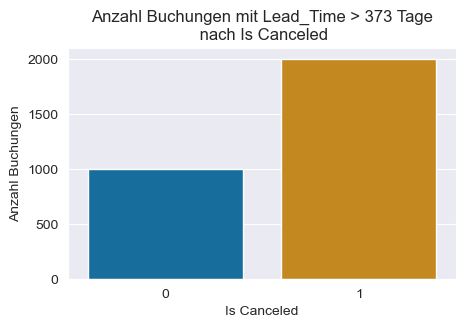

In [44]:
plt.figure(figsize=(5, 3))
sns.countplot(data=lead_time_out, x='is_canceled', palette='colorblind')
plt.xlabel('Is Canceled')
plt.ylabel('Anzahl Buchungen')
plt.title('Anzahl Buchungen mit Lead_Time > 373 Tage\n nach Is Canceled')

67 % der Buchungen, die über ein Jahr vor Anreisezeitpunkt gebucht wurden, werden wieder storniert.

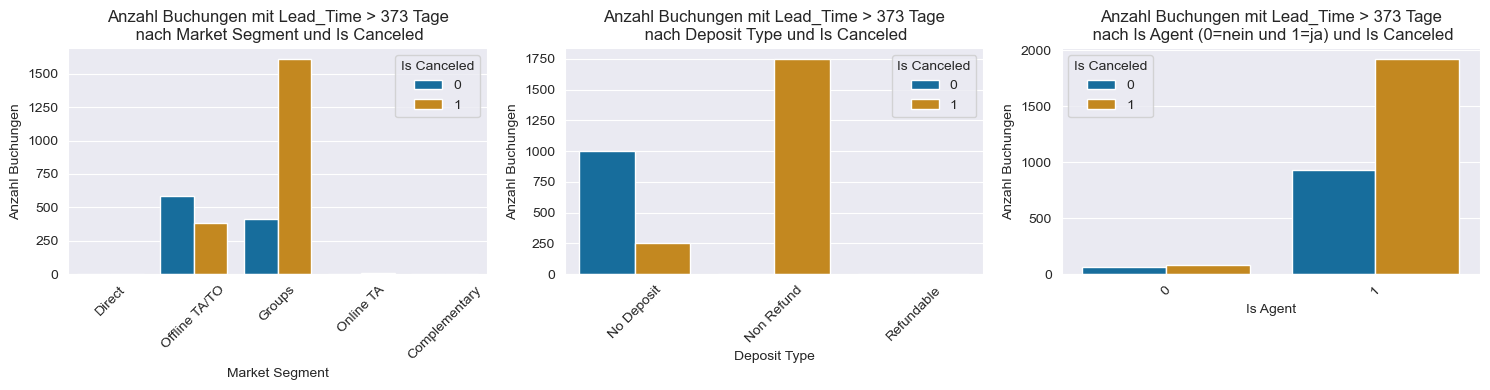

In [45]:
# Erstelle mehrere Barplots
plt.figure(figsize=(15, 4))

# Erstelle die anderen 3 Plots in einer Zeile darunter
plt.subplot(1, 3, 1)
sns.countplot(data=lead_time_out, x='market_segment', hue='is_canceled', palette='colorblind')
plt.xlabel('Market Segment')
plt.ylabel('Anzahl Buchungen')
plt.title('Anzahl Buchungen mit Lead_Time > 373 Tage\n nach Market Segment und Is Canceled')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', loc='upper right')

plt.subplot(1, 3, 2)
sns.countplot(data=lead_time_out, x='deposit_type', hue='is_canceled', palette='colorblind')
plt.xlabel('Deposit Type')
plt.ylabel('Anzahl Buchungen')
plt.title('Anzahl Buchungen mit Lead_Time > 373 Tage\n nach Deposit Type und Is Canceled')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', loc='upper right')

plt.subplot(1, 3, 3)
sns.countplot(data=lead_time_out, x='is_agent', hue='is_canceled', palette='colorblind')
plt.xlabel('Is Agent')
plt.ylabel('Anzahl Buchungen')
plt.title('Anzahl Buchungen mit Lead_Time > 373 Tage\n nach Is Agent (0=nein und 1=ja) und Is Canceled')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', loc='upper left')

# Plots anzeigen
plt.tight_layout()

Insbesondere Reiseagenturen buchen weit im Voraus (und stornieren diese Frühbuchungen aber auch wieder). Buchungen von "Groups" fallen auch hier wieder ins Auge.

Da die Daten wie dargestellt rechtsschief sind, kann in dem Abschnitt der Datenbereinigung versucht werden, diese Daten mit einer log-Transformation mehr einer Normalverteilung anzugleichen.
Diese Transformation hat gleichermaßen einen Einfluss auf die Ausreißer. Es erscheint sinnvoll, vorher sehr starke Ausreißer aus dem Datensatz zu entfernen. Hier wäre die fachliche Definition > 548 Tage möglicherweise passend. Selbst bei Messe- und Ferienbuchungen sollten 1,5 Jahre im Voraus ausreichen.

#### Untersuchung von 'days_in_waiting_list'
Wie anfangs beschrieben sagt diese Variable aus, wie viele Tage Personen auf ihre Buchungsbestätigung warten müssen.

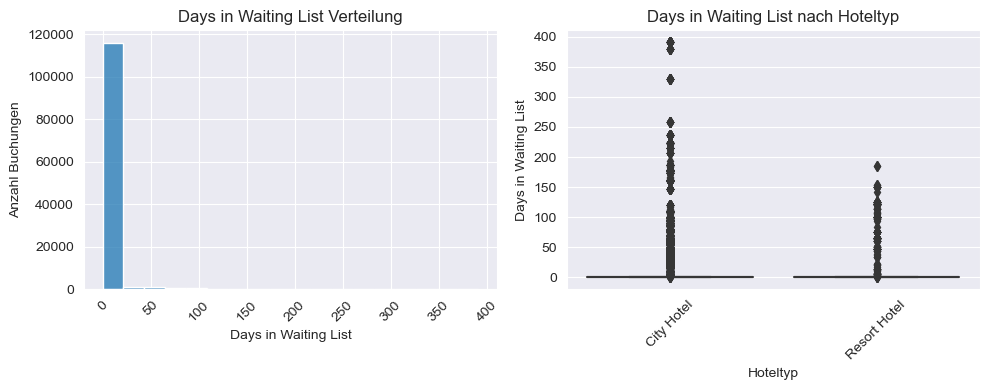

In [46]:
# Erstelle mehrere Barplots
plt.figure(figsize=(10, 4))

# Plot 1: Days in Waiting Lis
plt.subplot(1, 2, 1)
sns.histplot(data=hotel_check, x='days_in_waiting_list')
plt.xlabel('Days in Waiting List')
plt.ylabel('Anzahl Buchungen')
plt.title('Days in Waiting List Verteilung')
plt.xticks(rotation=45)

# Plot 2: Nach Hoteltyp
plt.subplot(1, 2, 2)
sns.boxplot(data=hotel_outliner, x='hotel', y='days_in_waiting_list', order=sorted_hotels, palette='colorblind')
plt.xlabel('Hoteltyp')
plt.ylabel('Days in Waiting List')
plt.title('Days in Waiting List nach Hoteltyp')
plt.xticks(rotation=45)

# Plots optimiert anzeigen
plt.tight_layout()

In [47]:
 # Ermittlung der Ausreißer mit der IQR-Methode für beide Hotels
utils.iqr_outlier(hotel_outliner, 'days_in_waiting_list')

Unteres Quantil: 0.0 , Median:  0.0 , Oberes Quantil: 0.0 , IQR:  0.0
IQR Untere Grenze:  0.0 , IQR Obere Grenze:  0.0
Anzahl der Ausreißer:  3698 , Anteil der Ausreißer:  3.1 %
Minimum: 0 , Maximum: 391


Hier zeigt sich, dass die Buchungsbestätigungen sowohl beim City als auch beim Resort Hotel fast immer am selben Tag der Buchung erfolgen.
3.698 Datensätze sind außerhalb der oberen Grenze. Das entspricht einem Anteil von 3 % aller Datensätze.
Da auch davon ausgegangen werden muss, dass es in der Zukunft zu solchen Ausreißern kommen kann, wird erst einmal keine Bereinigung vorgenommen.

#### Untersuchung von 'adr'
Wie beschrieben, handelt es sich beim ADR um die durchschnittliche Tagesrate.

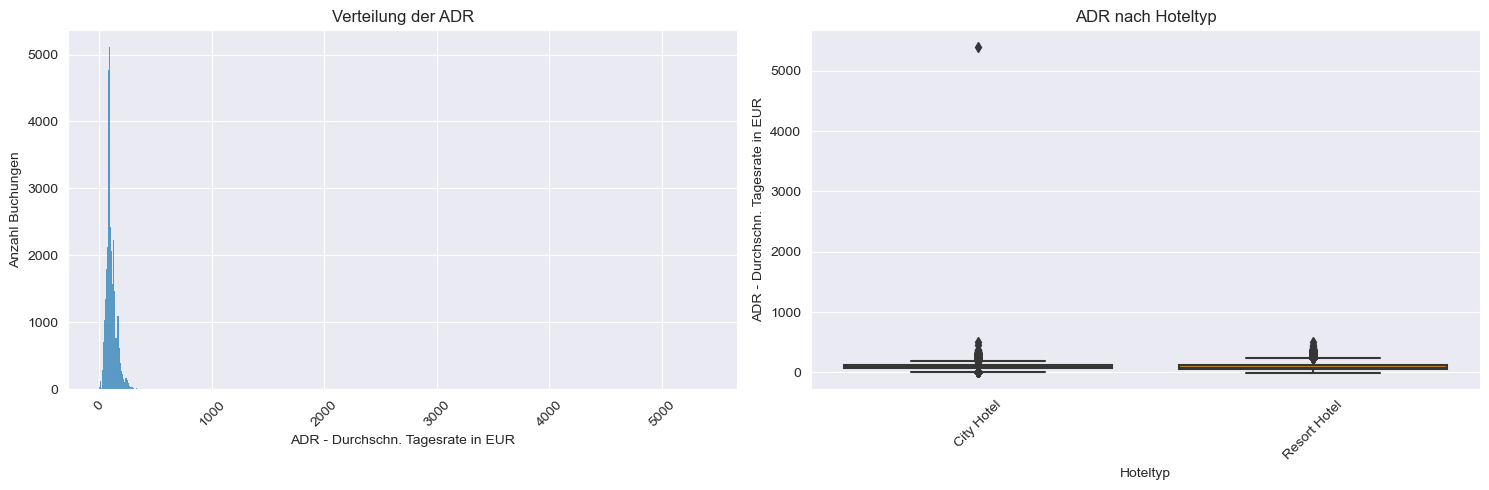

In [48]:
plt.figure(figsize=(15, 5))

# Plot 1: Days in Waiting Lis
plt.subplot(1, 2, 1)
sns.histplot(data=hotel_check, x='adr')
plt.xlabel('ADR - Durchschn. Tagesrate in EUR')
plt.ylabel('Anzahl Buchungen')
plt.title('Verteilung der ADR')
plt.xticks(rotation=45)

# Plot 2: Nach Hoteltyp
plt.subplot(1, 2, 2)
sns.boxplot(data=hotel_outliner, x='hotel', y='adr', order=sorted_hotels, palette='colorblind')
plt.xlabel('Hoteltyp')
plt.ylabel('ADR - Durchschn. Tagesrate in EUR')
plt.title('ADR nach Hoteltyp')
plt.xticks(rotation=45)

# Plots optimiert anzeigen
plt.tight_layout()

Bezüglich der Höhe der Ausreißer gibt es deutliche Unterschiede zwischen den beiden Hotels. Beim City Hotel sind die Ausreißer deutlich höher als beim Resort Hotel. Es macht jedoch den Anschein, als gäbe es beim City Hotel einen einzelnen Extremfall. Daher werden hier mit der IQR Methode die Ausreißer ermittelt und beim Dataframe 'City Hotel' die Ausreißer = max-Wert zum Test entfernt.

In [49]:
utils.iqr_outlier(hotel_outliner, 'adr')

Unteres Quantil: 69.29 , Median:  94.575 , Oberes Quantil: 126.0 , IQR:  56.709999999999994
IQR Untere Grenze:  -15.774999999999991 , IQR Obere Grenze:  211.065
Anzahl der Ausreißer:  3793 , Anteil der Ausreißer:  3.18 %
Minimum: -6.38 , Maximum: 5400.0


Es gibt einen Ausreißer von 5.400 € der bei der Betrachtung der sonstigen durchschnittlichen Werte unrealistisch erscheint und später entfernt werden sollte.
Es werden nun noch einmal die Ausreißer ohne den Extremfall betrachtet:

(array([0, 1]), [Text(0, 0, 'City Hotel'), Text(1, 0, 'Resort Hotel')])

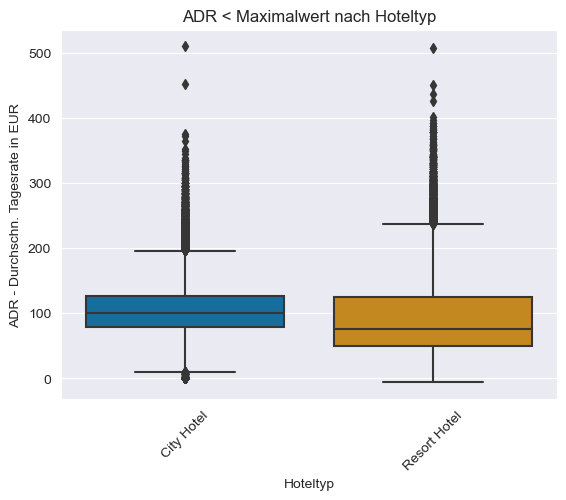

In [50]:
datensaetze_adr_max = hotel_outliner[hotel_outliner['adr'] < hotel_outliner['adr'].max()]
sns.boxplot(data=datensaetze_adr_max, x='hotel', y='adr', order=sorted_hotels, palette='colorblind')
plt.xlabel('Hoteltyp')
plt.ylabel('ADR - Durchschn. Tagesrate in EUR')
plt.title('ADR < Maximalwert nach Hoteltyp')
plt.xticks(rotation=45)

In [51]:
# Alle Ausreißer beider Hotels inkl. dem Extremwert des City Hotels
utils.iqr_outlier(datensaetze_adr_max, 'adr')

Unteres Quantil: 69.29 , Median:  94.56 , Oberes Quantil: 126.0 , IQR:  56.709999999999994
IQR Untere Grenze:  -15.774999999999991 , IQR Obere Grenze:  211.065
Anzahl der Ausreißer:  3792 , Anteil der Ausreißer:  3.18 %
Minimum: -6.38 , Maximum: 510.0


3.792 der Datensätze ohne den Extremfall haben in der Spalte `adr` Werte oberhalb der oberen Grenze. Das entspricht 3,2% der Datensätze.
Wie bereits erwähnt, kann der ADR nicht negativ sein, somit sind diese Datensätze definitiv zu entfernen.

Die Datensätze oberhalb der IQR Grenze können noch einmal genauer betrachtet werden.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

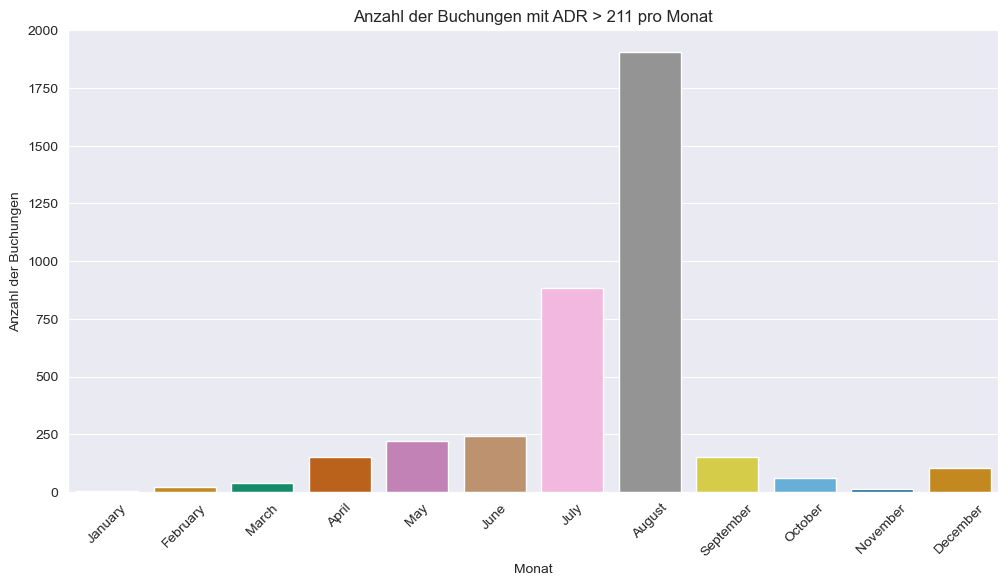

In [52]:
datensaetze_mit_adr_outliner = hotel_outliner[hotel_outliner['adr'] > 211]

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')

# Verwenden Sie ein Seaborn Countplot.
sns.countplot(data=datensaetze_mit_adr_outliner, x='arrival_date_month', palette='colorblind')

plt.xlabel('Monat')
plt.ylabel('Anzahl der Buchungen')
plt.title('Anzahl der Buchungen mit ADR > 211 pro Monat')
plt.xticks(rotation=45)

81,7 % der Datensätze oberhalb der oberen Grenze fällt auf Buchungen, die in den Sommermonaten Juni-August fallen. Da dies üblicherweise auch stark
frequentierte Reisemonate sind, könnte es sich um saisonale Schwankungen handeln.

**Es soll noch einmal ein Blick auf die Datensätze mit einem ADR von 0 geworfen werden.**

Folgende Gründe können dazu führen, dass der ADR = 0 ist:
- Keine Zimmerverkäufe an diesem Tag: Wenn an einem bestimmten Tag keine Zimmer verkauft wurden, da das Hotel möglicherweise geschlossen war oder aus anderen Gründen keine Buchungen hatte, wird der ADR 0 € betragen. -> Dagegen spricht, dass eine Buchung stattgefunden hat
- Fehlerhafte Datenerfassung: Ein technischer Fehler bei der Datenerfassung oder Buchungsverarbeitung könnte dazu führen, dass die Einnahmen aus Zimmervermietungen nicht erfasst wurden, und somit würde der ADR auf 0 € gesetzt.
- Kostenlose Aufenthalte: Wenn das Hotel an einem Tag kostenlosen Aufenthalt für bestimmte Gäste oder Mitarbeiter angeboten hat und diese Aufenthalte in den Berechnungen des ADR berücksichtigt werden, könnte der Durchschnittspreis aufgrund der kostenlosen Aufenthalte auf 0 € fallen.
- Stornierungen oder No-Shows: Wenn es an einem Tag viele Stornierungen oder No-Shows gab und das Hotel keine Einnahmen aus Zimmervermietungen erzielte, würde der ADR an diesem Tag 0 € betragen. -> Der überwiegende Anteil der betroffenen Buchungen wurde nicht storniert.

Einige Aspekte werden noch mal genauer betrachtet:

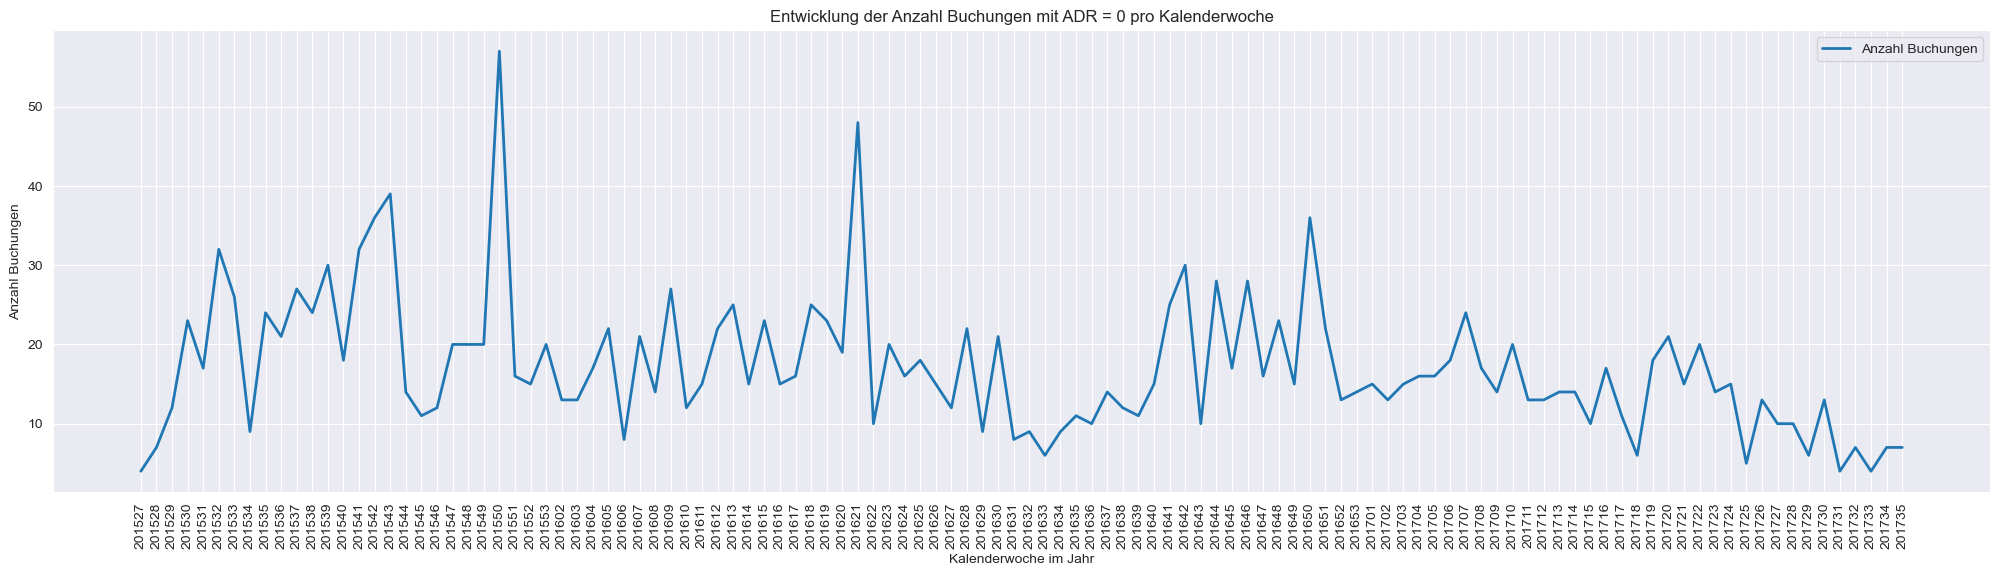

In [53]:
datensaetze_mit_adr_0 = hotel_outliner[hotel_outliner['adr'] == 0]

anzahl_buchungen = datensaetze_mit_adr_0.groupby('arrival_week_of_year')['adr'].count()

plt.figure(figsize=(25, 6))  # Größe des Diagramms festlegen
sns.lineplot(x=anzahl_buchungen.index, y=anzahl_buchungen.values, label='Anzahl Buchungen', linewidth=2)

plt.title('Entwicklung der Anzahl Buchungen mit ADR = 0 pro Kalenderwoche')
plt.xlabel('Kalenderwoche im Jahr')
plt.ylabel('Anzahl Buchungen')
plt.xticks(rotation=90)

plt.legend()
plt.grid(True)

Keine Auffälligkeiten im Zeitverlauf sichtbar.

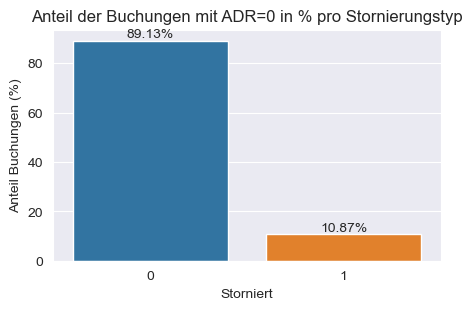

In [54]:
x,y = utils.get_count(datensaetze_mit_adr_0['is_canceled'])

utils.plot_values(x=x, y=y, x_label='Storniert', y_label='Anteil Buchungen (%)', title='Anteil der Buchungen mit ADR=0 in % pro Stornierungstyp'
    , figsize=(5,3))

Da nur 11 % der Buchungen storniert wurden und auch die zeitliche Verteilung der Buchungen mit ADR=0 nicht auffällig ist, kann davon ausgegangen werden, dass die Buchungen mit ADR=0 nicht aufgrund von Stornierungen entstanden sind.

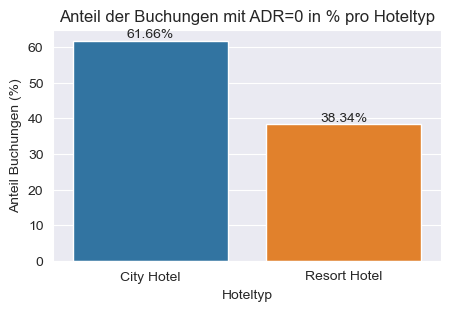

In [55]:
x,y = utils.get_count(datensaetze_mit_adr_0['hotel'])

utils.plot_values(x=x, y=y, x_label='Hoteltyp', y_label='Anteil Buchungen (%)', title='Anteil der Buchungen mit ADR=0 in % pro Hoteltyp'
    , figsize=(5,3))

Die Buchungen mit ADR=0 sind bei beiden Hoteltypen zu finden.

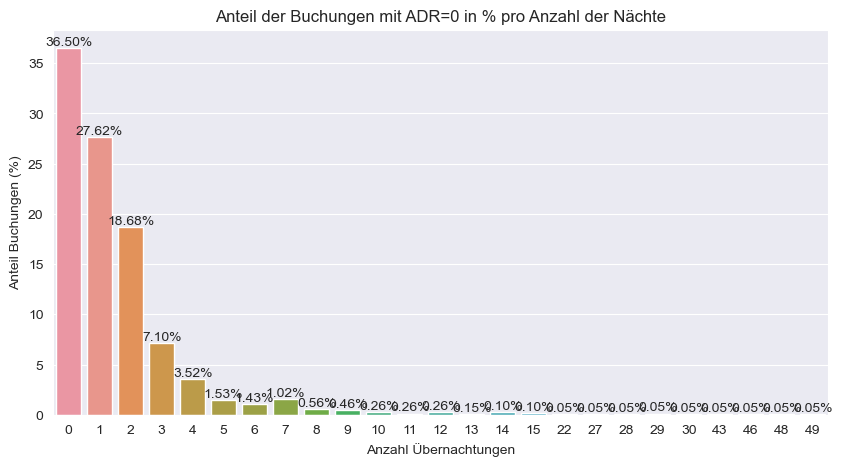

In [56]:
x,y = utils.get_count(datensaetze_mit_adr_0['stays_in_nights'])

utils.plot_values(x=x, y=y, x_label='Anzahl Übernachtungen', y_label='Anteil Buchungen (%)', title='Anteil der Buchungen mit ADR=0 in % pro Anzahl der Nächte'
    , figsize=(10,5))

Es gibt einige Buchung mit einem ADR=0 bei denen keine Übernachtung stattfand.
Die Recherche hat ergeben, dass es durchaus möglich ist, dass Zimmer für den Tag gebucht werden können (siehe: https://de.wikipedia.org/wiki/Tageszimmer).
Darunter können Tagungs- oder Konferenzräume fallen, aber auch Zimmer für Geschäftsreisende, die während des Tages Meetings haben und sich für ein paar Stunden in ein Hotelzimmer zurückziehen wollen. Reisende, können zur Überbrückung ihrer Weiterreise sich im Zimmer ausruhen. Zudem bieten einige Hotels Fitnessstudios, Pools oder Wellnessbereiche an, die auch von Nicht-Übernachtungsgästen genutzt werden können. Diese Gäste können ein Zimmer buchen, um Zugang zu diesen Einrichtungen zu erhalten.

Von einem systematischen Erfassungsfehler wird hier also erst einmal nicht ausgegangen und die Werte verbleiben im Datenset.

Es wird noch einmal die Verteilung der Variable ADR betrachtet. Da die Log-Funktion nicht für negative Werte gilt und es sich bei negativen ADRs um Fehler handeln muss, werden die Datensätze mit einem ADR < 0 entfernt.

In [57]:
adr_verteilung = hotel_check[hotel_check['adr'] >= 0]

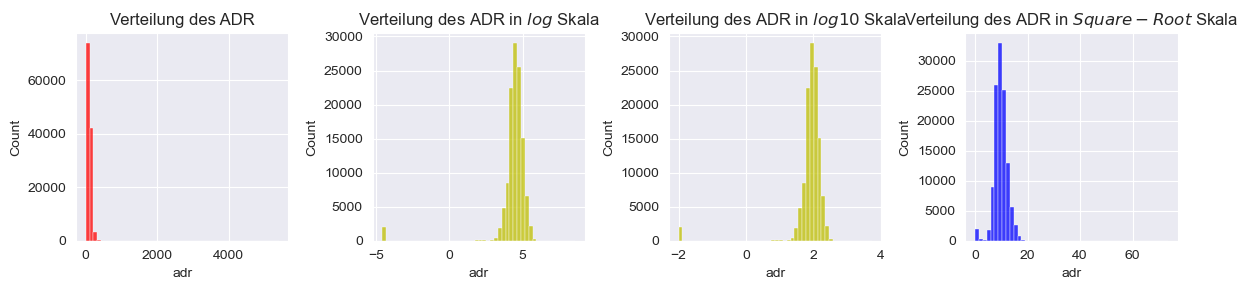

In [58]:
# Ebenso wie bei Lead Time gibt es hier Werte mit der Ausprägung 0, sodass die Log-Funktion nur mit einer Pseudokonstante funktioniert.
f = plt.figure(figsize=(12, 3))

ax1 = f.add_subplot(141)
sns.histplot(adr_verteilung['adr'], bins=50, color='r', ax=ax1)
ax1.set_title('Verteilung des ADR')

ax2 = f.add_subplot(142)
sns.histplot(np.log(adr_verteilung['adr']+0.01), bins=50, color='y', ax=ax2)
ax2.set_title('Verteilung des ADR in $log$ Skala')

ax3 = f.add_subplot(143)
sns.histplot(np.log10(adr_verteilung['adr']+0.01), bins=50, color='y', ax=ax3)
ax3.set_title('Verteilung des ADR in $log10$ Skala')

ax4 = f.add_subplot(144)
sns.histplot(np.sqrt(adr_verteilung['adr']), bins=50, color='b', ax=ax4)
ax4.set_title('Verteilung des ADR in $Square-Root$ Skala')

plt.tight_layout()

Die Verteilung des ADR ist recht schief. Bereits die Darstellung mit dem natürlichen Logarithmus lässt die Verteilung "normalverteilter" aussehen. Daher sollte die Variable ADR bei einer Verwendung transformiert werden.

---
### 2.6 Zusammenfassung der Ergebnisse aus der Datensichtung <a name="Collection6"></a>

**Es gibt doppelten Zeilen im DataFrame**

**Folgende Spalten haben fehlende Werte**
- children --> 4 fehlende Werte, entweder Zeilen entfernen oder durch Median ersetzen (Median ist weniger empfindlich für Ausreißer)
- country --> 488 fehlende Werte; ggf. ersetzen durch "unbekannt" o.ä.
- agent --> lt. der Autoren des Datensets, wird agent nur gefüllt, wenn es über eine Agentur gebucht wurde. Daher sollten die fehlenden Werte hier mit einem eigenem, neuen Wert gefüllt werden 
- company --> 112.593 fehlende Werte. Ggf. eher ein Feld einfügen is_company. Wenn company not_null dann 1 sonst 0
--> Business Informationen beachten: Es gibt echte NULL werte die eher als Unbekannt / andere zu werten sind

Obwohl in der Datensichtung entschieden wurde, dass für Preisfragestellungen die Einzelinformationen von `agent` und `company` vermutlich wenig hilfreich sind, sollte im folgenden eine Gruppierung stattfinden die zumindest die Information beinhaltete `is_agent` und `is_company`. Diese Variablen müssen nicht in allen Modellen Berücksichtigung finden.

**In folgenden Spalten ist der Datentyp nicht korrekt**
- children -> float statt int aber es gibt keine halben Menschen 

**Es gibt Ausreißer**
- ADR < 0 sowie ADR = 5400 sollten entfernt werden
- Lead_time sollte um Ausreißer bereinigt werden

**Weitere Anpassungen**
- Monat sollte in Zahlen umgewandelt werden, dann lässt sich z.B. auch ein echtes Datumsfeld zusammensetzen um Zeitverläufe und Entwicklungen der Nachfragen darzustellen
- ADR und lead_time sind rechtsschief und sollten daher (bei einer Anwendung in einem Modell) transformiert werden

**Für die Fragestellung zu Stornierungen gilt es folgendes zu berücksichtigen**
- Nutzung der im Abschnitt Korrelation ermittelten Spalten für eine Vorhersage

**Für die Fragestellung zu Preisen sind folgende Aspekte zu beachten**
- Für eine Preisvorhersage über bereits bestehende Modelle wie Prophet werden lediglich Ankunftsdatum und ADR benötigt

**Weiter Auffälligkeiten, denen hier nicht weiter nachgegangen wird**
Beim Plausibilitätscheck ist aufgefallen, dass es Abweichungen zwischen den angegebenen Daten und den rechnerischen gibt. So gibt es Einträge, deren letzter Reservierungsstatus Check_out ist, die Buchung nicht storniert ist und das Reservierungs_Status_Datum jedoch dem, der Anreise entspricht. Es gibt jedoch stays_in_weekend_nights und stays_in_week_nights. Da es nicht den Status "Checked in" gibt, wird irgendeine der Informationen einen Fehler aufweisen. Da nicht klar ist, welche der Felder möglicherweise fehlerhaft ist und nicht alle betroffenen Datensätze entfernt werden sollen, verbleiben diese erst mal im Datensatz.

---
## 3. Datenbereinigung und Vorbereitung <a name="Cleaning"></a>
Im weiteren Verlauf nehmen wir die vorher identifizierten Aspekte auf und nehmen die Datenbereinigung vor.

Um die ursprünglichen Daten nicht zu überschreiben, nehmen wir die Korrekturen und Anpassungen in einem neuen Datensatz vor.

In [59]:
hotel_df = pd.read_csv('./src/hotel_bookings.csv')
hotel_clean_df = hotel_df.copy()

---
### 3.1 Umgang mit Duplikaten <a name="Cleaning1"></a>
Es muss geprüft werden, ob im Datensatz doppelte Werte vorkommen. Bei 32 Variablen gehe ich davon aus, dass trotz fehlendem Unique Identifier (wie Kundennummer, Buchungsnummer o.ä.) es genügend Kombinationen der Variablen gibt. Daher gehe ich davon aus, dass wenn alle Einträge in den Spalten identisch sind, es sich um tatsächlich doppelte Werte handelt und nicht nur um zufällig gleiche Ausprägungen.

In [60]:
hotel_clean_df.duplicated().sum()

31994

Anscheinend handelt es sich bei 31.994 Werten um Duplikate, die aus dem Datenset entfern werden sollen.

In [61]:
count_start_rows = hotel_clean_df.shape[0]

hotel_clean_df.drop_duplicates(inplace=True, keep='last') # entferne die doppelten Einträge, behalte die neusten

# Check, ob das Entfernen der Duplikate funktioniert hat
count_start_rows - hotel_clean_df.shape[0]

31994

---
### 3.2 Ersetzen der NULL-Werte<a name="Cleaning2"></a>
Bei den Variablen `childen`, `country`, `agent` und `company` wurden bei der Sichtung fehlende Werte festgestellt.

In [62]:
# Berechne den Median der vorhandenen Werte in der Spalte "children"
median_children = hotel_clean_df['children'].median()

# Ersetze die fehlenden Werte durch den Median
hotel_clean_df['children'].fillna(median_children, inplace=True)

Durch die Business Informationen wissen wir, dass es eigentlich keine fehlenden Werte geben sollten, sondern diese zum Zeitpunkt der Datenerfassung dem Hotel nicht bekannt waren. Daher wird hier für die fehlenden Werte nicht der Median sondern der Platzhalter "unknown" gewählt.

In [63]:
# Ersetze die fehlenden Werte in der Spalte "country" durch "unknown"
hotel_clean_df['country'].fillna('unknown', inplace=True)

Für die fehlenden Werte die den Spalten `agent` und `company` kann der Wert **0** gewählt werden. Dieser repräsentiert also die Kategorie "nicht zutreffend".

In [64]:
# Ersetze die NaN-Werte in der Spalte "agent" und "company" durch 99999
hotel_clean_df['agent'].fillna(0, inplace=True)
hotel_clean_df['company'].fillna(0, inplace=True)

Es werden zudem die Spalten `agent` und `company` in neue gruppierte Variablen mit den Ausprägungen 1 und 0 überführt. Dies erfolgt in Schritt 3.5.

Wir prüfen, ob die Ersetzungen geklappt haben:

In [65]:
utils.analyze_null_values(hotel_clean_df)

---- Variable und Anzahl NULL-Werte mit Anteil an Total ----
Keine NULL-Werte vorhanden


---
### 3.3 Umgang mit unplausiblen Daten <a name="Cleaning3"></a>
Es gibt **negative Werte im Feld adr**. Da es nicht viele Einträge sind, werden diese entfernt.

In [66]:
# Verwende eine bedingte Auswahl, um Datensätze mit adr < 0 auszuwählen
buchungen_mit_adr_unter_0 = hotel_clean_df[hotel_clean_df['adr'] < 0]

# Zeige die ausgewählten Datensätze an
print('Anzahl Datensätze mit negativem ADR:',len(buchungen_mit_adr_unter_0))

Anzahl Datensätze mit negativem ADR: 1


Es scheint nur einen Eintrag mit negativen `adr` zu geben. Dieser wird entfernt:

In [67]:
# Verwende die drop-Methode, um Zeilen mit adr < 0 zu entfernen
hotel_clean_df.drop(buchungen_mit_adr_unter_0.index, inplace=True)

# Überprüfe das aktualisierte DataFrame
print('Anzahl Datensätze mit negativem ADR:',len(hotel_clean_df[hotel_clean_df['adr'] < 0]))

Anzahl Datensätze mit negativem ADR: 0


---
### 3.4 Umwandlung von Monat Text zu Zahl <a name="Cleaning4"></a>
`arrival_date_month` soll von Text in Zahl konvertiert werden         

In [68]:
map_month = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May': 5, 'June' : 6, 'July' : 7, 'August' : 8,
                 'September' : 9, 'October' : 10, 'November': 11, 'December': 12}

hotel_clean_df['arrival_date_month_int'] = hotel_clean_df['arrival_date_month'].map(map_month)
hotel_clean_df[['arrival_date_month', 'arrival_date_month_int']].head()

arrival_date_month  arrival_date_month_int
0               July                       7
1               July                       7
2               July                       7
3               July                       7
5               July                       7

---
### 3.5 Weitere neue Spalten <a name="Cleaning5"></a>
Für das aktuelle Modell und spätere Anpassungen können neue Spalten von Vorteil sein.

In [69]:
# Summe der Anzahl der Gäste und Anzahl der Übernachtungen
hotel_clean_df['no_guests'] = hotel_clean_df['adults'] + hotel_clean_df['children'] + hotel_clean_df['babies']
hotel_clean_df['stays_in_nights'] = hotel_clean_df['stays_in_weekend_nights'] + hotel_clean_df['stays_in_week_nights']

# Anreisedatum
hotel_clean_df['arrival_date'] = pd.to_datetime(hotel_clean_df['arrival_date_year'].astype(str) + '-' + hotel_clean_df['arrival_date_month_int'].astype(str) 
                                                + '-' + hotel_clean_df['arrival_date_day_of_month'].astype(str), format='%Y-%m-%d')

# Kalenderwoche
hotel_clean_df['arrival_week_of_year'] = hotel_clean_df['arrival_date_year'].astype(str) + hotel_clean_df['arrival_date_week_number'].astype(str).str.zfill(2)

# Umwandlung der Informationen über agent und company in gruppierte Variablen
hotel_clean_df['is_agent'] = np.where(hotel_clean_df['agent']==0, 0, 1)
hotel_clean_df['is_company'] = np.where(hotel_clean_df['company']==0, 0, 1)

# Check ob neue Spalten hinzugefügt wurden und korrekt sind
hotel_clean_df[['adults','children','babies','no_guests','arrival_date_year', 'arrival_date_month_int', 'arrival_date_day_of_month', 'arrival_date', 
                'arrival_week_of_year', 'agent', 'is_agent','company', 'is_company']].head()

adults  children  babies  no_guests  arrival_date_year  \
0       2       0.0       0        2.0               2015   
1       2       0.0       0        2.0               2015   
2       1       0.0       0        1.0               2015   
3       1       0.0       0        1.0               2015   
5       2       0.0       0        2.0               2015   

   arrival_date_month_int  arrival_date_day_of_month arrival_date  \
0                       7                          1   2015-07-01   
1                       7                          1   2015-07-01   
2                       7                          1   2015-07-01   
3                       7                          1   2015-07-01   
5                       7                          1   2015-07-01   

  arrival_week_of_year  agent  is_agent  company  is_company  
0               201527    0.0         0      0.0           0  
1               201527    0.0         0      0.0           0  
2               201527    0.0         0      0.0           0  
3               201527  304.0         1      0.0           0  
5               201527  240.0         1      0.0           0

---
### 3.6 Konvertierung von Datentypen <a name="Cleaning6"></a>

In [70]:
# Konvertiere der Spalten in int64
columns_to_convert = ['children','agent','company']
hotel_clean_df[columns_to_convert] = hotel_clean_df[columns_to_convert].astype('int64')

# Konvertiere die Spalte "reservation_status_date" in den Datumsdatentyp
hotel_clean_df['reservation_status_date'] = pd.to_datetime(hotel_clean_df['reservation_status_date'])

# Überprüfe das aktualisierte DataFrame
print(hotel_clean_df[['children','agent','company','reservation_status_date']].dtypes)

children                            int64
agent                               int64
company                             int64
reservation_status_date    datetime64[ns]
dtype: object


---
### 3.7 Umgang mit Ausreißern <a name="Cleaning7"></a>
Es gibt in einigen Variablen Ausreißer, da von den betroffenen Variablen aktuell jedoch nur die `lead_time` herangezogen wird, werden auch nur die Ausreißer dort bereinigt. Da auch mit dem `ADR` experimentiert wird, werden extreme Ausreißer hier auch entfernt.
Die anderen Bereinigungsschritte können für andere Modelle bei Bedarf gemacht werden.

#### Lead Time
Es sollen sehr starke Ausreißer bei denen zwischen Buchungs- und Anreisedatum mehr als 1,5 Jahre (= 548 Tage) liegen, aus dem Datensatz entfernt werden. Wie bei der Sichtung der Daten gesehen, wandelt eine Log-Transformation nicht nur eine rechtsschiefe Verteilung in Richtung einer Normalverteilung, sondern reduziert zusätzlich die Ausreißer. 

In [71]:
utils.iqr_outlier(hotel_clean_df, 'lead_time')

Unteres Quantil: 11.0 , Median:  49.0 , Oberes Quantil: 125.0 , IQR:  114.0
IQR Untere Grenze:  -160.0 , IQR Obere Grenze:  296.0
Anzahl der Ausreißer:  2396 , Anteil der Ausreißer:  2.74 %
Minimum: 0 , Maximum: 737


In [72]:
# Check Datensätze mit lead_time > 548
lead_time_548 = hotel_clean_df[hotel_clean_df['lead_time'] > 548]
print('Anzahl der Datensätze mit einer Lead Time > 548 Tage:', lead_time_548.shape[0])

Anzahl der Datensätze mit einer Lead Time > 548 Tage: 28


In [73]:
# Entferne Datensätze die eine lead_time > 548 haben 
hotel_clean_df = hotel_clean_df[hotel_clean_df['lead_time'] <= 548]

Alternativ zu der Einschränkung auf 548 Tage wäre auch das Entfernen der Einträge, die oberhalb der oberen Grenze liegen, möglich.

In [26]:
# Alternative wenn noch mehr Ausreißer entfernt werden müssen
# Outliner in ADR durch ober und untere Grenze ersetzen
#Q1 = hotel_clean_df.lead_time.quantile(0.25)
#Q3 = hotel_clean_df.lead_time.quantile(0.75)
#IQR = float(Q3 - Q1)
#lower_bound = float(Q1 - 1.5 * IQR)
#upper_bound = float(Q3 + 1.5 * IQR)
#print('Untere Grenze: ' , lower_bound, ', Obere Grenze: ', upper_bound)

In [ ]:
# Die untere Grenze ist unrealistisch zu sein, daher werden (erstmal) nur die oberen Ausreißer durch die obere Grenze ersetzt
#hotel_clean_df = hotel_clean_df[hotel_clean_df['lead_time'] > upper_bound]

# Check ob die Ausreißer entfernt wurden
#hotel_clean_df['adr'].max()

#### ADR

In [74]:
utils.iqr_outlier(hotel_clean_df, 'adr')

Unteres Quantil: 72.0 , Median:  98.1 , Oberes Quantil: 134.0 , IQR:  62.0
IQR Untere Grenze:  -21.0 , IQR Obere Grenze:  227.0
Anzahl der Ausreißer:  2490 , Anteil der Ausreißer:  2.85 %
Minimum: 0.0 , Maximum: 5400.0


In [75]:
# Entferne den Maximalwert von 5.400
hotel_clean_df = hotel_clean_df[hotel_clean_df['adr'] < 5400]
# Prüfe durch Ermittlung des neuen Maximalwertes ob die Bereinigung erfolgreich war
hotel_clean_df['adr'].max()

510.0

Da die Ausreißer saisonalbedingt sind, verbleiben diese (erstmal) im Datensatz. Bei weiteren Verbesserungswünschen, könnten diese noch durch die obere Grenze der IQR Methode geglättet oder aber Datensätze oberhalb dieser Grenze entfernt werden.

#### Optional: Anzahl der Übernachtungen


In [45]:
# Alle Einträge mit stays_in_nights = 0 entfernen
#hotel_clean_df = hotel_clean_df[hotel_clean_df['stays_in_nights'] != 0]

In [46]:
#utils.iqr_outlier(hotel_clean_df, 'stays_in_nights')

Da angenommen wird, dass sich die Aufenthaltsdauer in den Hotels unterscheidet, wird hier noch ein Blick darauf geworfen:

In [47]:
#hotel_clean_df.groupby('hotel')['stays_in_nights'].describe()

In [48]:
# Outliner in ADR durch ober und untere Grenze ersetzen für Daten mit hotel = city hotel
#Q1 = hotel_clean_df[hotel_clean_df['hotel'] == 'City Hotel']['stays_in_nights'].quantile(0.25)
#Q3 = hotel_clean_df[hotel_clean_df['hotel'] == 'City Hotel']['stays_in_nights'].quantile(0.75)
#IQR = float(Q3 - Q1)
#lower_bound = float(Q1 - 1.5 * IQR)
#upper_bound = float(Q3 + 1.5 * IQR)
#print('Untere Grenze:', lower_bound, ', Obere Grenze:', upper_bound)

Die oberen Ausreißer werden bei City Hotels durch die obere Grenze ersetzt:

In [49]:
#hotel_clean_df.loc[(hotel_clean_df['hotel'] == 'City Hotel') & (hotel_clean_df['stays_in_nights'] > upper_bound), 'stays_in_nights'] = upper_bound

In [50]:
# Outliner in stays_in_nights durch ober und untere Grenze ersetzen für Daten mit hotel = Resort Hotel
#Q1 = hotel_clean_df[hotel_clean_df['hotel'] == 'Resort Hotel']['stays_in_nights'].quantile(0.25)
#Q3 = hotel_clean_df[hotel_clean_df['hotel'] == 'Resort Hotel']['stays_in_nights'].quantile(0.75)
#IQR = float(Q3 - Q1)
#lower_bound = float(Q1 - 1.5 * IQR)
#upper_bound = float(Q3 + 1.5 * IQR)
#print('Untere Grenze:', lower_bound, ', Obere Grenze:', upper_bound)

In [51]:
#hotel_clean_df.loc[(hotel_clean_df['hotel'] == 'Resort Hotel') & (hotel_clean_df['stays_in_nights'] > upper_bound), 'stays_in_nights'] = upper_bound

# Prüfen ob die (oberen) Ausreißer entfernt wurden
#hotel_clean_df.groupby('hotel')['stays_in_nights'].describe()

#### Optional: Anzahl der Gäste

In [52]:
# Anzahl Buchungen mit no_guests = 0
#hotel_clean_df[hotel_clean_df['no_guests'] == 0].shape[0]

Obwohl bei der Datensichtung bereits festgestellt wurde, dass es sehr wohl möglich ist ein Zimmer ohne Gäste zu buchen, wird hier angenommen, dass dies nicht der Fall ist. Daher werden diese Einträge entfernt.

In [53]:
# Annahme: Ein Zimmer ohne Gäste ist nicht möglich, daher werden diese Einträge entfernt
#hotel_clean_df = hotel_clean_df[hotel_clean_df['no_guests'] != 0]

In [54]:
# Outliner in no_guests prüfen
#utils.iqr_outlier(hotel_clean_df, 'no_guests')

In [55]:
# Überprüfen ob sich die Anzahl der Gäste je nach Hotel unterscheidet
#hotel_clean_df.groupby('hotel')['no_guests'].describe()

In [56]:
# Plot der Anzahl der Gäste je nach Hotel
#sns.boxplot(x='hotel', y='no_guests', data=hotel_clean_df)

Das Resort Hotel hat extremere Ausreißer als das City Hotel. Daher werden die beiden Hotels getrennt betrachtet.

In [57]:
# Outliner in ADR durch ober und untere Grenze ersetzen für Daten mit hotel = city hotel
#Q1 = hotel_clean_df[hotel_clean_df['hotel'] == 'City Hotel']['no_guests'].quantile(0.25)
#Q3 = hotel_clean_df[hotel_clean_df['hotel'] == 'City Hotel']['no_guests'].quantile(0.75)
#IQR = float(Q3 - Q1)
#lower_bound = float(Q1 - 1.5 * IQR)
#upper_bound = float(Q3 + 1.5 * IQR)
#print('Untere Grenze:', lower_bound, ', Obere Grenze:', upper_bound)

In [58]:
# Ersetze die oberen Ausreißer bei City Hotels durch die obere Grenze
#hotel_clean_df.loc[(hotel_clean_df['hotel'] == 'City Hotel') & (hotel_clean_df['stays_in_nights'] > upper_bound), 'no_guests'] = upper_bound

In [59]:
# Outliner in ADR durch ober und untere Grenze ersetzen für Daten mit hotel = Resort Hotel
#Q1 = hotel_clean_df[hotel_clean_df['hotel'] == 'Resort Hotel']['no_guests'].quantile(0.25)
#Q3 = hotel_clean_df[hotel_clean_df['hotel'] == 'Resort Hotel']['no_guests'].quantile(0.75)
#IQR = float(Q3 - Q1)
#lower_bound = float(Q1 - 1.5 * IQR)
#upper_bound = float(Q3 + 1.5 * IQR)
#print('Untere Grenze:', lower_bound, ', Obere Grenze:', upper_bound)

In [60]:
# Für ein Resort Hotel was seinen Peak in den Sommermonaten hat, erscheint mir die obere Grenze zu niedrig. Daher schauen wir uns die Verteilung der no_guest noch mal pro Kalenderwoche für dieses Hotel an
#hotel_clean_df[hotel_clean_df['hotel'] == 'Resort Hotel'].groupby('arrival_date_week_number')['no_guests'].describe()

In [61]:
# Plot die Anzahl der Gäste pro Monat für Resort Hotels in einem Barplot
#filtered_df = hotel_clean_df[(hotel_clean_df['hotel'] == 'Resort Hotel') & (hotel_clean_df['customer_type'] == 'Group')]
#sns.barplot(x='arrival_date_month', y='no_guests', data=filtered_df)

In [62]:
# Die erheblichen Ausreißer kommen von Gruppenbuchungen, daher werden diese nicht entfernt sondern es wird ein neuer Feature erstellt
#hotel_clean_df['is_group'] = np.where(hotel_clean_df['no_guests'] > 4, 1, 0)

In [63]:
# Wir wissen, dass sich die Ausreißer je nach Monat beim Resort Hotel unterschiedlich sind, daher werden die Anzahl der Gäste pro Monat und für is_group ermittelt
#only_resort_hotel_df = hotel_clean_df[hotel_clean_df['hotel'] == 'Resort Hotel']
#subset_resort_df = only_resort_hotel_df[['arrival_date_month', 'is_group', 'no_guests']]

In [64]:
# Plot die Anzahl der Gäste pro Monat für Resort Hotels unterteilt nach customer_type
#sns.boxplot(x='arrival_date_month', y='no_guests', hue='customer_type', data=hotel_clean_df[hotel_clean_df['hotel'] == 'Resort Hotel'])

In [65]:
# Gruppiere den DataFrame nach 'arrival_date_month' und 'is_group' und berechne den Durchschnitt von 'no_guests' für jede Gruppe
#grouped_df = subset_resort_df.groupby(['arrival_date_month', 'is_group'])['no_guests'].mean().reset_index()

# Gruppiere den DataFrame nach 'arrival_date_month' und 'is_group' und wende die calculate_upper_bound-Funktion auf 'no_guests' an
#upper_bound_df = subset_resort_df.groupby(['arrival_date_month', 'is_group'])['no_guests'].apply(calculate_upper_bound).reset_index()

# Zusammenführe die Ergebnisse
#result_df = pd.merge(grouped_df, upper_bound_df, on=['arrival_date_month', 'is_group'], suffixes=('_mean', '_upper_bound'))

# Zeige das Ergebnis
#print(result_df)

In [66]:
# Ersetze die oberen Ausreißer bei Resort Hotels durch die obere Grenzen in result_df abhängig von Monat und is_group
#for index, row in result_df.iterrows():
#    hotel_clean_df.loc[(hotel_clean_df['hotel'] == 'Resort Hotel') & (hotel_clean_df['arrival_date_month'] == row['arrival_date_month']) & (hotel_clean_df['is_group'] == row['is_group']) & (hotel_clean_df['no_guests'] > row['no_guests_upper_bound']), 'no_guests'] = row['no_guests_upper_bound']

In [67]:
# Check ob die Ausreißer gemildert wurden
#utils.iqr_outlier(hotel_clean_df, 'no_guests')

# Überprüfen ob sich die Anzahl der Gäste je nach Hotel unterscheidet
#hotel_clean_df.groupby('hotel')['no_guests'].describe()

Wie man erkennt, sind immer noch Ausreißer enthalten, aber diese wurden etwas abgemildert.

Die Transformation wird in **3.10** vorgenommen.

Nun wurden die Basis-Bereinigung vorgenommen und es wird eine Kopie des Dataframes erstellt, um die weiteren Transformationen durchzuführen.

In [76]:
# Kopie des Dataframes erstellen
hotel_clean_df_copy = hotel_clean_df.copy()

---
### 3.8 Zwischencheck Feature Selektion<a name="Cleaning8"></a>
Um die richtigen Variablen auszuwählen, wird diesen ersten Anpassungen noch mal ein Blick auf die Korrelationen geworfen.

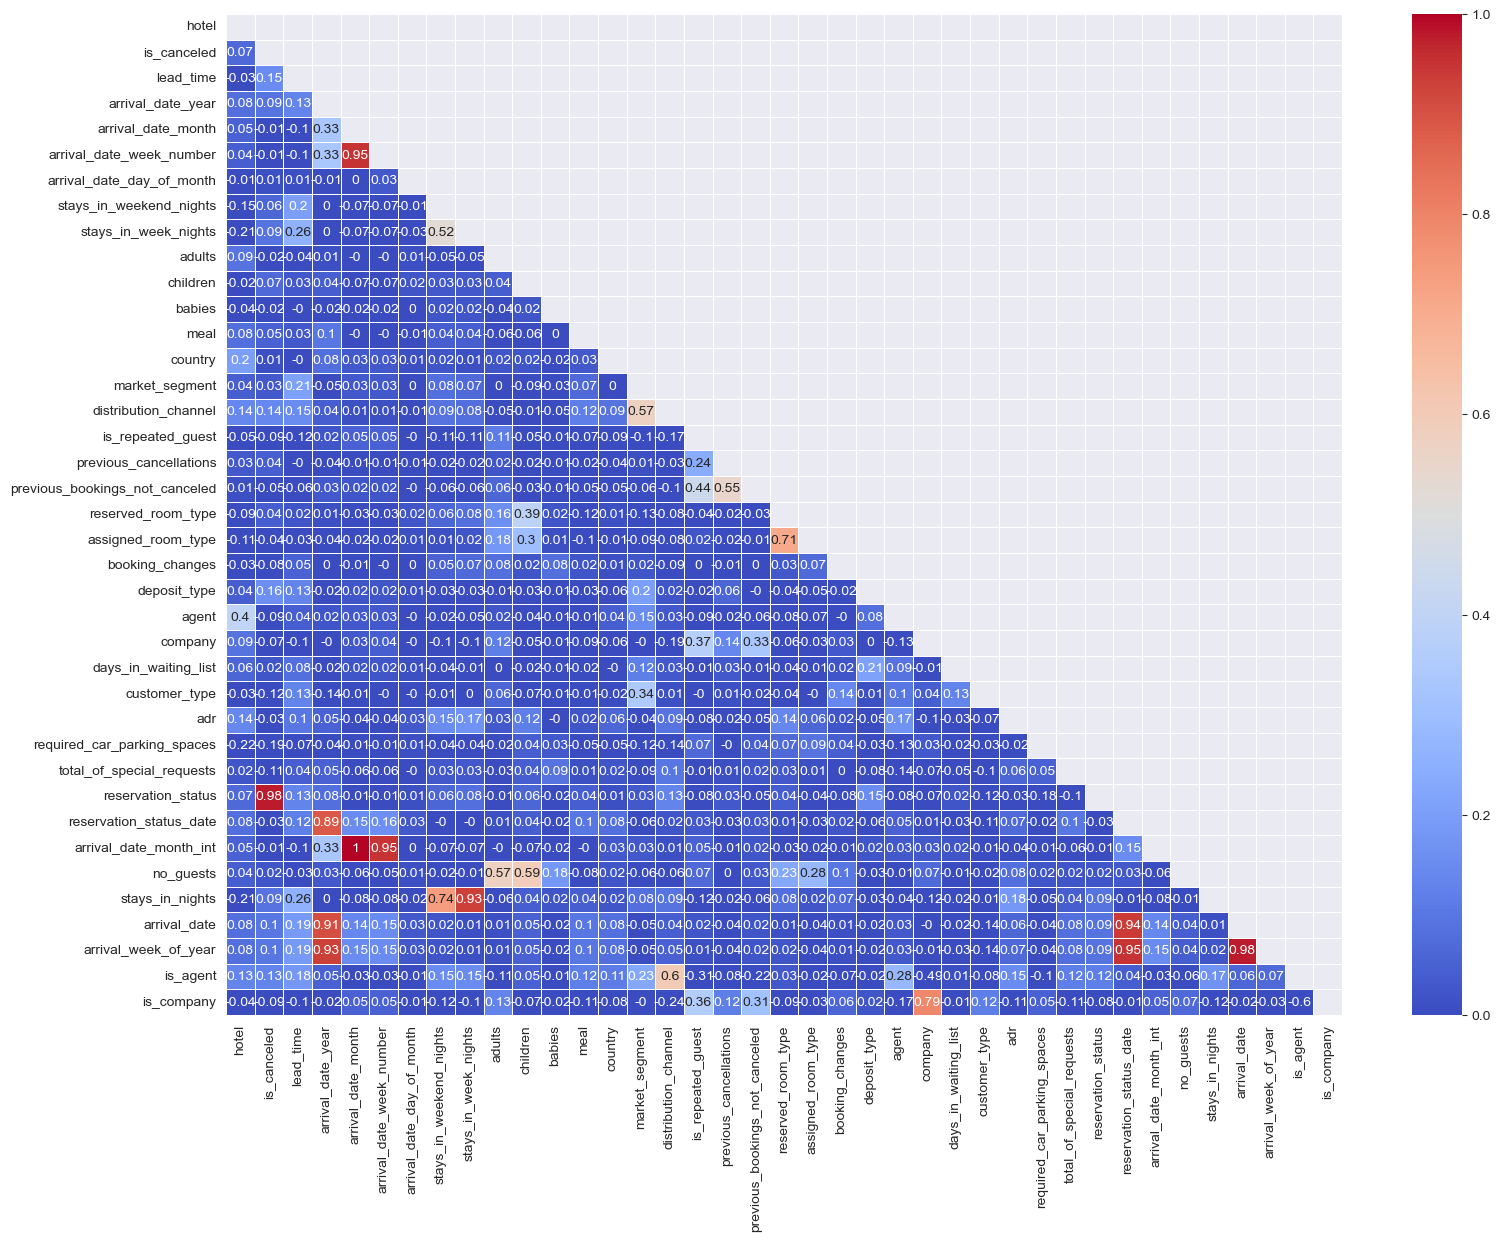

In [77]:
corr = hotel_clean_df_copy.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson').round(decimals=2)

# Erstelle eine Matrix mit False Werten
mask = np.zeros_like(corr, dtype=bool)

# Gibt die Indizes wieder für das "upper-triangle" des Arrays und setzt diese Werte auf "True"
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 13))
ax = sns.heatmap(data = corr,
                annot = True,
                vmin=0, vmax=1,
                linewidths = .5,
                cmap = 'coolwarm',
                # Masked alle Werte des oberen "upper Triangles" in der Darstellung
                mask = mask)

In [78]:
is_canceled_corr = corr['is_canceled']

sorted_corr = is_canceled_corr.sort_values(ascending=False)

# Zeigen Sie die sortierten Korrelationswerte an
print('Korrelationswerte absteigend sortiert für is_canceled:\n')
print(sorted_corr)

Korrelationswerte absteigend sortiert für is_canceled:

is_canceled                       1.00
reservation_status                0.98
deposit_type                      0.16
lead_time                         0.15
distribution_channel              0.14
is_agent                          0.13
arrival_week_of_year              0.10
arrival_date                      0.10
arrival_date_year                 0.09
stays_in_week_nights              0.09
stays_in_nights                   0.09
hotel                             0.07
children                          0.07
stays_in_weekend_nights           0.06
meal                              0.05
previous_cancellations            0.04
reserved_room_type                0.04
market_segment                    0.03
days_in_waiting_list              0.02
no_guests                         0.02
country                           0.01
arrival_date_day_of_month         0.01
arrival_date_month               -0.01
arrival_date_week_number         -0.01
arrival_

Es zeigt sich, dass nach der Bereinigung die Reihenfolge und Ausprägung der Korrelationen noch geändert haben.
Es wird dennoch an den ursprünglichen Merkmalen festgehalten, eine andere Auswahl kann später für Optimierungen genutzt werden.

---
### 3.9 Encoding von (notwendigen) kategorialen Spalten <a name="Cleaning9"></a>
Folgende kategoriale Spalten können im Modell Anwendung finden und müssen daher encodiert werden. Da es keine natürliche Ordnung gibt, wird one-hot encoding verwendet.
- `deposit_type`
- `market_segment`
- `hotel`

In [79]:
# Alle Werte von string-Variablen werden in Kleinbuchstaben umgewandelt
hotel_clean_df_copy = hotel_clean_df_copy.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
# Check ob alle Werte in Kleinbuchstaben sind
hotel_clean_df_copy.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  resort hotel            0        342               2015               july   
2  resort hotel            0          7               2015               july   
3  resort hotel            0         13               2015               july   
5  resort hotel            0         14               2015               july   
6  resort hotel            0          0               2015               july   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
2                        27                          1   
3                        27                          1   
5                        27                          1   
6                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
5                        0                     2       2  ...   
6                        0                     2       2  ...   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           check-out              2015-07-01   
2                          0           check-out              2015-07-02   
3                          0           check-out              2015-07-02   
5                          1           check-out              2015-07-03   
6                          0           check-out              2015-07-03   

  arrival_date_month_int no_guests stays_in_nights  arrival_date  \
0                      7       2.0               0    2015-07-01   
2                      7       1.0               1    2015-07-01   
3                      7       1.0               1    2015-07-01   
5                      7       2.0               2    2015-07-01   
6                      7       2.0               2    2015-07-01   

   arrival_week_of_year  is_agent is_company  
0                201527         0          0  
2                201527         0          0  
3                201527         1          0  
5                201527         1          0  
6                201527         0          0  

[5 rows x 39 columns]

In [80]:
# Wandelt relevante Spalten via one-hot encoding in neue Spalten um
hotel_clean_df_copy = pd.get_dummies(hotel_clean_df_copy, columns=['deposit_type'], prefix='dt', drop_first=True)
hotel_clean_df_copy = pd.get_dummies(hotel_clean_df_copy, columns=['hotel'], prefix='is', drop_first=True)
hotel_clean_df_copy = pd.get_dummies(hotel_clean_df_copy, columns=['market_segment'], prefix='ms', drop_first=True)

# Check ob neue Spalten vorhanden sind
hotel_clean_df_copy.head()

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0            0        342               2015               july   
2            0          7               2015               july   
3            0         13               2015               july   
5            0         14               2015               july   
6            0          0               2015               july   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
2                        27                          1   
3                        27                          1   
5                        27                          1   
6                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2         0  ...   
2                        0                     1       1         0  ...   
3                        0                     1       1         0  ...   
5                        0                     2       2         0  ...   
6                        0                     2       2         0  ...   

   dt_non refund dt_refundable is_resort hotel ms_complementary  ms_corporate  \
0              0             0               1                0             0   
2              0             0               1                0             0   
3              0             0               1                0             1   
5              0             0               1                0             0   
6              0             0               1                0             0   

   ms_direct  ms_groups ms_offline ta/to ms_online ta  ms_undefined  
0          1          0                0            0             0  
2          1          0                0            0             0  
3          0          0                0            0             0  
5          0          0                0            1             0  
6          1          0                0            0             0  

[5 rows x 46 columns]

In [81]:
# Damit keine Leerzeichen in den Spaltennamen sind, werden diese durch Unterstriche ersetzt
hotel_clean_df_copy.rename(columns={'is_resort hotel': 'is_resort_hotel'}, inplace=True)
# Check ob die Spalte umbenannt wurde
hotel_clean_df_copy.head()

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0            0        342               2015               july   
2            0          7               2015               july   
3            0         13               2015               july   
5            0         14               2015               july   
6            0          0               2015               july   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
2                        27                          1   
3                        27                          1   
5                        27                          1   
6                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2         0  ...   
2                        0                     1       1         0  ...   
3                        0                     1       1         0  ...   
5                        0                     2       2         0  ...   
6                        0                     2       2         0  ...   

   dt_non refund dt_refundable is_resort_hotel ms_complementary  ms_corporate  \
0              0             0               1                0             0   
2              0             0               1                0             0   
3              0             0               1                0             1   
5              0             0               1                0             0   
6              0             0               1                0             0   

   ms_direct  ms_groups ms_offline ta/to ms_online ta  ms_undefined  
0          1          0                0            0             0  
2          1          0                0            0             0  
3          0          0                0            0             0  
5          0          0                0            1             0  
6          1          0                0            0             0  

[5 rows x 46 columns]

---
### 3.10 Transformation von Spalten <a name="Cleaning10"></a>
Für eine Regression kann es von Vorteil sein, wenn die Variablen normalverteilt sind.

**Lead Time**

In der Datensichtung hat es den Eindruck erweckt, als sei die Variable `lead_time` rechtsschief. Bevor eine Transformation durchgeführt wird, wird die Verteilung nochmals geprüft. Um zu prüfen ob für eine Log-Transformation eine leichte Anpassung der Lead Time nötig ist, wird ermittelt ob es auch nach den ersten Bereinigungsschritten noch Werte mit lead_time = 0 gibt.

In [82]:
lead_time_0 = hotel_clean_df_copy['lead_time'] == 0
print('Anzahl der Zeilen, bei denen die Lead Time = 0 ist:',lead_time_0.shape[0])

Anzahl der Zeilen, bei denen die Lead Time = 0 ist: 87366


Da wenig überraschend auch hier die Ausprägung 0 dominiert, muss für die Log-Transformation mit einer Pseudokonstante gearbeitet werden. Damit sichergestellt wird, dass bei der Berechnung der Wert nicht 0 oder negativ wird, wird als Pseudokonstante der Wert 1 gewählt. Dies hat keinen Einfluss auf die ursprüngliche Verteilung und es wird davon ausgegangen, dass 1 (in der Original Skala = 1 Tag) klein genug ist, um die Daten nicht signifikant zu verändern.

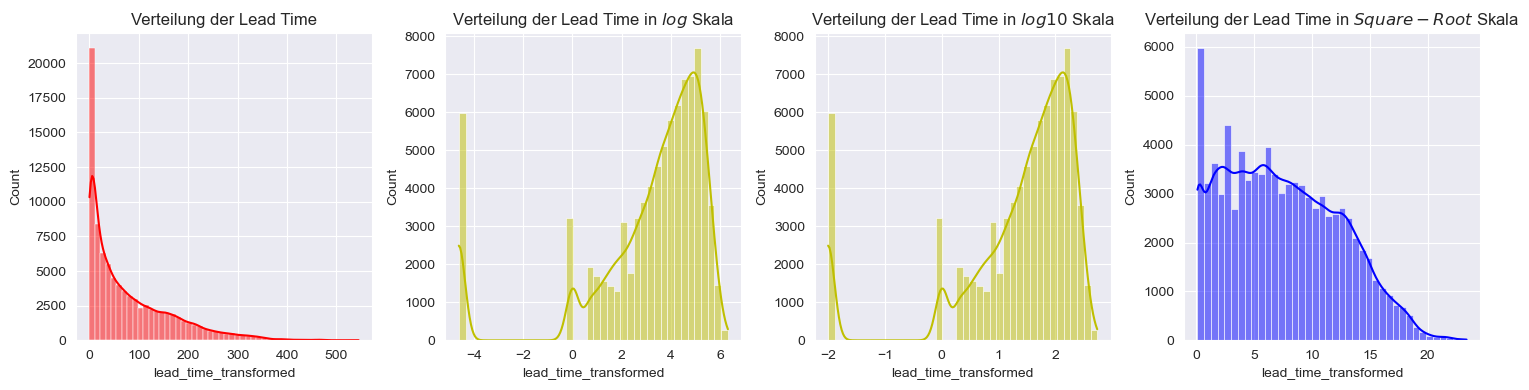

In [83]:
# Da es sich bei lead_time um die Einheit Tage handelt, wird hier ein sehr kleiner Wert nahe 0 gewählt
pseudokonstante = 0.01 
hotel_clean_df_copy['lead_time_transformed'] = (hotel_clean_df_copy['lead_time'] + pseudokonstante)

f = plt.figure(figsize=(15, 4))

ax1 = f.add_subplot(141)  # Erstes Subplot
sns.histplot(hotel_clean_df_copy['lead_time_transformed'], bins=50, color='r', ax=ax1, kde=True)
ax1.set_title('Verteilung der Lead Time')

ax2 = f.add_subplot(142)  # Zweites Subplot
sns.histplot(np.log(hotel_clean_df_copy['lead_time_transformed']), bins=40, color='y', ax=ax2, kde=True)
ax2.set_title('Verteilung der Lead Time in $log$ Skala')

ax3 = f.add_subplot(143)  # Dritter Subplot
sns.histplot(np.log10(hotel_clean_df_copy['lead_time_transformed']), bins=40, color='y', ax=ax3, kde=True)
ax3.set_title('Verteilung der Lead Time in $log10$ Skala')


ax4 = f.add_subplot(144)  # Vierter Subplot
sns.histplot(np.sqrt(hotel_clean_df_copy['lead_time_transformed']), bins=40, color='b', ax=ax4, kde=True)
ax4.set_title('Verteilung der Lead Time in $Square-Root$ Skala')

plt.tight_layout()

Eine Transformation mit dem natürlichen Logarithmus erscheint eine verbesserte Verteilung zu geben. Daher wird diese angewendet:

C:\Users\carol\anaconda3\envs\pda_23\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Boxplot der Log-transformierten Lead Time')

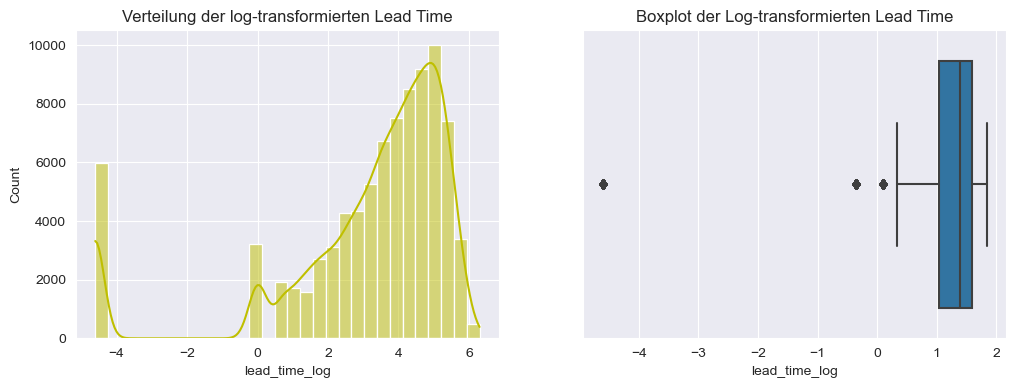

In [84]:
hotel_clean_df_copy['lead_time_log'] = np.log(hotel_clean_df_copy['lead_time_transformed'])

f = plt.figure(figsize=(12,4))

ax1 = f.add_subplot(121)
sns.histplot(hotel_clean_df_copy['lead_time_log'], bins=30, color='y', kde=True)
ax1.set_title('Verteilung der log-transformierten Lead Time')

ax2 = f.add_subplot(122)  # Zweites Subplot
sns.boxplot(x=np.log(hotel_clean_df_copy['lead_time_log']))
ax2.set_title('Boxplot der Log-transformierten Lead Time')

Wie bereits angesprochen, gibt es nach wie vor Ausreißer, aber diese verbleiben (erst einmal) im Datensatz.

**ADR**

ADR ist nicht mehr Teil der Analyse. Falls die Variable dennoch für weitere Untersuchungen herangezogen werden soll, wird hier die Anpassung vorgenommen.
In der Datensichtung hat es den Eindruck erweckt, als sei die Variable `adr` nicht normalverteilt. Bevor eine Transformation durchgeführt wird, wird die Verteilung von `adr` nochmals geprüft.

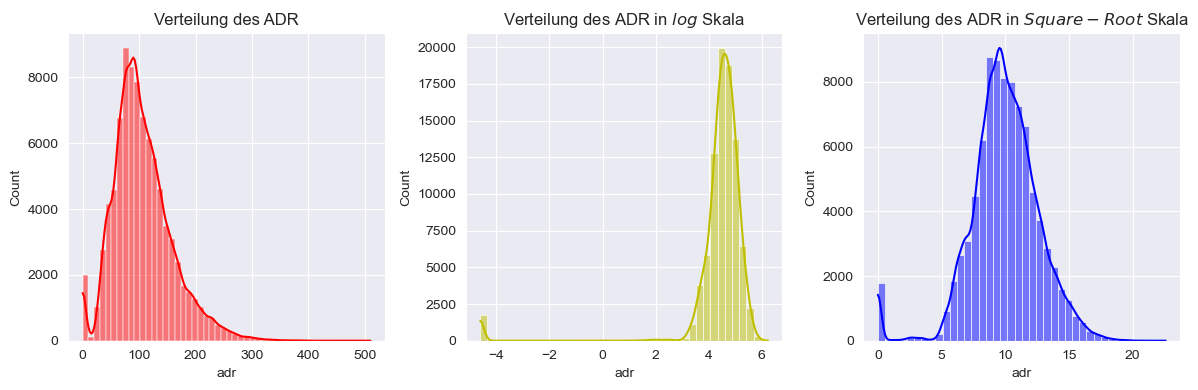

In [85]:
f = plt.figure(figsize=(12, 4))

ax1 = f.add_subplot(131)  # Erstes Subplot
sns.histplot(hotel_clean_df_copy['adr'], bins=50, color='r', ax=ax1, kde=True)
ax1.set_title('Verteilung des ADR')

ax2 = f.add_subplot(132)  # Zeweites Subplot
sns.histplot(np.log(hotel_clean_df_copy['adr']+0.01), bins=40, color='y', ax=ax2, kde=True) # + Pseudokonsonante, da ADR auch 0 enthält
ax2.set_title('Verteilung des ADR in $log$ Skala')

ax3 = f.add_subplot(133)  # Drittes Subplot
sns.histplot(np.sqrt(hotel_clean_df_copy['adr']), bins=40, color='b', ax=ax3, kde=True)
ax3.set_title('Verteilung des ADR in $Square-Root$ Skala')

plt.tight_layout()

Nach Bereinigung/Milderung der Ausreißer ähnelt die Verteilung von `adr` bereits etwas einer Normalverteilung und eine Square-Root-Transformation könnte die Verteilung noch etwas verbessern.

In [86]:
hotel_clean_df_copy['adr_sqr'] = np.sqrt(hotel_clean_df_copy['adr'])

Text(0.5, 1.0, 'Verteilung des ADR in $Square-Root$ Skala')

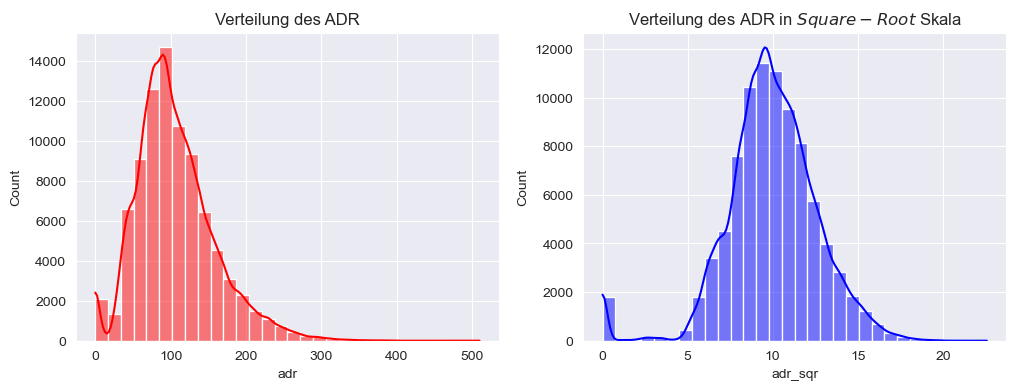

In [87]:
f = plt.figure(figsize=(12, 4))

ax1=f.add_subplot(121)
sns.histplot(hotel_clean_df_copy['adr'],bins=30,color='r',ax=ax1, kde=True)
ax1.set_title('Verteilung des ADR')

ax2=f.add_subplot(122)
sns.histplot(hotel_clean_df_copy['adr_sqr'],bins=30,color='b',ax=ax2, kde=True)
ax2.set_title('Verteilung des ADR in $Square-Root$ Skala')

**Anzahl Gäste**

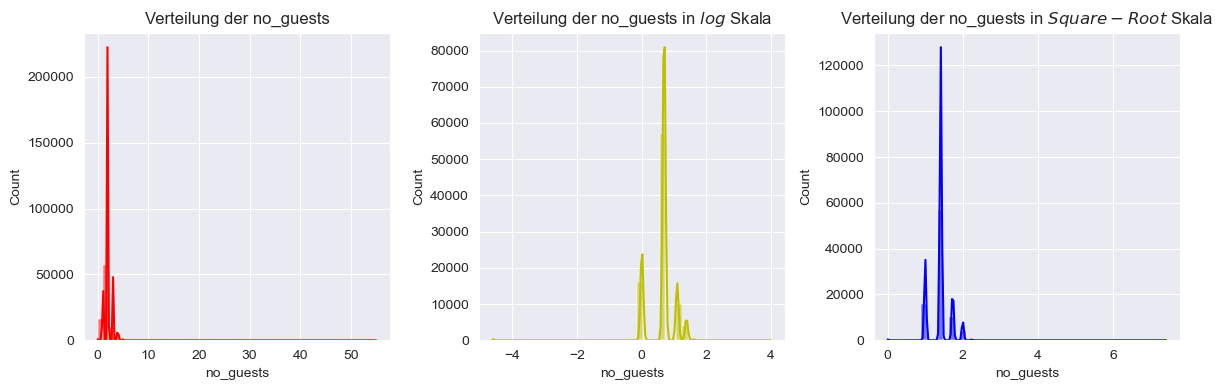

In [88]:
# Check der Verteilung von no_guests
f = plt.figure(figsize=(12, 4))

ax1 = f.add_subplot(131)  # Erstes Subplot
sns.histplot(hotel_clean_df_copy['no_guests'], bins=50, color='r', ax=ax1, kde=True)
ax1.set_title('Verteilung der no_guests')

ax2 = f.add_subplot(132)  # Zweites Subplot
sns.histplot(np.log(hotel_clean_df_copy['no_guests']+ 0.01), bins=50, color='y', ax=ax2, kde=True) # log-Transformation mit Pseudokonsonate
ax2.set_title('Verteilung der no_guests in $log$ Skala')

ax3 = f.add_subplot(133)  # Drittes Subplot
sns.histplot(np.sqrt(hotel_clean_df_copy['no_guests']), bins=50, color='b', ax=ax3, kde=True)
ax3.set_title('Verteilung der no_guests in $Square-Root$ Skala')

plt.tight_layout()

Es wird erst einmal keine weitere Transformation vorgenommen. Es könnte bei der Optimierung noch mit einer Square-Root Transformation die Verteilung verbessert werden.

**Aufenthaltsdauer**

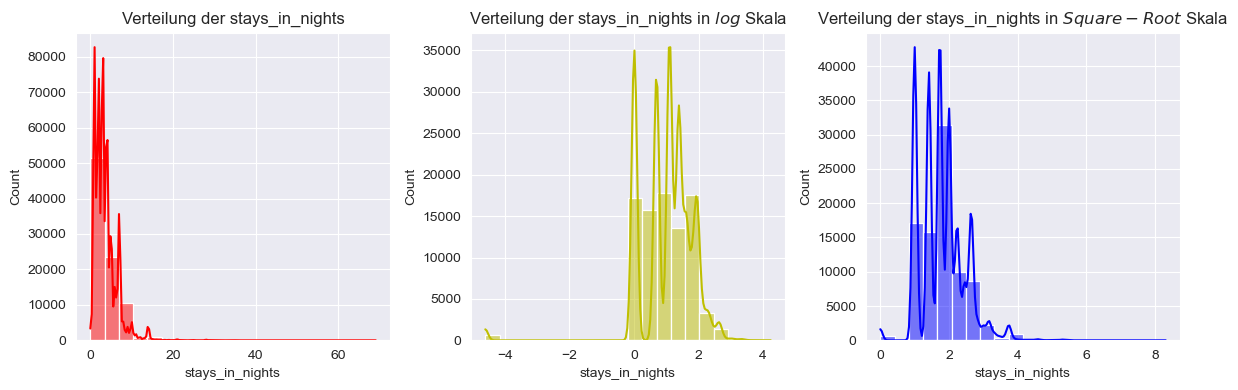

In [89]:
# Check der Verteilung von stays_in_night
f = plt.figure(figsize=(12, 4))

ax1 = f.add_subplot(131)  # Erstes Subplot
sns.histplot(hotel_clean_df_copy['stays_in_nights'], bins=20, color='r', ax=ax1, kde=True)
ax1.set_title('Verteilung der stays_in_nights')

ax2 = f.add_subplot(132)  # Zweites Subplot
sns.histplot(np.log(hotel_clean_df_copy['stays_in_nights'] + 0.01), bins=20, color='y', ax=ax2, kde=True) # Log-Transformation mit Pseudokonsonante
ax2.set_title('Verteilung der stays_in_nights in $log$ Skala')

ax3 = f.add_subplot(133)  # Drittes Subplot
sns.histplot(np.sqrt(hotel_clean_df_copy['stays_in_nights']), bins=20, color='b', ax=ax3, kde=True)
ax3.set_title('Verteilung der stays_in_nights in $Square-Root$ Skala')

plt.tight_layout()

Mit den hier gezeigten Transformationen verbessert sich die Verteilung zwar leicht, da die Variabel aktuell jedoch keine Anwendung findet, findet keine Transformation statt.

---
### 3.11 Löschung nicht benötigter Spalten <a name="Cleaning11"></a>
Durch die neu definierten Spalten, sowie durch die vorherige Datenbetrachtung sind für die weitere Datenverarbeitung viele Spalten nicht mehr relevant. 
Diese werden nun entfernt.

In [90]:
# Entferne die überflüssigen Spalten
columns_to_drop = [    
    'arrival_date_year'
    , 'arrival_date_month'
    , 'arrival_date_week_number'
    , 'arrival_date_day_of_month'
    , 'stays_in_weekend_nights'
    , 'stays_in_week_nights'
    , 'adults'
    , 'children'
    , 'babies'
    , 'meal'
    , 'country'
    , 'customer_type'
    , 'is_agent'
    , 'distribution_channel'
    , 'arrival_week_of_year'
    , 'is_repeated_guest'
    , 'previous_cancellations'
    , 'previous_bookings_not_canceled'
    , 'reserved_room_type'
    , 'assigned_room_type'
    , 'booking_changes'
    , 'agent'
    , 'company'
    , 'days_in_waiting_list'
    , 'reservation_status'
    , 'reservation_status_date'
    , 'arrival_date_month_int'
    , 'stays_in_nights'
    , 'is_company'
    , 'adr_sqr'
    , 'lead_time_transformed'
    , 'lead_time'
]
hotel_clean_df_copy.drop(columns=columns_to_drop, inplace=True)

In [91]:
hotel_clean_df_copy.head()

is_canceled    adr  required_car_parking_spaces  total_of_special_requests  \
0            0    0.0                            0                          0   
2            0   75.0                            0                          0   
3            0   75.0                            0                          0   
5            0   98.0                            0                          1   
6            0  107.0                            0                          0   

   no_guests arrival_date  dt_non refund  dt_refundable  is_resort_hotel  \
0        2.0   2015-07-01              0              0                1   
2        1.0   2015-07-01              0              0                1   
3        1.0   2015-07-01              0              0                1   
5        2.0   2015-07-01              0              0                1   
6        2.0   2015-07-01              0              0                1   

   ms_complementary  ms_corporate  ms_direct  ms_groups  ms_offline ta/to  \
0                 0             0          1          0                 0   
2                 0             0          1          0                 0   
3                 0             1          0          0                 0   
5                 0             0          0          0                 0   
6                 0             0          1          0                 0   

   ms_online ta  ms_undefined  lead_time_log  
0             0             0       5.834840  
2             0             0       1.947338  
3             0             0       2.565718  
5             1             0       2.639771  
6             0             0      -4.605170

Folgende Spalten könnten individuell ausgeschlossen werden
- `arrival_date`
- `adr`

---
### 3.12 Speicherung der Datenbereinigung und Anmerkungen <a name="Cleaning12"></a>
Zwar wird bei der Modellierung auch eine Logistic Regression gemacht, bei der unter manchen Bedingungen eine Skalierung der Merkmale einen Einfluss haben kann, jedoch ist dieser Einfluss nicht sonderlich hoch. Da für die weiteren gewählten Klassifikationsalgorithmen eine Merkmalsskalierung nicht notwendig ist, wird darauf verzichtet.

Um die Datenbereinigung zu sichern, wird diese in eine CSV exportiert. So müssen nicht bei jeder Veränderung alle Bereinigungsschritte nochmals durchgeführt werden, sondern es wird die fertige Datei für die Analyse nochmals geladen.

In [92]:
hotel_clean_df_copy.to_csv('src/hotel_clean.csv', index=False)

---
## 4 Modelling <a name="Modelling"></a>
Für das Modell laden wir die bereinigten Daten und entfernen die Spalten, die für die Klassifizierung von Buchungen in "storniert" und "nicht storniert" nicht notwendig sind.

In [93]:
model_df = pd.read_csv('src/hotel_clean.csv')

In [94]:
# Für das aktuelle Modell zur Vorhersage von is_canceled sind nicht alle Spalten relevant
columns_to_drop = [
    'adr'
    , 'arrival_date'
]
model_df.drop(columns=columns_to_drop, inplace=True)

In [95]:
# Definiere unabhängige und abhängige Variablen
X = model_df.drop('is_canceled', axis=1)
y = model_df['is_canceled']

# Splitte das Dataset in Trainings- und Testdaten, wobei 30% der Daten Testdaten sein sollen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Prüfe ob X und y die gleiche Anzahl an Zeilen und y zudem nur eine Spalte hat
X.shape, y.shape, X_test.shape, y_test.shape

((87366, 14), (87366,), (26210, 14), (26210,))

---
### 4.1 Model Building <a name="Modelling1"></a>
In diesem Abschnitt werden die verschiedenen Modelle aufgebaut, in 4.2 optimiert und in 4.3 die Ergebnisse miteinander verglichen.

#### Logistische Regression

Average cross validation score: 0.779
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     19087
           1       0.67      0.39      0.49      7123

    accuracy                           0.78     26210
   macro avg       0.74      0.66      0.68     26210
weighted avg       0.77      0.78      0.76     26210



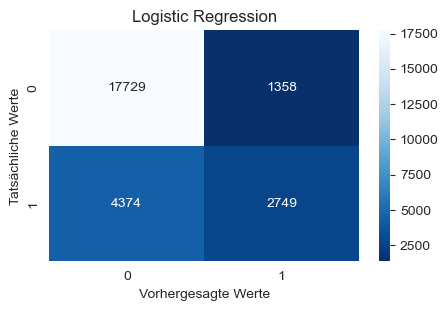

In [96]:
model = 'Logistic Regression'

# Initialisieren des Modells
lr = LogisticRegression(solver='liblinear', random_state=42) # Initial starten wir mit dem solver 'liblinear', da dieser für kleine Datensätze geeignet ist

# Training des Modells
lr.fit(X_train, y_train)

# Cross Validation
scores = cross_val_score(lr, X_train, y_train, cv=5)

# Prediction auf Basis der Testdaten
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_lr = confusion_matrix(y_test, y_pred_lr)
clf_report_lr = classification_report(y_test, y_pred_lr)

print("Average cross validation score: {:.3f}".format(scores.mean()))
# print('Recall score:', rec_lr)
# print("F1 score: {:.3f}".format(f1_score(y_test, y_pred_lr)))
print('Classification Report: \n', clf_report_lr)

utils.plot_conf(conf_lr,'Logistic Regression')

In [97]:
odds = np.exp(lr.coef_[0]) # Transformiert die Koeffizienten wieder
pd.DataFrame(odds, X_train.columns,columns=['coef']).sort_values(by='coef', ascending=False)

coef
dt_non refund                59.440258
ms_undefined                  3.785158
lead_time_log                 1.352424
ms_online ta                  1.332843
no_guests                     1.194536
is_resort_hotel               1.141679
dt_refundable                 1.027838
ms_complementary              0.813596
ms_direct                     0.533715
total_of_special_requests     0.505200
ms_corporate                  0.414237
ms_groups                     0.251267
ms_offline ta/to              0.215653
required_car_parking_spaces   0.002846

----
#### Random Forest

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     19087
           1       0.57      0.46      0.51      7123

    accuracy                           0.76     26210
   macro avg       0.69      0.67      0.68     26210
weighted avg       0.75      0.76      0.75     26210



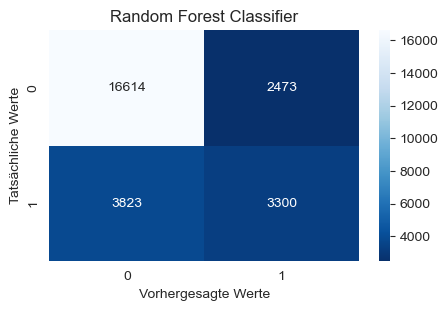

In [98]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_rf = confusion_matrix(y_test, y_pred_rf)
clf_report_rf = classification_report(y_test, y_pred_rf)

print('Classification Report: \n', clf_report_rf)

utils.plot_conf(conf_rf,'Random Forest Classifier')

In [99]:
def plot_feature_importances(model, headline):
    '''
    Function to plot the feature importances of a model
    :param model: classification model
    :param headline: part of the title
    :return: plot
    '''
    headline = headline
    n_features = X_train.shape[1]
    feature_importances = model.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::1]  # Sortiere die Indizes der Größe nach absteigend
    sorted_feature_importances = feature_importances[sorted_indices]
    sorted_feature_names = X_train.columns.values[sorted_indices]

    plt.figure(figsize=(8, 6))
    plt.barh(range(n_features), sorted_feature_importances, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Feature importances: ' + str(headline))
    plt.show()

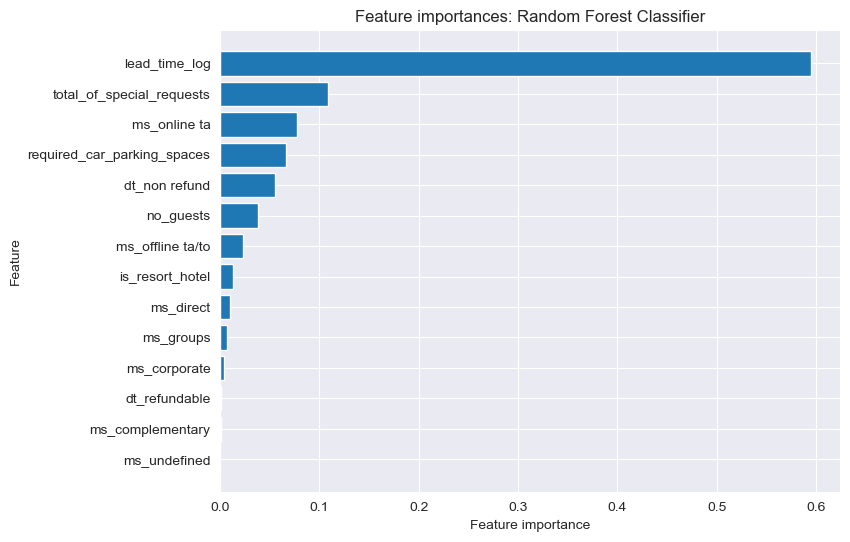

In [100]:
plot_feature_importances(rf, 'Random Forest Classifier')
#plot_feature_importances(rf, 'Random Forest Classifier')

---
#### Gradient Booster Classifier

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.86     19087
           1       0.66      0.44      0.53      7123

    accuracy                           0.79     26210
   macro avg       0.74      0.68      0.70     26210
weighted avg       0.77      0.79      0.77     26210



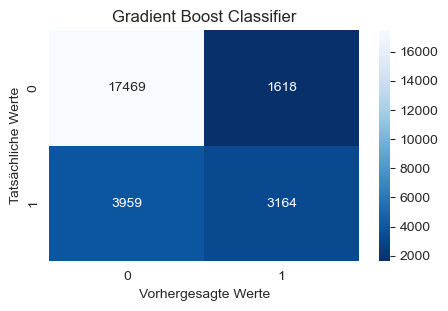

In [101]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
rec_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
conf_gb = confusion_matrix(y_test, y_pred_gb)
clf_report_gb = classification_report(y_test, y_pred_gb)

print('Classification Report: \n', clf_report_gb)

utils.plot_conf(conf_gb,'Gradient Boost Classifier')

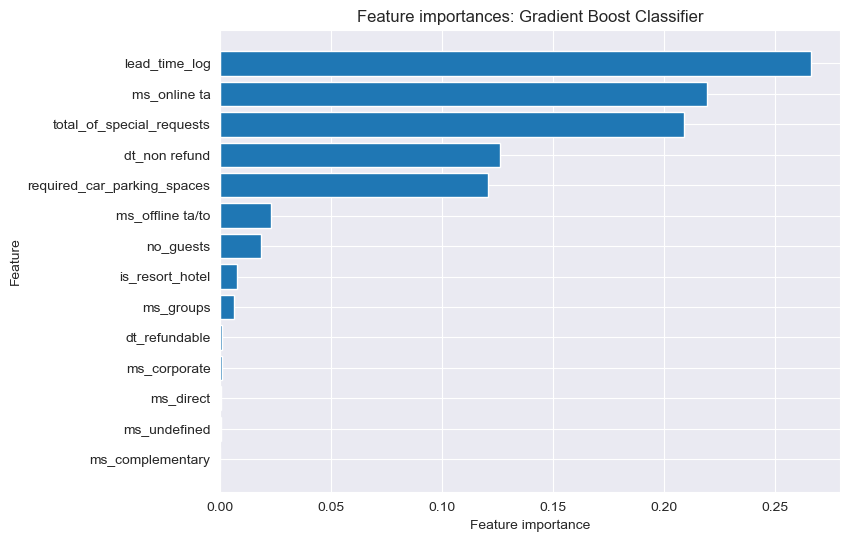

In [102]:
# Calculate feature importances
plot_feature_importances(gb, 'Gradient Boost Classifier')
#plot_feature_importances(gb, 'Gradient Boost Classifier')

---

---
### 4.2 Optimierung der drei Modelle <a name="Modelling2"></a>
Um die Modelle zu optimieren, werden die Hyperparameter der Modelle bestimmt. Dafür wird ein RandomizedSearchCV verwendet, der durch die zufällige kombination der angegebenen Parameter die besten Parameter für das jeweilige Modell findet. Ich habe mich für den RandomizedSearchCV entschieden, da dieser schneller ist als der GridSearchCV und dennoch akzeptable Ergebnisse liefert.
Der RandomizedSearchCV wird für jedes Modell einzeln durchgeführt. Die besten Parameter werden dann in das jeweilige Modell übernommen.

Es sei zu erwähnen, dass anhand der Ergebnisse der Feature Importance Grafiken und den Odds der Logistic Regression ersichtlich ist, dass nicht alle Features für die Vorhersage in dem jeweiligen Modell relevant sind. Daher wäre es in einem weiteren Optimierungsschritt möglich, die Modelle mit weniger (jeweils passenden) Features zu trainieren.

In [103]:
def optimize_model(estimator, param_distributions, train, test):
    # Initalisiere den RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=5)

    # Trainiere das Modell
    random_search.fit(train, y_train) # Fit the random search model

    # Gebe die besten Parameter und den höchsten Score aus
    print("Empfohlene Hyperparameter:", random_search.best_params_)
    print("Best score: {:.3f}".format(random_search.best_score_))
    test_score = random_search.score(test, y_test)
    print("Test score: {:.3f}".format(test_score))

    return test_score

#### Logistic Regression - Optimierung

In [104]:
param_distributions_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 5000]
}

test_score_lr = optimize_model(LogisticRegression(random_state=42), param_distributions_lr, X_train, X_test)

C:\Users\carol\anaconda3\envs\pda_23\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carol\anaconda3\envs\pda_23\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carol\anaconda3\envs\pda_23\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carol\anaconda3\envs\pda_23\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carol\anaconda3\envs\pda_23\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carol\anaconda3\envs\pda_23\lib\site-pack

Empfohlene Hyperparameter: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'C': 1.0}
Best score: 0.779
Test score: 0.781


Classification Report Logistic Regression Classifier - optimiert: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     19087
           1       0.67      0.38      0.49      7123

    accuracy                           0.78     26210
   macro avg       0.74      0.66      0.67     26210
weighted avg       0.77      0.78      0.76     26210



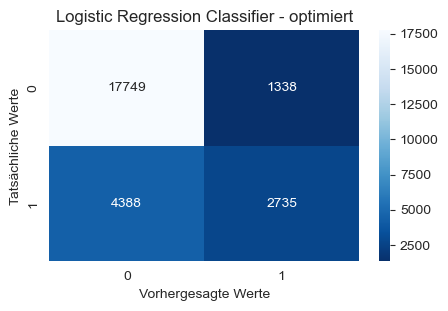

In [105]:
# Führe die Logistic Regression mit den ermittelten besten Parametern aus, diese wurden von dem RandomizedSearchCV ermittelt
# Aufgrund der Methode ändern sich die Parameter bei jedem Durchlauf
# Für eine Optimierung sollte dies dynamisiert werden oder ein anderer Ansatz gewählt werden
lr_opt = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=1000, random_state=42)
lr_opt.fit(X_train, y_train)

y_pred_lr_opt = lr_opt.predict(X_test)

acc_lr_opt = accuracy_score(y_test, y_pred_lr_opt)
rec_lr_opt = recall_score(y_test, y_pred_lr_opt)
f1_lr_opt = f1_score(y_test, y_pred_lr_opt)
conf_lr_opt = confusion_matrix(y_test, y_pred_lr_opt)
clf_report_lr_opt = classification_report(y_test, y_pred_lr_opt)

print('Classification Report Logistic Regression Classifier - optimiert: \n', clf_report_lr_opt)

utils.plot_conf(conf_lr_opt,'Logistic Regression Classifier - optimiert')

---
#### Random Forest - Optimierung

In [106]:
# Anlage eines Dictionaries mit den Parametern für die RandomizedSearchCV
param_distributions_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aufruf der Funktion optimize_model mit dem Random Forest Classifier
test_score_rf = optimize_model(RandomForestClassifier(random_state=42), param_distributions_rf, X_train, X_test)

Empfohlene Hyperparameter: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best score: 0.782
Test score: 0.787


Classification Report Random Forest - optimiert: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     19087
           1       0.67      0.44      0.53      7123

    accuracy                           0.79     26210
   macro avg       0.74      0.68      0.70     26210
weighted avg       0.77      0.79      0.77     26210



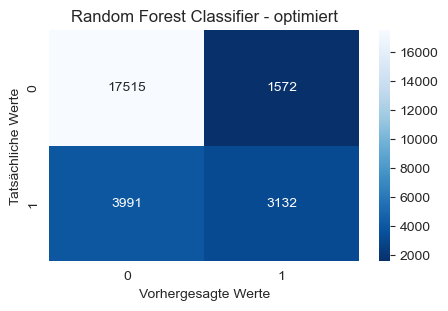

In [107]:
# Führe den Random Forest Classifier mit den ermittelten besten Parametern aus (hier statisch, da sich die Parameter bei jedem Durchlauf ändern können)
rf_opt = RandomForestClassifier(n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10, random_state=42)
rf_opt.fit(X_train, y_train)

y_pred_rf_opt = rf_opt.predict(X_test)

acc_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
rec_rf_opt = recall_score(y_test, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_pred_rf_opt)
conf_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)
clf_report_rf_opt = classification_report(y_test, y_pred_rf_opt)

print('Classification Report Random Forest - optimiert: \n', clf_report_rf_opt)

utils.plot_conf(conf_rf_opt,'Random Forest Classifier - optimiert')

---
### Gradient Boosting - Optimierung

In [66]:
param_distributions_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

test_score_gb = optimize_model(GradientBoostingClassifier(random_state=42), param_distributions_gb, X_train, X_test)

Empfohlene Hyperparameter: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.2}
Best score: 0.783
Test score: 0.788


Classification Report Gradient Boosting - optimiert: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     19087
           1       0.66      0.45      0.53      7123

    accuracy                           0.79     26210
   macro avg       0.74      0.68      0.70     26210
weighted avg       0.77      0.79      0.77     26210



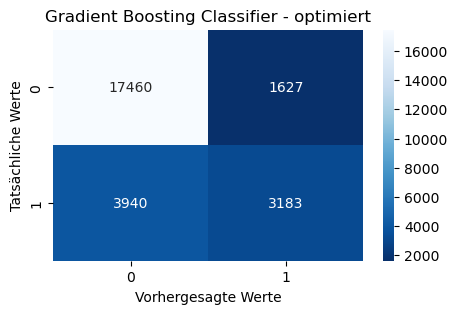

In [67]:
# Führe den Gradient Boosting Classifier mit den ermittelten besten Parametern aus (hier statisch, da sich die empfohlenen Hyperparameter unterscheiden können)
gb_opt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_split=5, min_samples_leaf=2, random_state=42)
gb_opt.fit(X_train, y_train)

y_pred_gb_opt = gb_opt.predict(X_test)

acc_gb_opt = accuracy_score(y_test, y_pred_gb_opt)
rec_gb_opt = recall_score(y_test, y_pred_gb_opt)
f1_gb_opt = f1_score(y_test, y_pred_gb_opt)
conf_gb_opt = confusion_matrix(y_test, y_pred_gb_opt)
clf_report_gb_opt = classification_report(y_test, y_pred_gb_opt)

print('Classification Report Gradient Boosting - optimiert: \n', clf_report_gb_opt)

utils.plot_conf(conf_gb_opt,'Gradient Boosting Classifier - optimiert')

---
### 4.3 Vergleich der Modelle <a name="Modelling3"></a>
Um die Vorhersagekraft der Modelle zu vergleichen, werden die berechneten Accuracy, der Recall und der F1-Score gegenübergestellt.
Da mir besonders wichtig ist, die False Negatives (also vorhergesagt 0 tatsächlich aber 1) niedrig zu halten, ziehe ich den Recall als wichtigste Metrik heran. Dieser gibt an, wie viele der tatsächlichen 1er vom Modell auch als 1er vorhergesagt wurden. Der Recall ist definiert als:
recall= True Positives / (True Positives + False Negatives)

In [68]:
models_df = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Logistic Regression - optimiert', 'Random Forest Classifier - optimiert', 'Gradient Boosting Classifier - optimiert'],
    'Accuracy' : [acc_lr, acc_rf, acc_gb, acc_lr_opt, acc_rf_opt, acc_gb_opt],
    'Recall' : [rec_lr, rec_rf, rec_gb, rec_lr_opt, rec_rf_opt, rec_gb_opt],
    'F1' : [f1_lr, f1_rf, f1_gb, f1_lr_opt, f1_rf_opt, f1_gb_opt],
})

models_df.sort_values(by = 'Accuracy', ascending = False)

Model  Accuracy    Recall        F1
4      Random Forest Classifier - optimiert  0.787753  0.439702  0.529636
5  Gradient Boosting Classifier - optimiert  0.787600  0.446862  0.533479
2              Gradient Boosting Classifier  0.787219  0.444195  0.531541
3           Logistic Regression - optimiert  0.781534  0.383967  0.488567
0                       Logistic Regression  0.781305  0.385933  0.489581
1                  Random Forest Classifier  0.759786  0.463288  0.511787

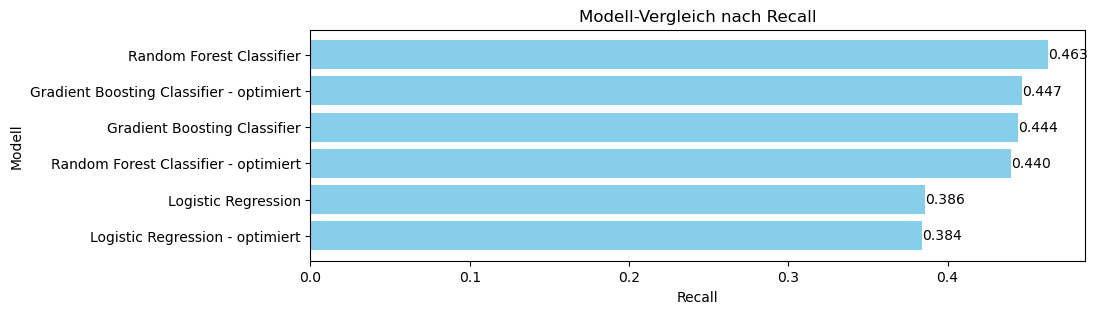

In [69]:
# Sortiere den DataFrame nach Recall absteigend
df_sorted = models_df.sort_values(by="Recall", ascending=False)

# Erstelle das Balkendiagramm
plt.figure(figsize=(10, 3))
plt.barh(df_sorted["Model"], df_sorted["Recall"], color='skyblue')
plt.xlabel('Recall')
plt.ylabel('Modell')
plt.title('Modell-Vergleich nach Recall')

# Füge die Werte an den Balken hinzu
for index, value in enumerate(df_sorted["Recall"]):
    plt.text(value, index, f'{value:.3f}', va='center')

plt.gca().invert_yaxis()

Anhand der Metriken ist zu erkennen, dass der Random Forest Classifier - optimiert die beste Accuracy hat. Wie aber anfangs erwähnt, ist dies nicht das einzige Entscheidungskriterium.
In Abwägung von Recall, F1 Score und Accuracy entscheide ich mich für den **"Gradient Boosting Classifier - optimiert"**. 
Dieser hat zwar "nur" den zweitbesten Recall Wert jedoch beträgt der Unterschied zwischen den beiden Modellen beim Recall nur 0,013 Punkte. Zudem hat dieses Modell den höchsten F1 Score.

---
## 5 Ergebnispräsentation <a name="Present"></a>

In [70]:
# Vorhersage auf den ganzen Datensatz mit dem Modell Gradient Boosting Classifier - optimiert
full_prediction = gb_opt.predict(X)

# Mache eine Kopie 
hotel_clean_df_pred = hotel_clean_df.copy()

hotel_clean_df_pred['is_canceled'] = full_prediction

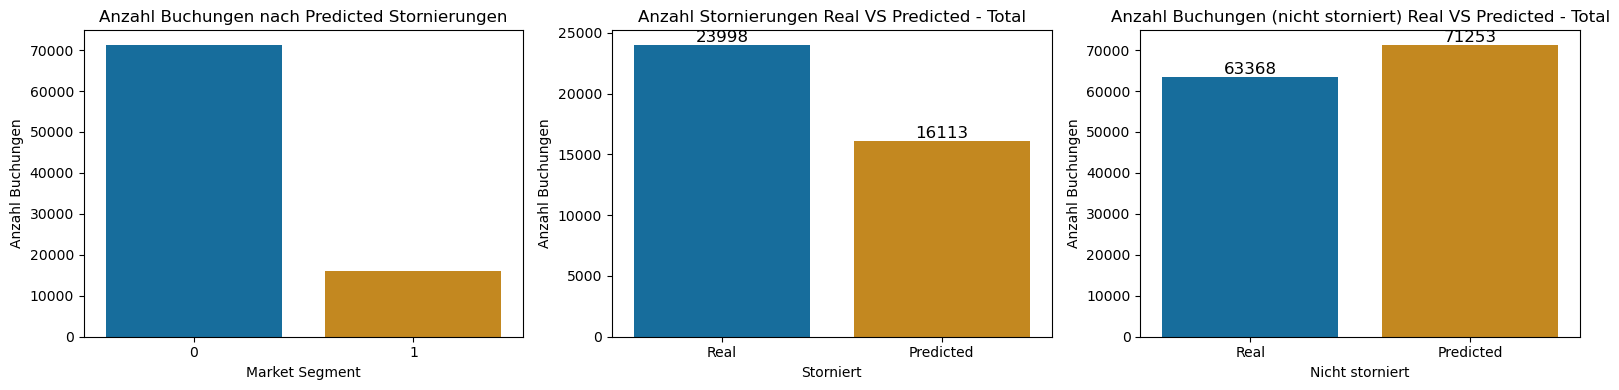

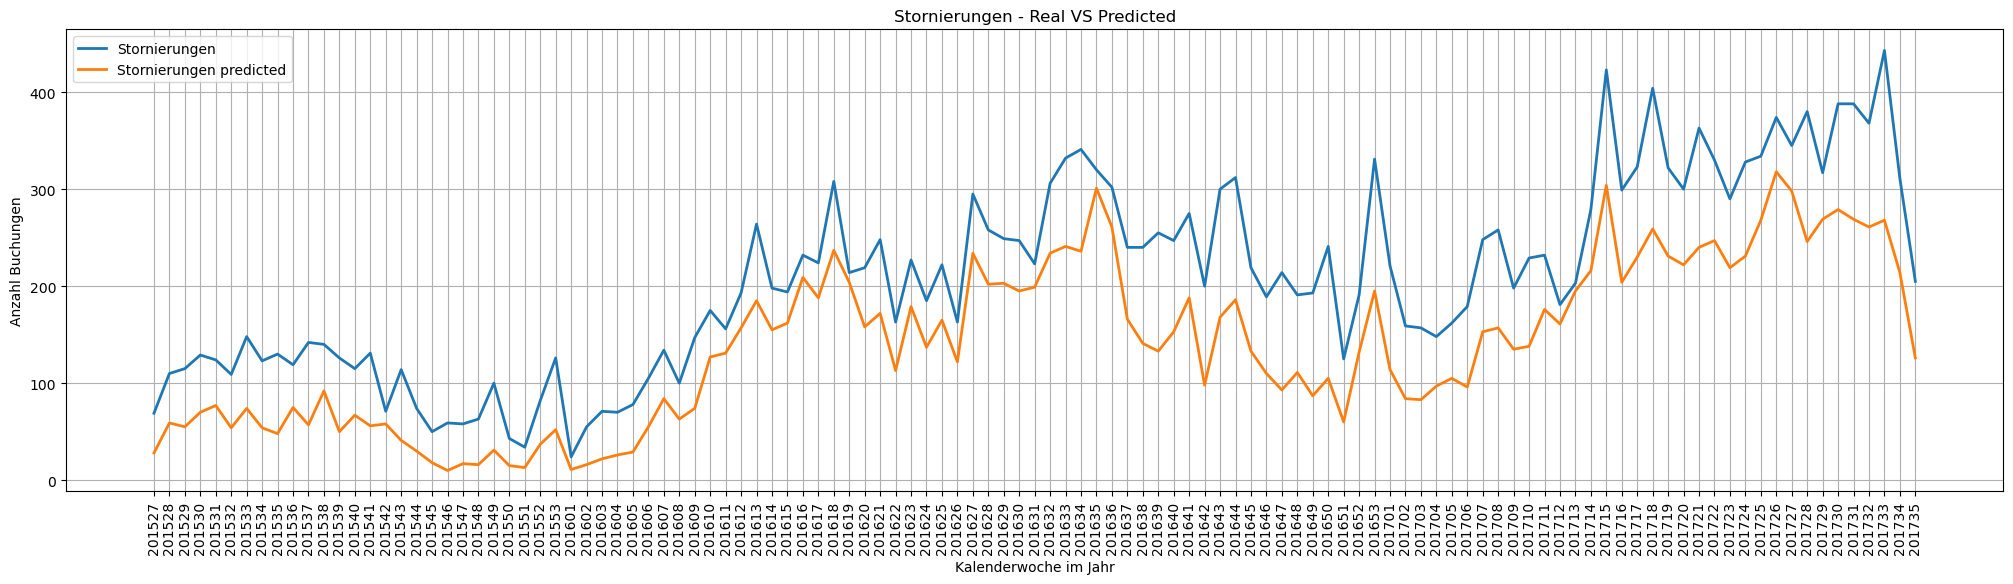

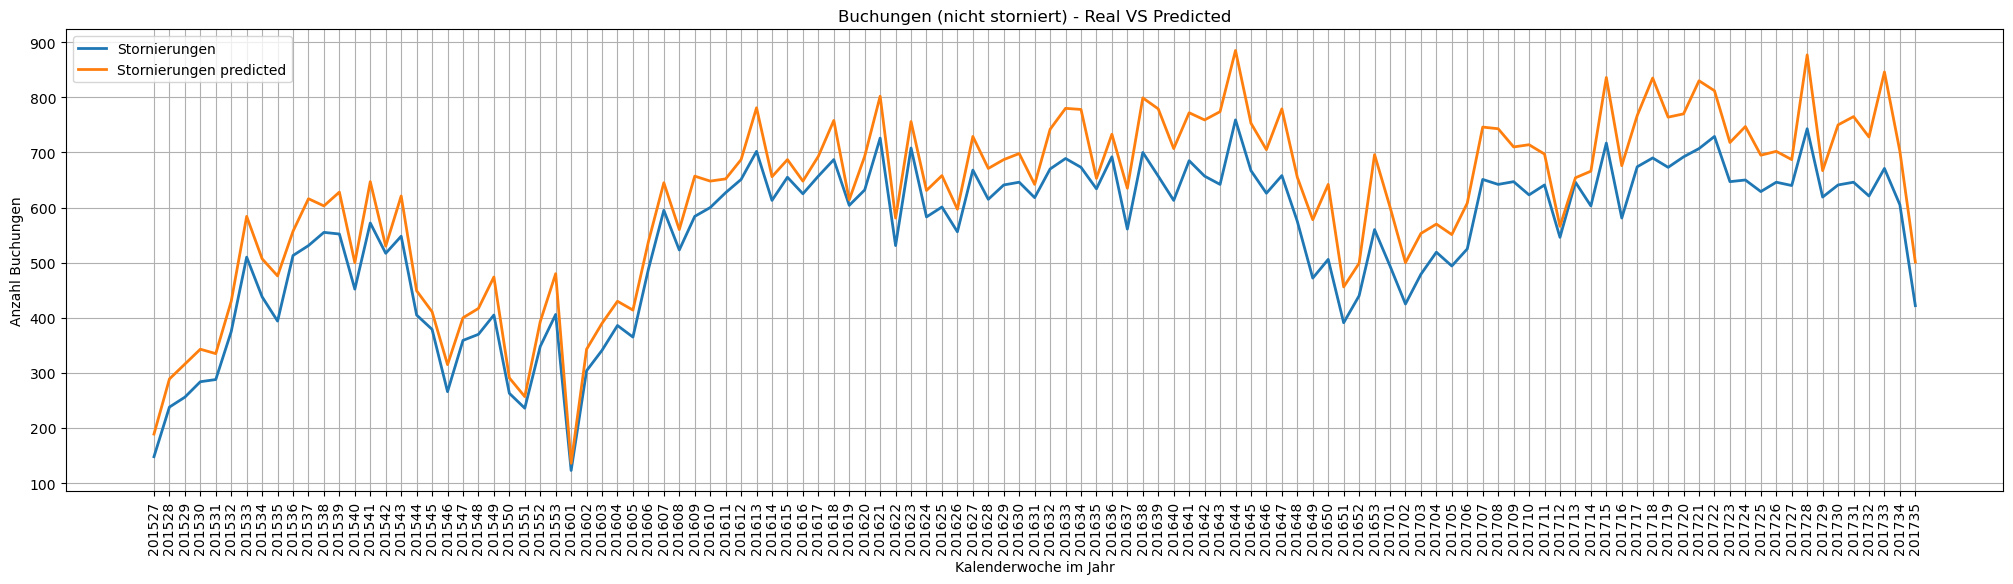

In [71]:
# Splitte den Ausgang-Datensatz und predicted Datensatz in stornierte und nicht stornierte Buchungen
canceled = hotel_clean_df[hotel_clean_df['is_canceled'] == 1]
not_canceled = hotel_clean_df[hotel_clean_df['is_canceled'] == 0]
canceled_pred = hotel_clean_df_pred[hotel_clean_df_pred['is_canceled'] == 1]
not_canceled_pred = hotel_clean_df_pred[hotel_clean_df_pred['is_canceled'] == 0]

# Daten für Barplots vorbereiten
canceled_counts = canceled['is_canceled'].count()
canceled_pred_counts = canceled_pred['is_canceled'].count()
not_canceled_counts = not_canceled['is_canceled'].count()
not_canceled_pred_counts = not_canceled_pred['is_canceled'].count()

# Erstellen der Figure und Subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Subplot 1: Anteil der vorhergesagten Stornierungen
#plt.subplot(1, 3, 1)
sns.countplot(data=hotel_clean_df_pred, x='is_canceled', palette='colorblind', ax=axes[0])
axes[0].set_xlabel('Market Segment')
axes[0].set_ylabel('Anzahl Buchungen')
axes[0].set_title('Anzahl Buchungen nach Predicted Stornierungen')
#plt.legend(title='Is Canceled', loc='upper right')

# Subplot 1: Anzahl stornierter Buchungen - Real vs. Predicted
sns.barplot(x=['Real', 'Predicted'], y=[canceled_counts, canceled_pred_counts], palette='colorblind', ax=axes[1])

# Datenbeschriftungen hinzufügen
for i, count in enumerate([canceled_counts, canceled_pred_counts]):
    axes[1].text(i, count, str(count), ha='center', va='bottom', fontsize=12)

axes[1].set_xlabel('Storniert')
axes[1].set_ylabel('Anzahl Buchungen')
axes[1].set_title('Anzahl Stornierungen Real VS Predicted - Total')

# Subplot 2: Anzahl nicht stornierter Buchungen - Real vs. Predicted
sns.barplot(x=['Real', 'Predicted'], y=[not_canceled_counts, not_canceled_pred_counts], palette='colorblind', ax=axes[2])

# Datenbeschriftungen hinzufügen
for i, count in enumerate([not_canceled_counts, not_canceled_pred_counts]):
    axes[2].text(i, count, str(count), ha='center', va='bottom', fontsize=12)

axes[2].set_xlabel('Nicht storniert')
axes[2].set_ylabel('Anzahl Buchungen')
axes[2].set_title('Anzahl Buchungen (nicht storniert) Real VS Predicted - Total')

# Zwischenraum zwischen Subplots anpassen
plt.tight_layout()

# Daten für die aggregierte Darstellung pro Kalenderwoche vorbereiten
canceled_week = canceled.groupby('arrival_week_of_year')['is_canceled'].count()
not_canceled_week = not_canceled.groupby('arrival_week_of_year')['is_canceled'].count()
canceled_pred_week = canceled_pred.groupby('arrival_week_of_year')['is_canceled'].count()
not_canceled_pred_week = not_canceled_pred.groupby('arrival_week_of_year')['is_canceled'].count()

# Grafik mit Stornierungen pro Kalenderwoche
plt.figure(figsize=(25, 6))  # Größe des Diagramms festlegen
sns.lineplot(x=canceled_week.index, y=canceled_week.values, label='Stornierungen', linewidth=2)
sns.lineplot(x=canceled_pred_week.index, y=canceled_pred_week.values, label='Stornierungen predicted', linewidth=2)

plt.title('Stornierungen - Real VS Predicted')
plt.xlabel('Kalenderwoche im Jahr')
plt.ylabel('Anzahl Buchungen')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Grafik mit nicht stornierten Buchungen pro Kalenderwoche
plt.figure(figsize=(25, 6))  # Größe des Diagramms festlegen
sns.lineplot(x=not_canceled_week.index, y=not_canceled_week.values, label='Stornierungen', linewidth=2)
sns.lineplot(x=not_canceled_pred_week.index, y=not_canceled_pred_week.values, label='Stornierungen predicted', linewidth=2)

plt.title('Buchungen (nicht storniert) - Real VS Predicted')
plt.xlabel('Kalenderwoche im Jahr')
plt.ylabel('Anzahl Buchungen')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

---
## 6 Abschlussbericht und Optimierungsempfehlungen<a name="Recommendation"></a>

### 6.1 Abschlussbericht <a name="Recommendation1"></a>
Es wurde, wie in der Einleitung geschrieben und im Verlauf dieser Arbeit gezeigt, ein kompletter Zyklus der Datenverarbeitung durchgeführt.
Das Vorhersagemodell führt zu akzeptablen Ergebnissen, die aber noch ausbaufähig sind.

Ursprünglich habe ich mich mit Aspekten zur Preisvorhersage und entsprechenden Modellen beschäftigt. Im Rahmen von dieser Projektarbeit konnte ich aber kein zufriedenstellendes Modell aufstellen. Daher habe ich mich kurzfristig doch noch der Vorhersage der Stornierungen zugewendet - die für Hotels ja nicht weniger wichtig sind.
Da sehr viel Zeit in die explorative Datenanalyse und die Recherche der möglichen Gründe der für Preisfragestellungen relevanten Merkmalen geflossen sind, habe ich die Aspekte in der Analyse belassen. Die Daten könnten also, mit ein paar Anpassungen, für eine spätere Vorhersage der ADR genutzt werden. 

Bezüglich der Vorhersage der Stornierungen war für mich die größte Herausforderung, geeignete Variablen für das Modell auszuwählen und ein gutes Maß bei der Bewertung und Bereinigung von Ausreißern zu finden.  
Hier sehe ich auch den größten Hebel um das Modell zu verbessern.

---
## 6.2 Optimierungspotenziale <a name="Recommendation2"></a>
Für eine weitere Optimierung können folgende Aspekte betrachtet werden:

- Feature Selection:  
    Die Auswahl der Features für das Modell erfolgte auf der inititialen Korrelationsanalyse inkl. einem fachlichen Blick. Bereits nach der Datenbereinigung zeigte sich, dass ggf. andere/weitere Variablen in Betracht gezogen werden sollten. Hier sollten noch weitere (unabhängige) Variablen in das Modell einfließen und diese dann durch die `sklearn.feature_selection` auf die wesentlichen Ausprägungen reduziert werden um Overfitting zu vermeiden. Zudem sind aktuell `market_segment` und `deposit_type` gemeinsam im Modell, obwohl diese eine leichte Korrelation aufweisen.
    
- Encoding:
    Es wurde nicht getestet, ob es mit der Encodierungsmethode `LabelEncoder` möglicherweise bessere Ergebnisse gibt, als mit dem `OneHotEncoder`.

- Strengere Behandlung von Ausreißern:
    Durch die Bereinigungsschritte und das Entfernen von Buchungen die früher als 1,5 Jahre vor dem Ankunftsdatum getätigt werden, können natürlich auch nur Vorhersagen für diese Buchungen getroffen werden. Kurz: Der Blick in die Zukunft reicht nur maximal 1,5 Jahre.
    Dennoch verblieben viele Ausreißer in dem Datensatz. Der Zeitraum der lead_time könnte weiter eingeschränkt werden, was sich auch positiv auf die Verteilung auswirken würde.

- Repräsentation der Merkmale in den Klassen:  
    Beim Split der Daten in Trainings- und Testdaten, wurde die Repräsentation von den Merkmalen nicht mit berücksichtigt. Es könnte also das Ergebnis noch verbessern, wenn sichergestellt wird, dass jedes Label enthalten ist. Es ist beispielsweise bekannt, dass Buchungen von Gruppen öfter storniert werden, als andere Buchungen. Es wurde aber nicht sichergestellt, dass Gruppenbuchungen auch im Trainingssatz enthalten sind.

- Hyperparameter Tuning:  
    Beim Hyperparameter Tuning wurden die Parameter mit dem `RandomizedSearchCV` ausgewählt. Hier könnte getestet werden, ob die durch den `GridSearchSV` ermittelten Parameter bessere Ergebnisse liefern.

- Performance:  
    Diese Analyse ist sehr detailliert und viele Schritte ließen sich sicherlich zusammenfassen oder durch weitere Funktionen effizienter gestalten. Auch die Modelle könnten in einer model_pipeline verarbeitet werden.

---
## Anhang/Experiment: ADR-Vorhersage mit Prophet <a name="Anhang"></a>
Neben der Beschäftigung mit Klassifizierungsmodellen zur Vorhersage der Stornierungen, habe ich auch einen Blick auf Zeitreihenmodelle geworfen zur Vorhersage von Preisen.
Meine eigenen Versuche sind aufgrund der in der explorativen Datenanalyse herausgestellten saisonalen Schwankungen nicht zufriedenstellend und wurden aus zeitgründen an dieser Stelle nicht fortgeführt.
Bei meinen Recherchen bin ich auch auf das Modell **[Prophet](https://github.com/facebook/prophet)** gestoßen, welches bereits viele Elemente berücksichtigt. Die Open-Source-Bibliothek für univariate (eine Variable) Zeitreihenprognosen unterstützt Trends, Saisonalität und Feiertage. Da dieses so einfach ist und bereits ohne Optimierungen akzeptable Ergebnisse liefert als meine Versuche, verbleibt dieser Versuch hier als Anhang in dem Notebook.

In [108]:
prophet_city_df = pd.read_csv('src/city_hotel_clean.csv')

In [109]:
prophet_city_pred_df = prophet_city_df.copy()

# Nur arrival_date und adr sind für die Vorhersage relevant
prophet_city_pred_df = prophet_city_pred_df[['arrival_date', 'adr']]

# Berechnung des durchschnittlichen ADR pro arrival_date
prophet_city_pred_df = prophet_city_pred_df.groupby('arrival_date').mean()
prophet_city_pred_df.reset_index(inplace=True)

# Spalten umbenennen, sodass diese den prophet requirements entsprechen
prophet_city_pred_df.columns = ['ds', 'y']
prophet_city_pred_df.head()

ds          y
0  2015-07-01  78.875000
1  2015-07-02  70.224545
2  2015-07-03  68.501818
3  2015-07-04  69.350000
4  2015-07-05  66.487500

In [110]:
m = Prophet()
m.fit(prophet_city_pred_df)

18:49:21 - cmdstanpy - INFO - Chain [1] start processing
18:49:21 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
# Erstellt einen Datensatz mit den zukünftigen Daten
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1153 2018-08-27
1154 2018-08-28
1155 2018-08-29
1156 2018-08-30
1157 2018-08-31

In [112]:
# Erstellt die Vorhersage mit unteren und oberen Grenzen
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1153 2018-08-27  163.721633  146.502541  181.549525
1154 2018-08-28  162.133944  145.113416  178.791494
1155 2018-08-29  162.621129  143.927896  180.919172
1156 2018-08-30  164.770408  146.725478  182.074196
1157 2018-08-31  167.191037  149.357072  184.443098

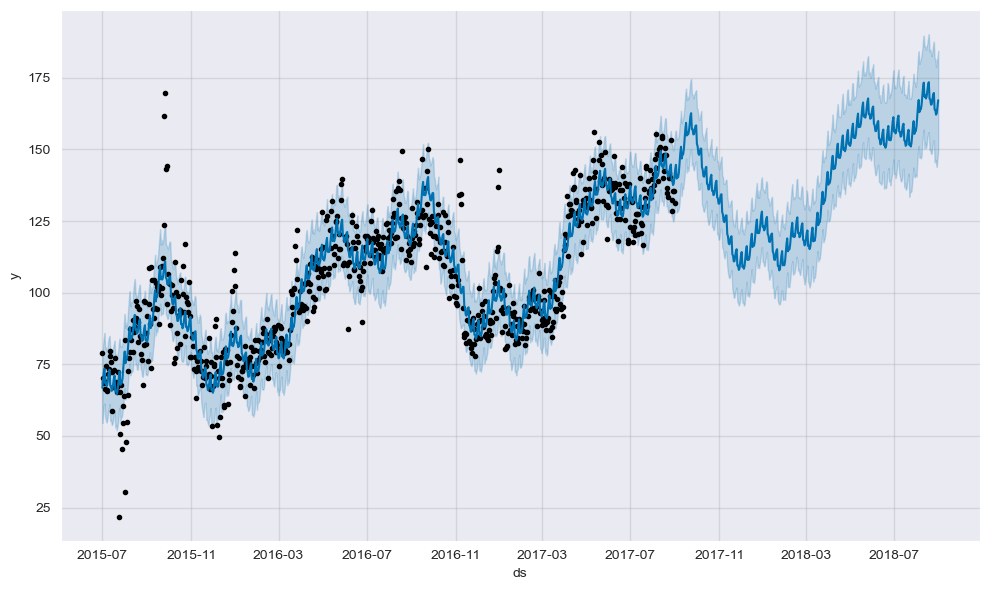

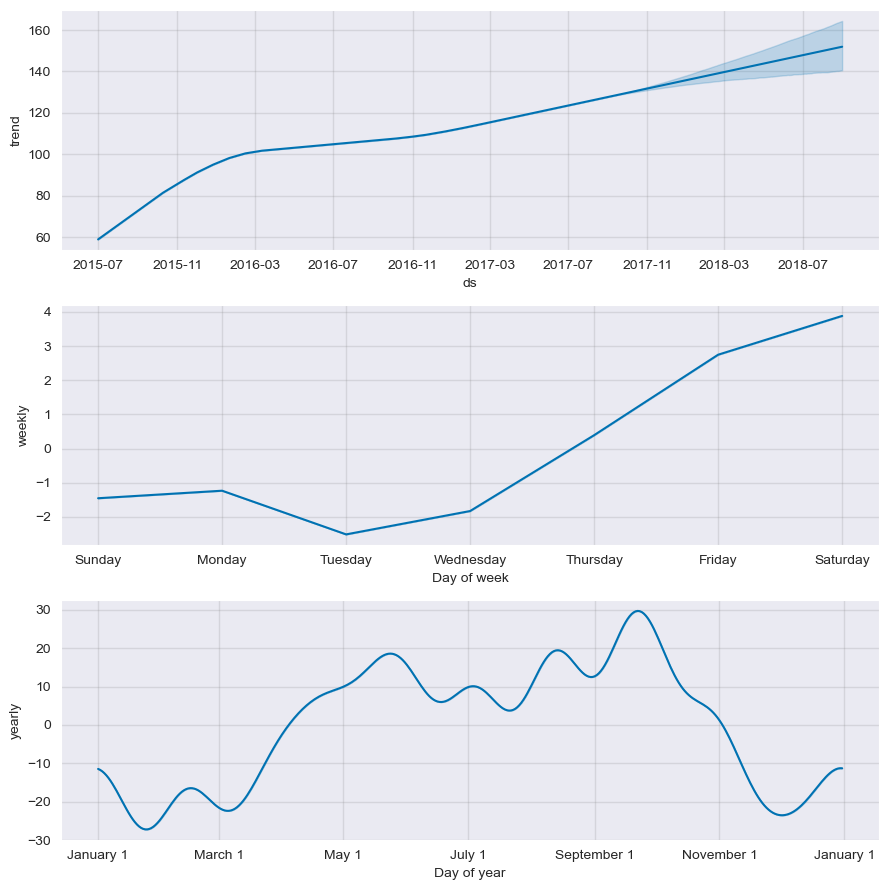

In [113]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)